Type (Alcohol):

This feature represents the type of wine. In the context of the data, it seems to indicate the wine type, with "1" possibly representing one category of wine (e.g., a specific class like red or white wine).
Alcohol:

This column represents the alcohol content of the wine, measured in percentage by volume. It typically varies between 8-15% for most wines.
Malic:

Malic acid is an organic compound found in fruits and is a significant contributor to the acidity in wine. This column represents the concentration of malic acid in the wine (measured in grams per liter). A higher value indicates a more acidic wine.
Ash:

This represents the inorganic residue (minerals) left after the wine has been burned. It’s an indicator of the overall mineral content in the wine.
Alcalinity:

This refers to the wine's alkalinity, a measure of the wine's ability to neutralize acids. It can be an important factor in taste, with more alkaline wines being less acidic.
Magnesium:

Magnesium is a mineral found in wine and is important for both flavor and the structure of the wine. It can affect the mouthfeel and balance of the wine.
Phenols:

Phenolic compounds contribute to the color, flavor, and mouthfeel of wine. They include tannins, which provide a bitter taste, and are important for the wine's astringency and aging potential.
Flavanoids:

Flavonoids are a subset of phenolic compounds and are also known for contributing to color, bitterness, and astringency in wine. They are antioxidants and can have health benefits as well.
Nonflavonoids:

These are other phenolic compounds in wine, distinct from flavonoids. They contribute to the wine’s flavor and structure but in different ways than flavonoids.
Proanthocyanins:

These are another type of phenolic compound, specifically responsible for some of the astringency and bitterness in wines. They are also linked to the color intensity, especially in red wines.
Color:

This refers to the color intensity of the wine, which can provide insight into its age, variety, and composition. Darker wines often have higher concentrations of certain phenols like anthocyanins.
Hue:

This is a measure of the color tone of the wine. It may describe the overall color (e.g., red, purple, or brown hues), which can be influenced by the grape variety, aging process, and the phenolic content.
Dilution:

This refers to the wine’s dilution factor, possibly a measure of how concentrated the wine is or how much water might have been added during processing.
Proline:

Proline is an amino acid that is a key component of protein found in wine. It’s related to the wine's ability to age and its overall flavor profile. Higher concentrations are often found in wines with a richer body.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tqdm import tqdm
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("wine.csv")
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [4]:
data.shape

(178, 14)

In [5]:
data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

# Data exploration

In [6]:
data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [7]:
data['Color'].value_counts()

2.60    4
4.60    4
3.80    4
3.40    3
5.00    3
       ..
6.30    1
7.05    1
7.20    1
8.90    1
9.20    1
Name: Color, Length: 132, dtype: int64

##### Dropping Type Feature as it is a classifier that we have three types of wines which we need to find in clustering by keeping it will affect our inferences and further analysis

In [8]:
data['ID'] = range(1, 179, 1)
data

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline   ID  
0             0.28             2.29   5.64  1.04      3.92     1065    1  
1             0.26             1.28   4.38  1.05      3.40     1050    2  
2             0.30             2.81   5.68  1.03      3.17     1185    3  
3             0.24             2.18   7.80  0.86      3.45     1480    4  
4             0.39             1.82   4.32  1.04      2.93      735    5  
..             ...              ...    ...   ...       ...      ...  ...  
173           0.52             1.06   7.70  0.64      1.74      740  174  
174           0.43             1.41   7.30  0.70      1.56      750  175  
175           0.43             1.35  10.20  0.59      1.56      835  176  
176           0.53             1.46   9.30  0.60      1.62      840  177  
177           0.56             1.35   9.20  0.61      1.60      560  178  

[178 rows x 15 columns]

In [9]:
df = data.drop('Type',axis=1)

### summary statistics

In [10]:
df.describe()

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000     178.000000       178.000000  178.000000  178.000000   
mean     2.029270       0.361854         1.590899    5.058090    0.957449   
std      0.998859       0.124453         0.572359    2.318286    0.228572   
min      0.340000       0.130000         0.410000    1.280000    0.480000   
25%      1.205000       0.270000         1.250000    3.220000    0.782500   
50%      2.135000       0.340000         1.555000    4.690000    0.965000   
75%      2.875000       0.437500         1.950000    6.200000    1.120000   
max      5.080000       0.660000         3.580000   13.000000    1.710000   

         Dilution      Proline          ID  
count  178.000000   178.000000  178.000000  
mean     2.611685   746.893258   89.500000  
std      0.709990   314.907474   51.528309  
min      1.270000   278.000000    1.000000  
25%      1.937500   500.500000   45.250000  
50%      2.780000   673.500000   89.500000  
75%      3.170000   985.000000  133.750000  
max      4.000000  1680.000000  178.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  ID               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


#### Checking duplicates

In [12]:
df.duplicated().sum()

0

#### Checking missing values

In [13]:
df.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64

#### There are no missing / Null and Duplicated  values  either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

###  Exploratory Data Analysis (EDA):

#### Checking the skewness of our dataset.
+ A normally distribuited data has a skewness close to zero.
+ Skewness greather than zero means that there is more weight in the left side of the data.
+ In another hand, skewness smaller than 0 means that there is more weight in the right side of the data

![Filter Method](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/446px-Negative_and_positive_skew_diagrams_%28English%29.svg.png

In [14]:
df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
ID                 0.000000
dtype: float64

### Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as:
+ Check the kind of each feature distribution
+ Check data symmetry
+ Verify features frequency
+ Identify outliers

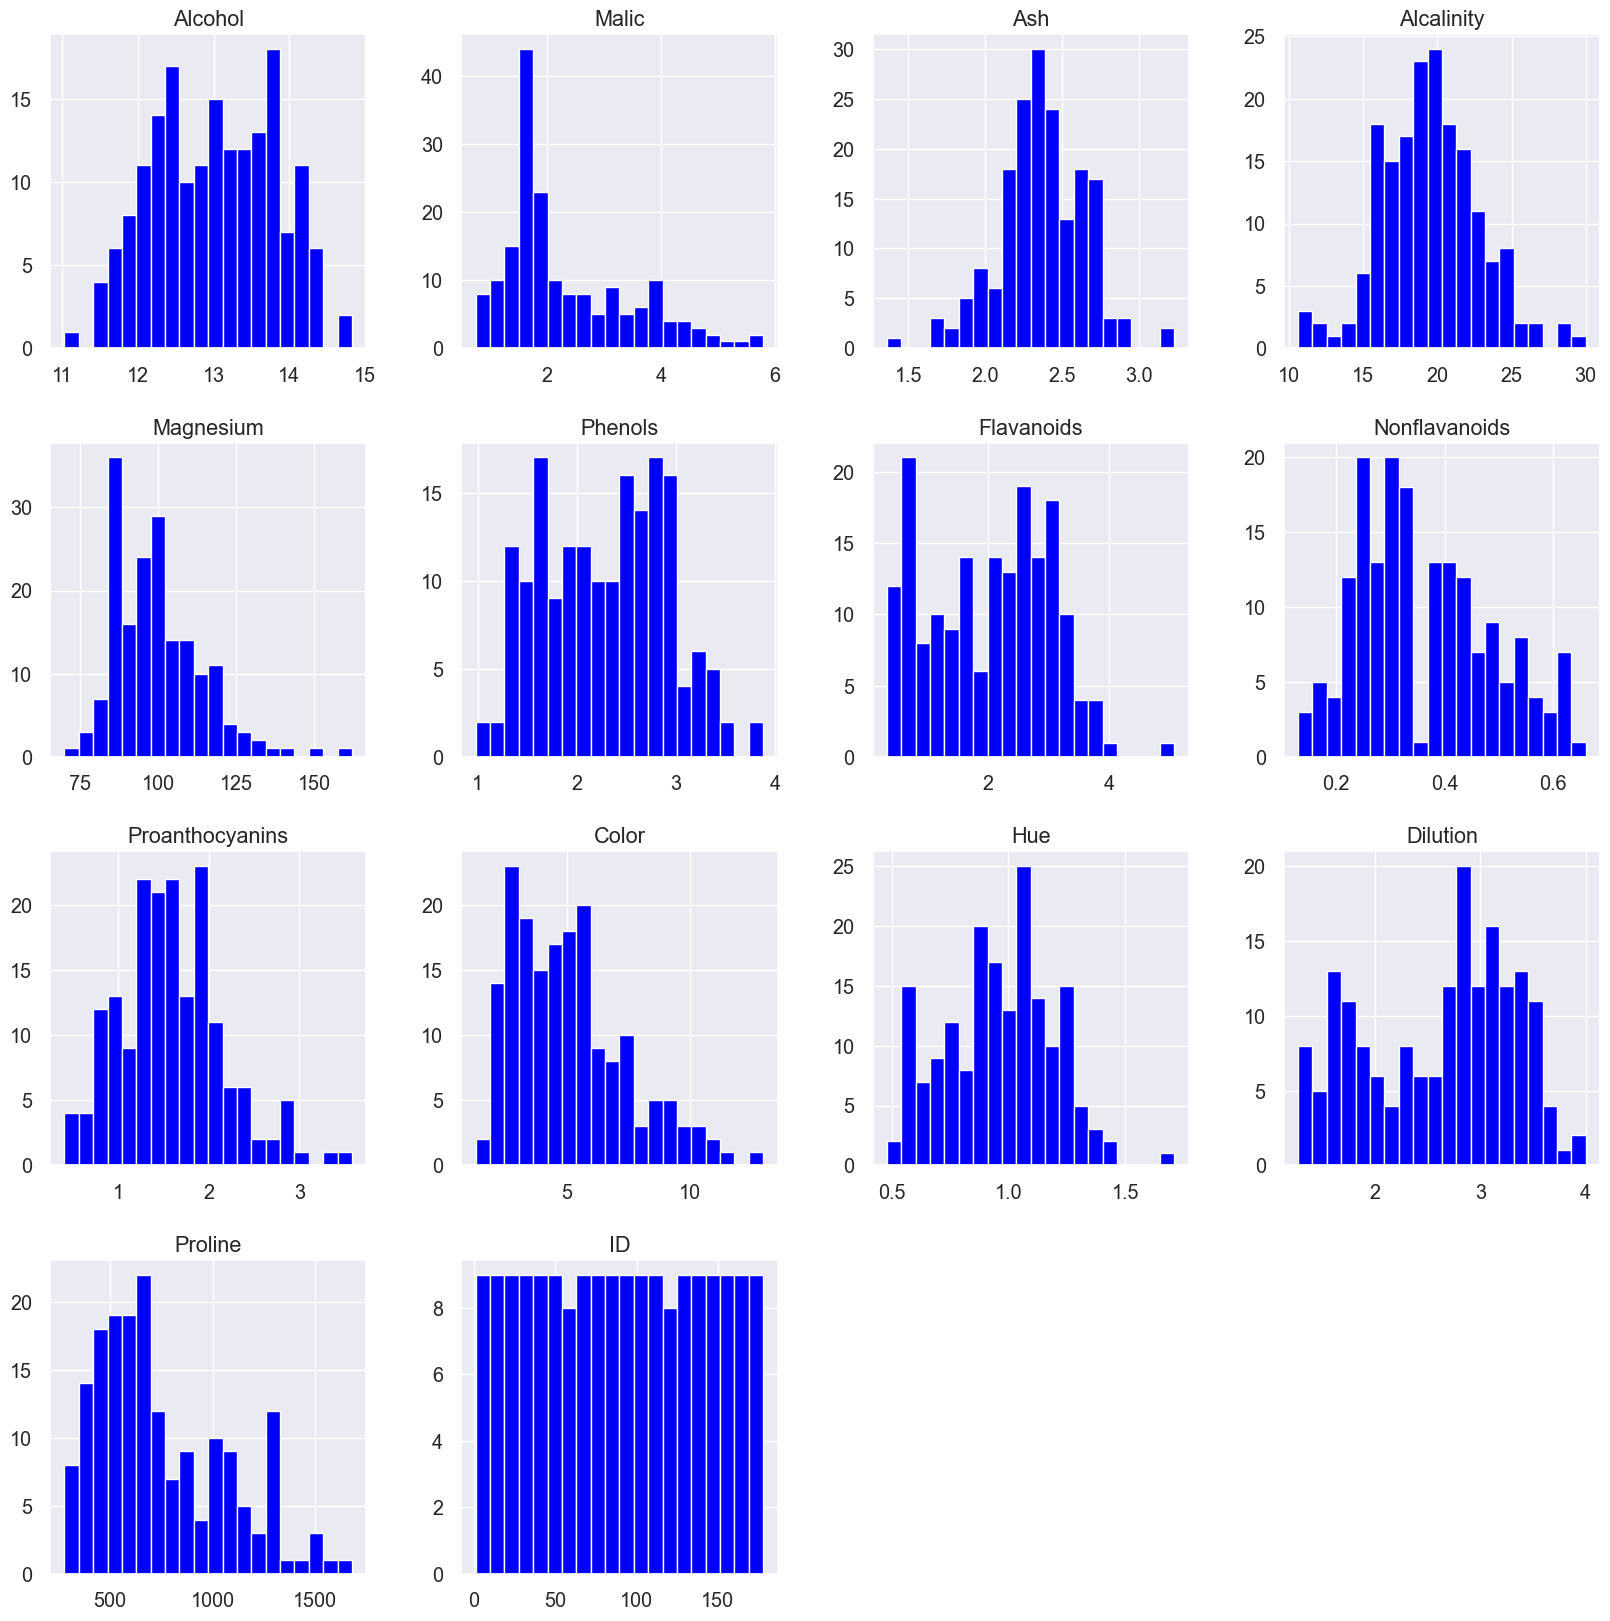

In [15]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='blue' )

Outliers Detection

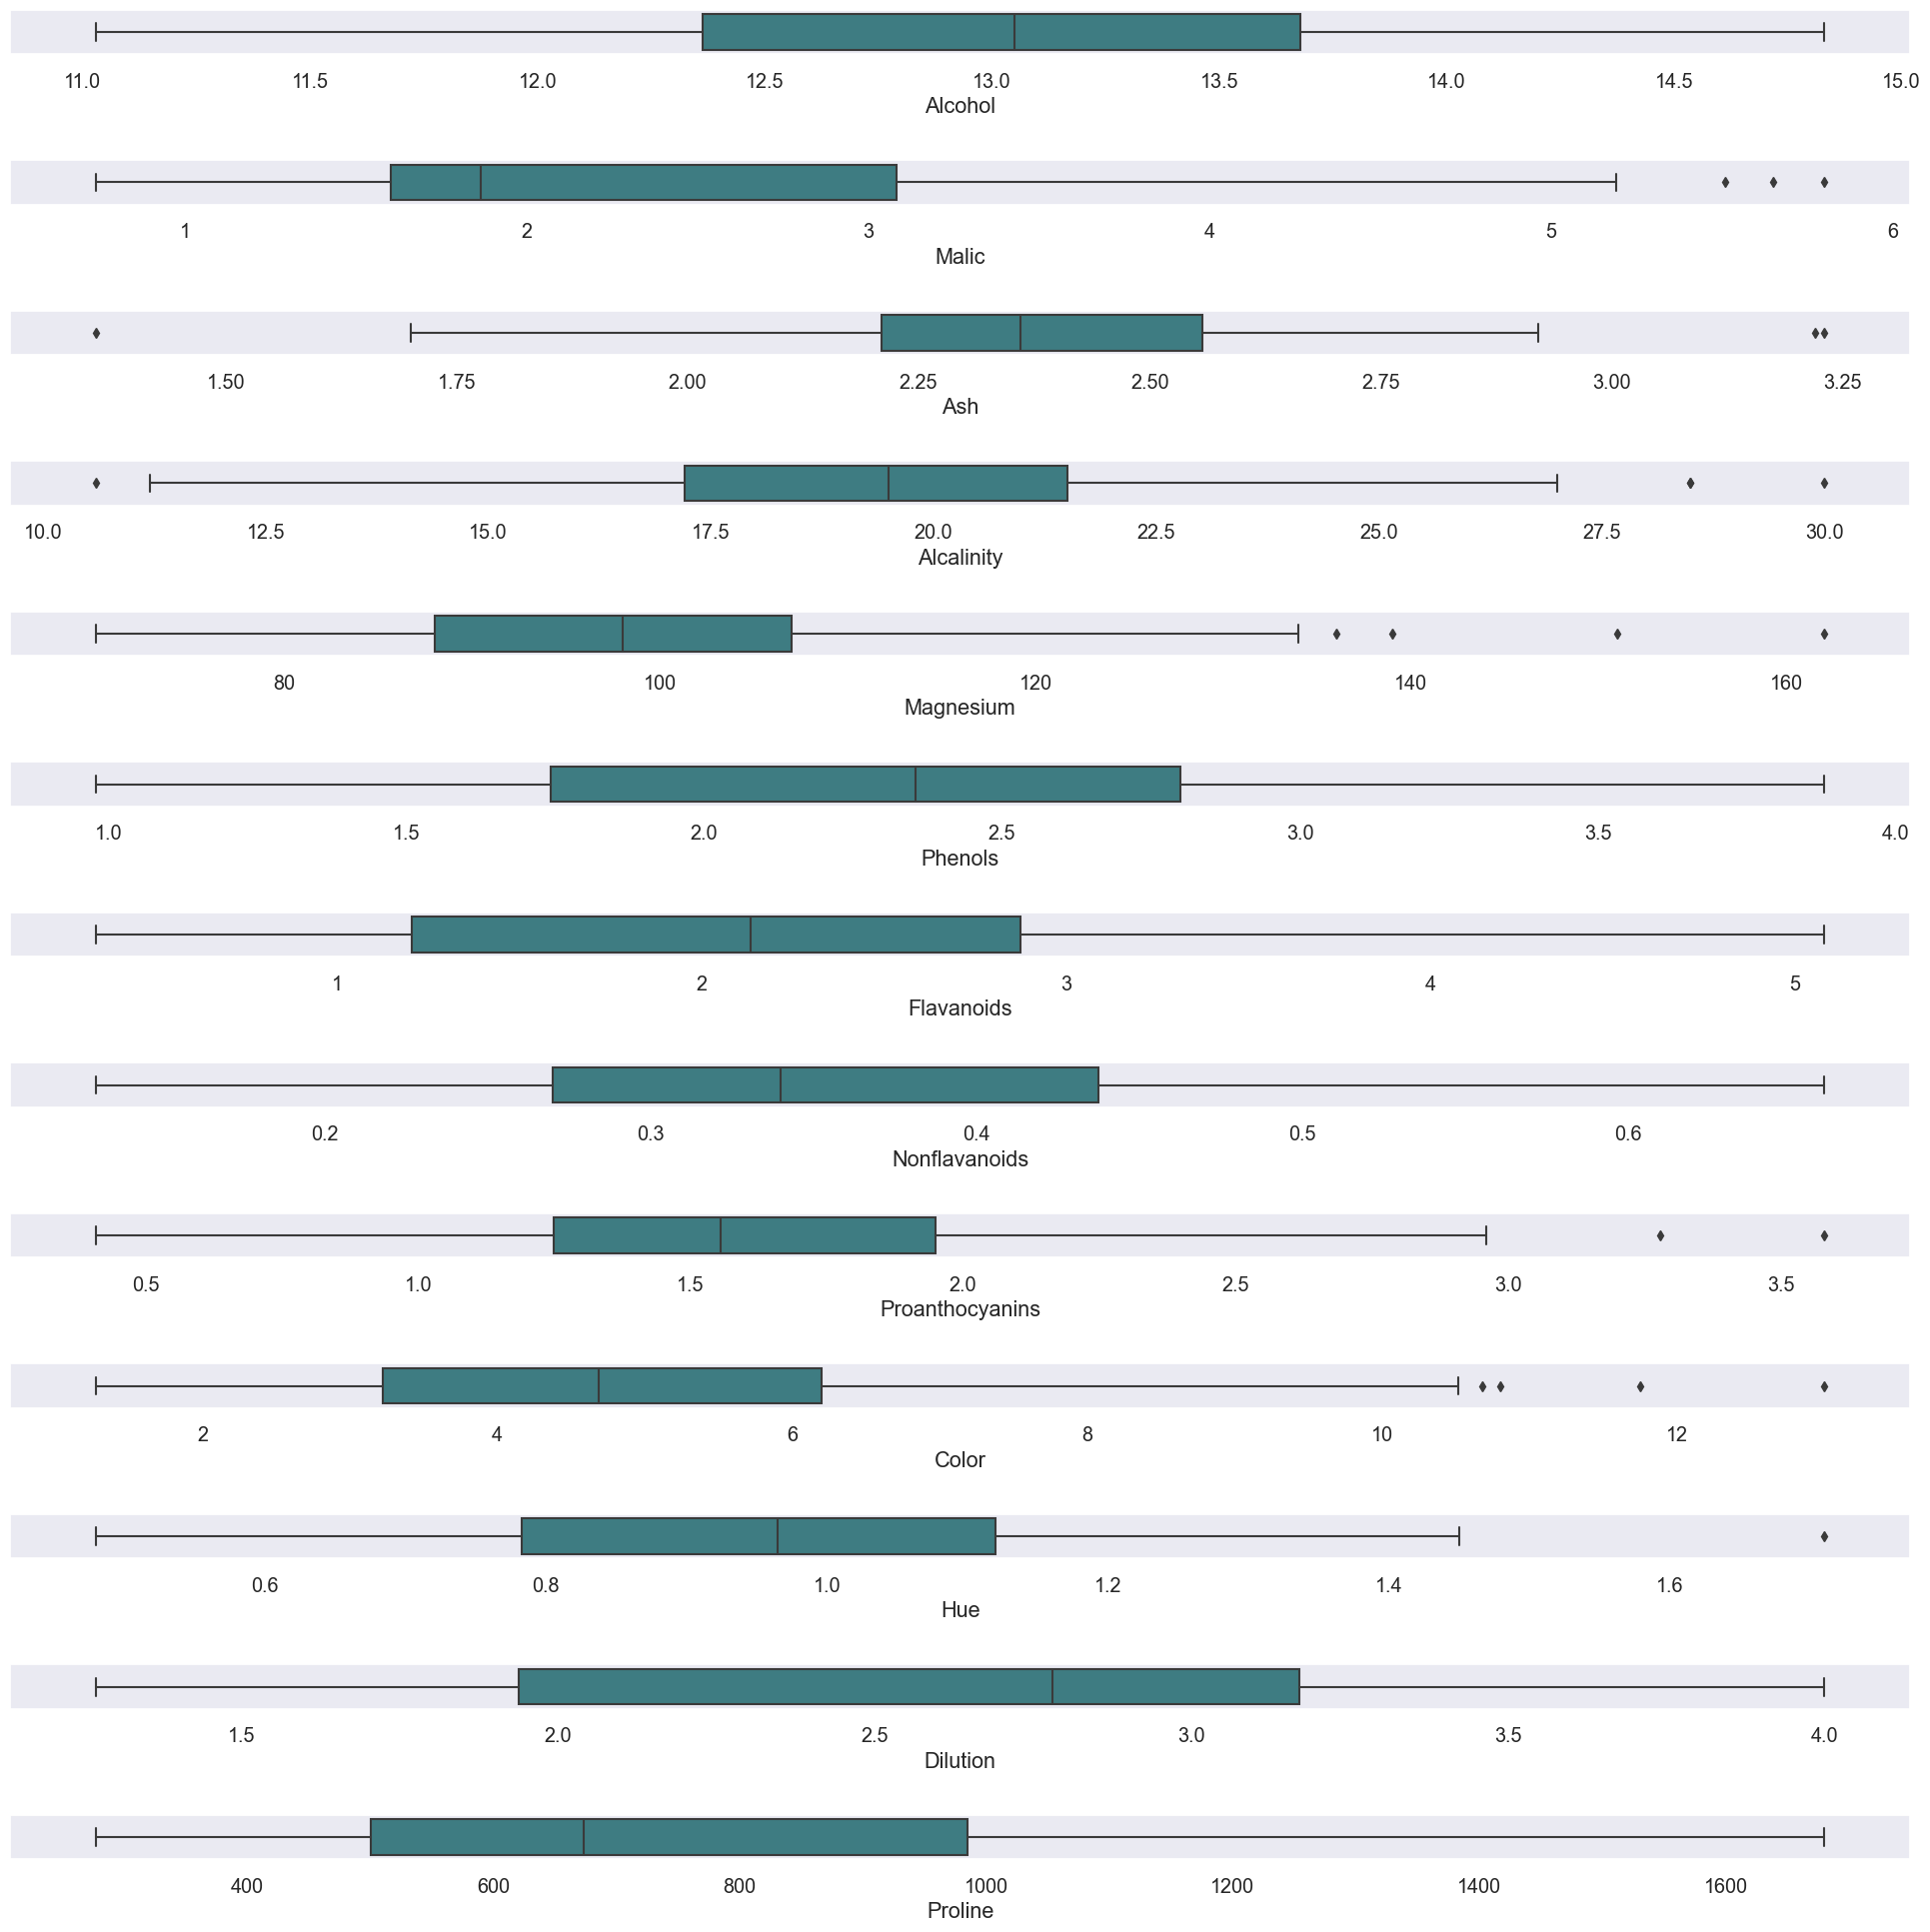

In [16]:
ot=df.copy() 
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

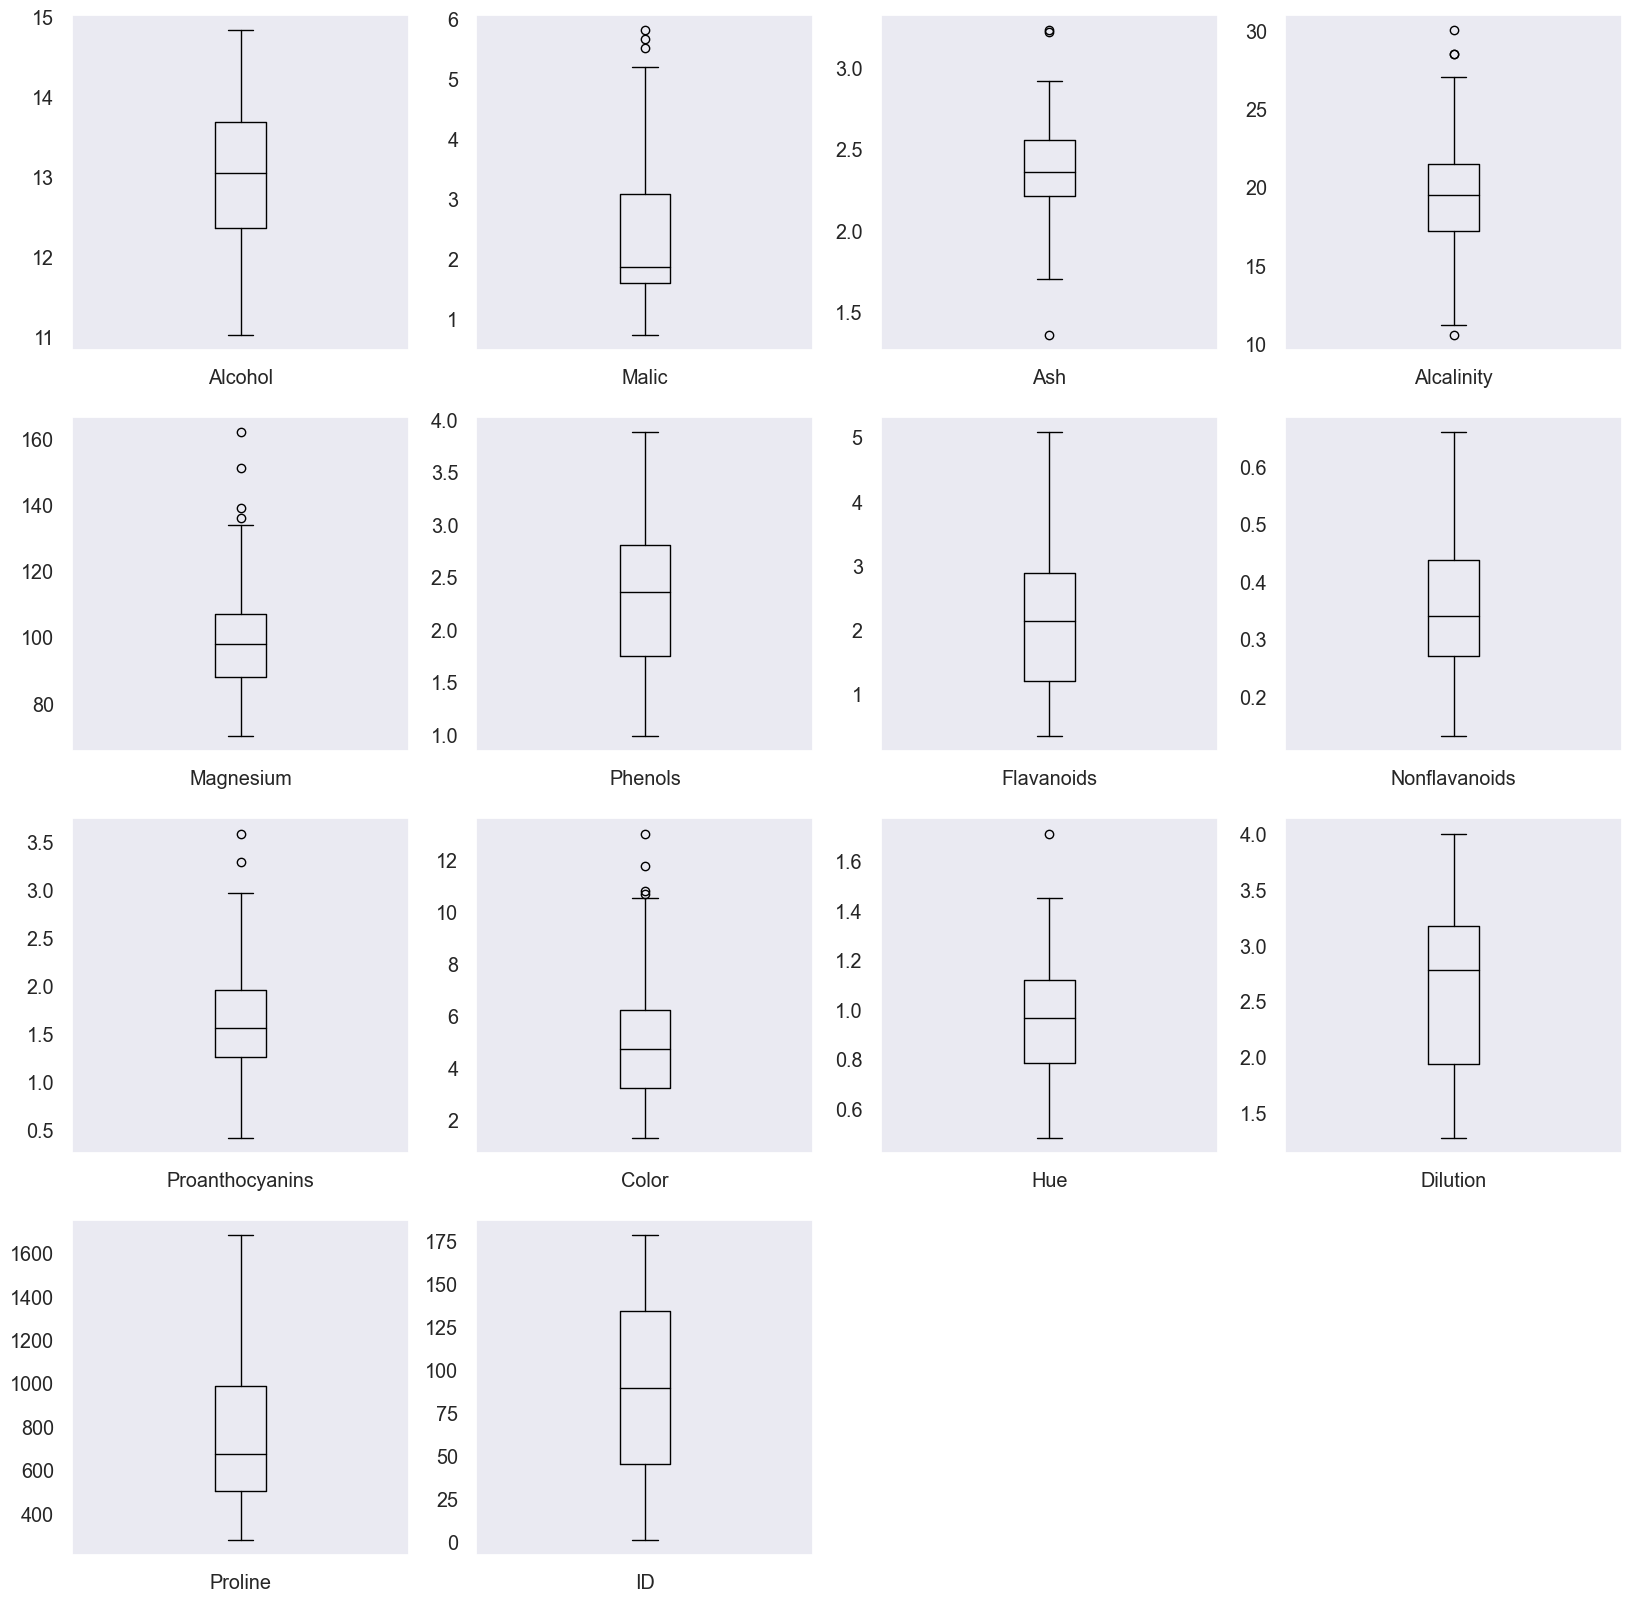

In [17]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

 ### Data Visualization

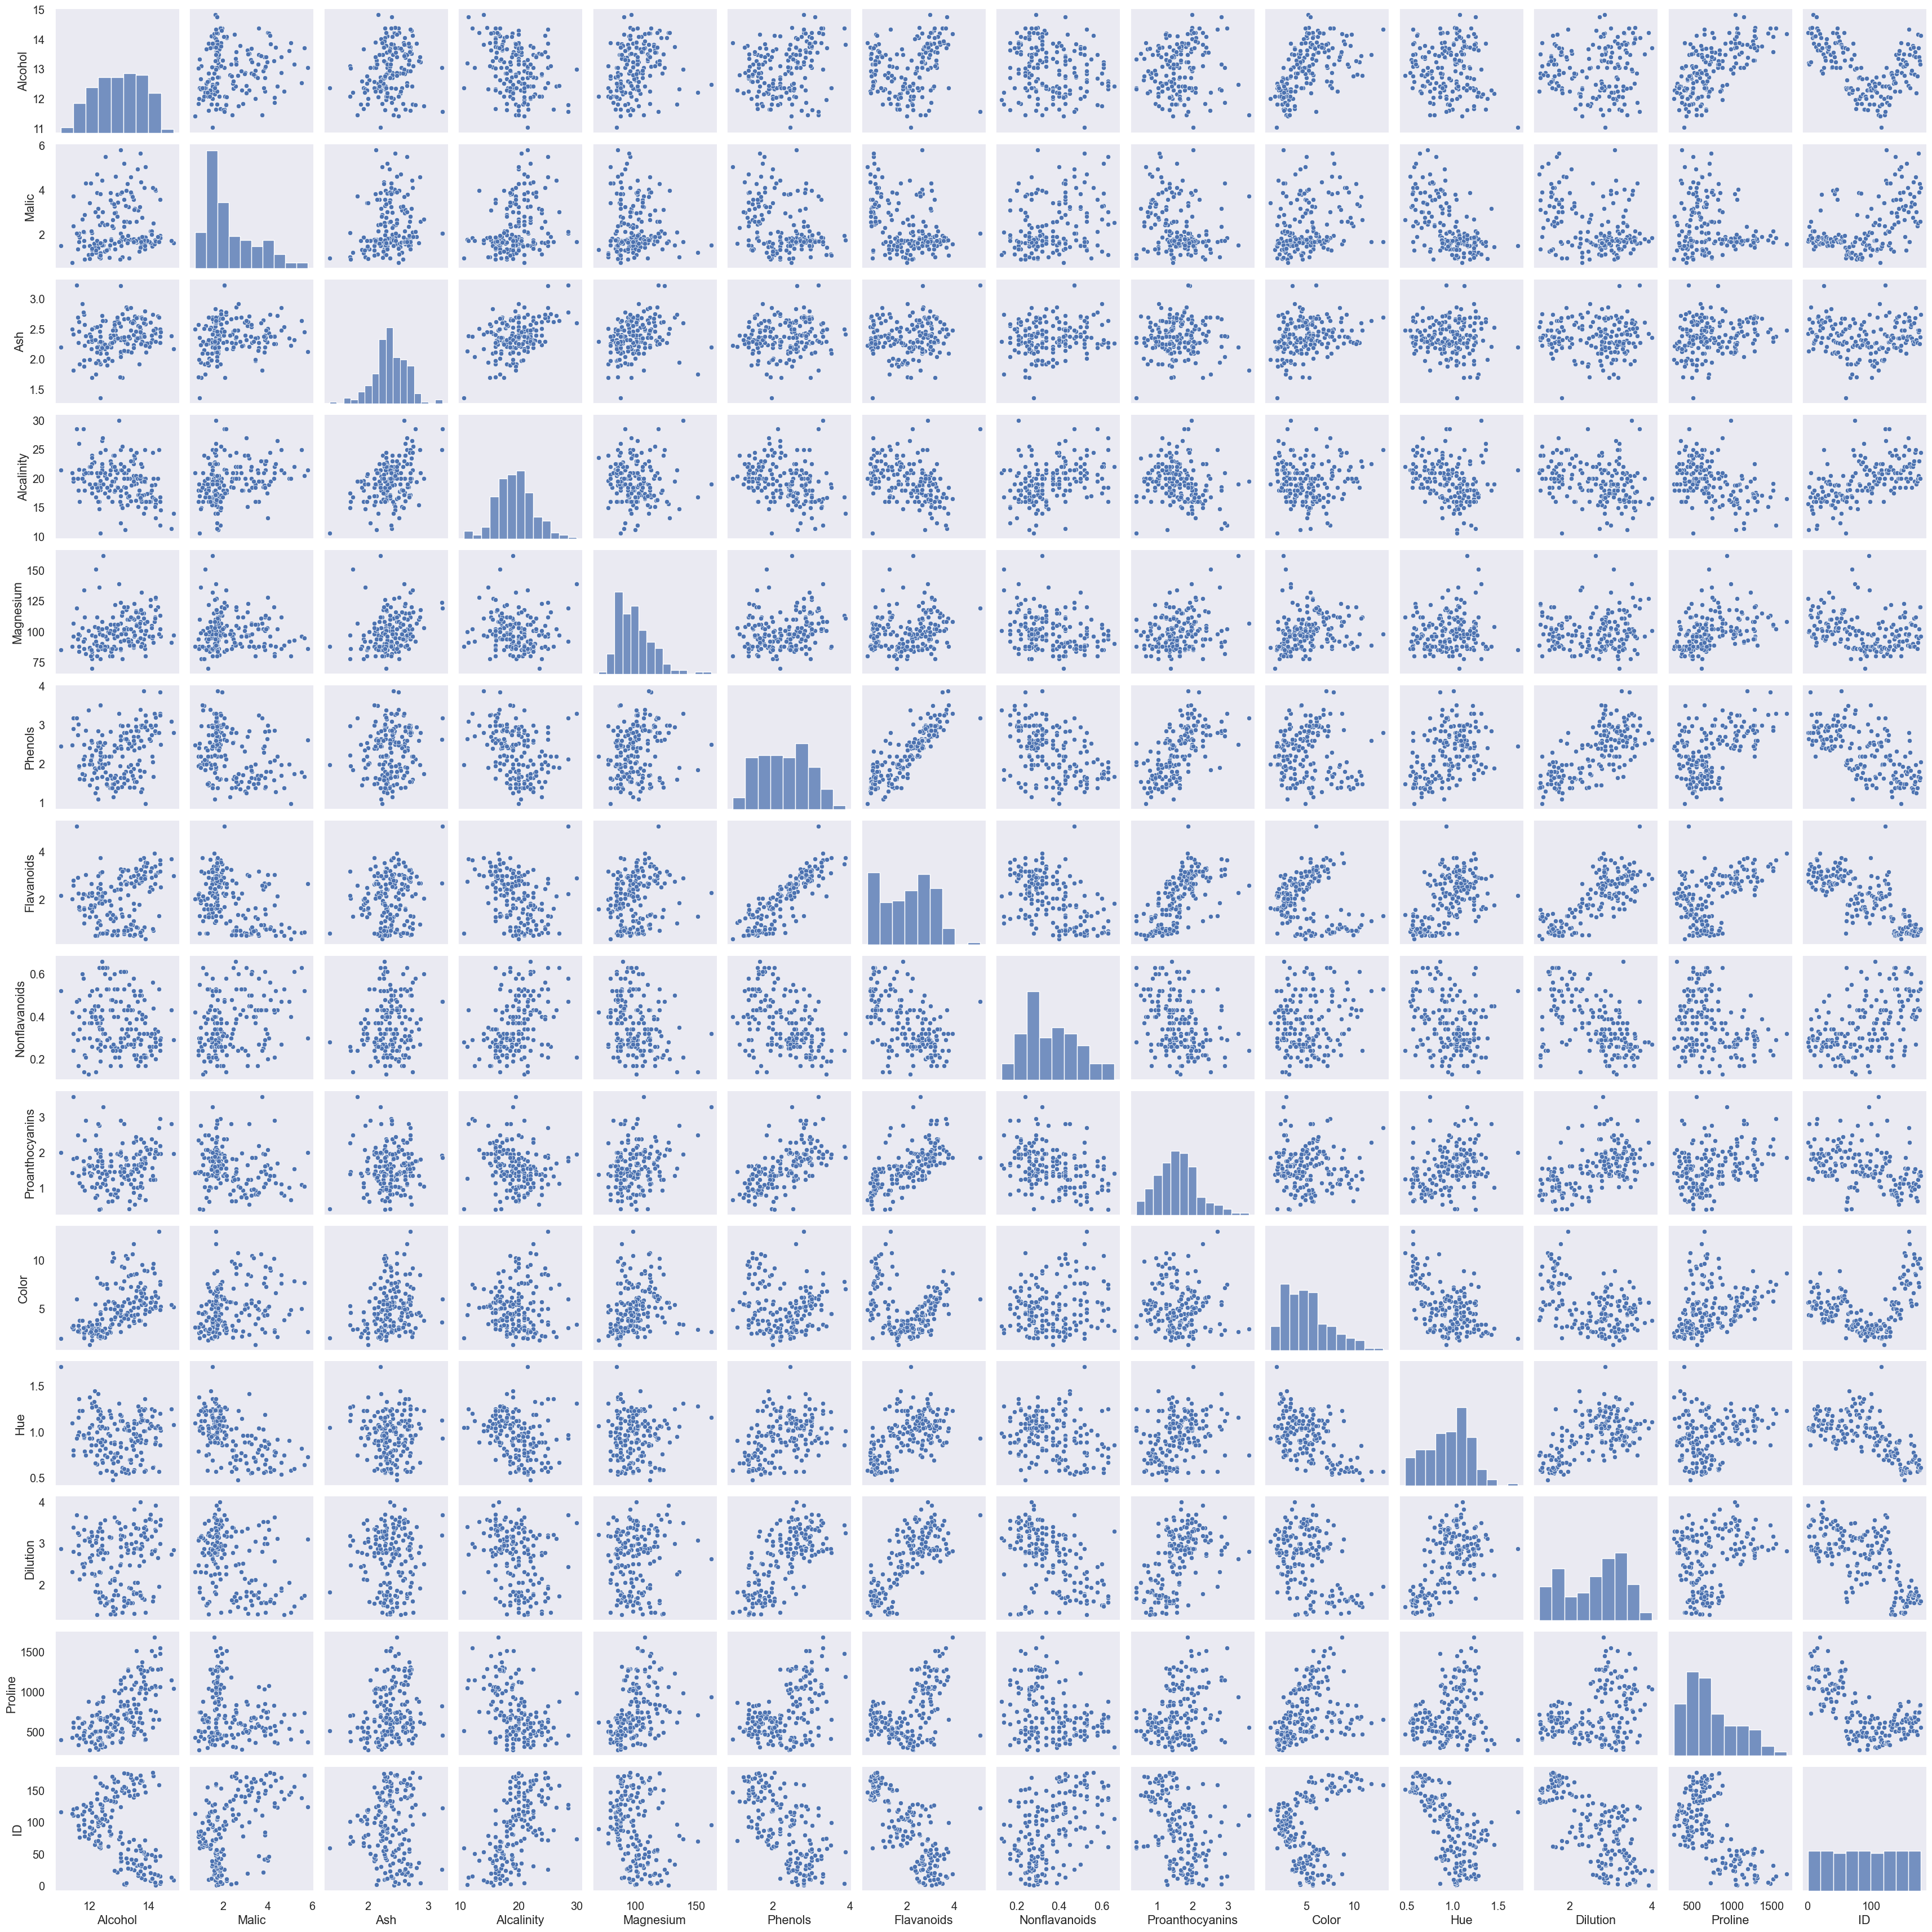

In [18]:
sns.pairplot(df,palette="dark")

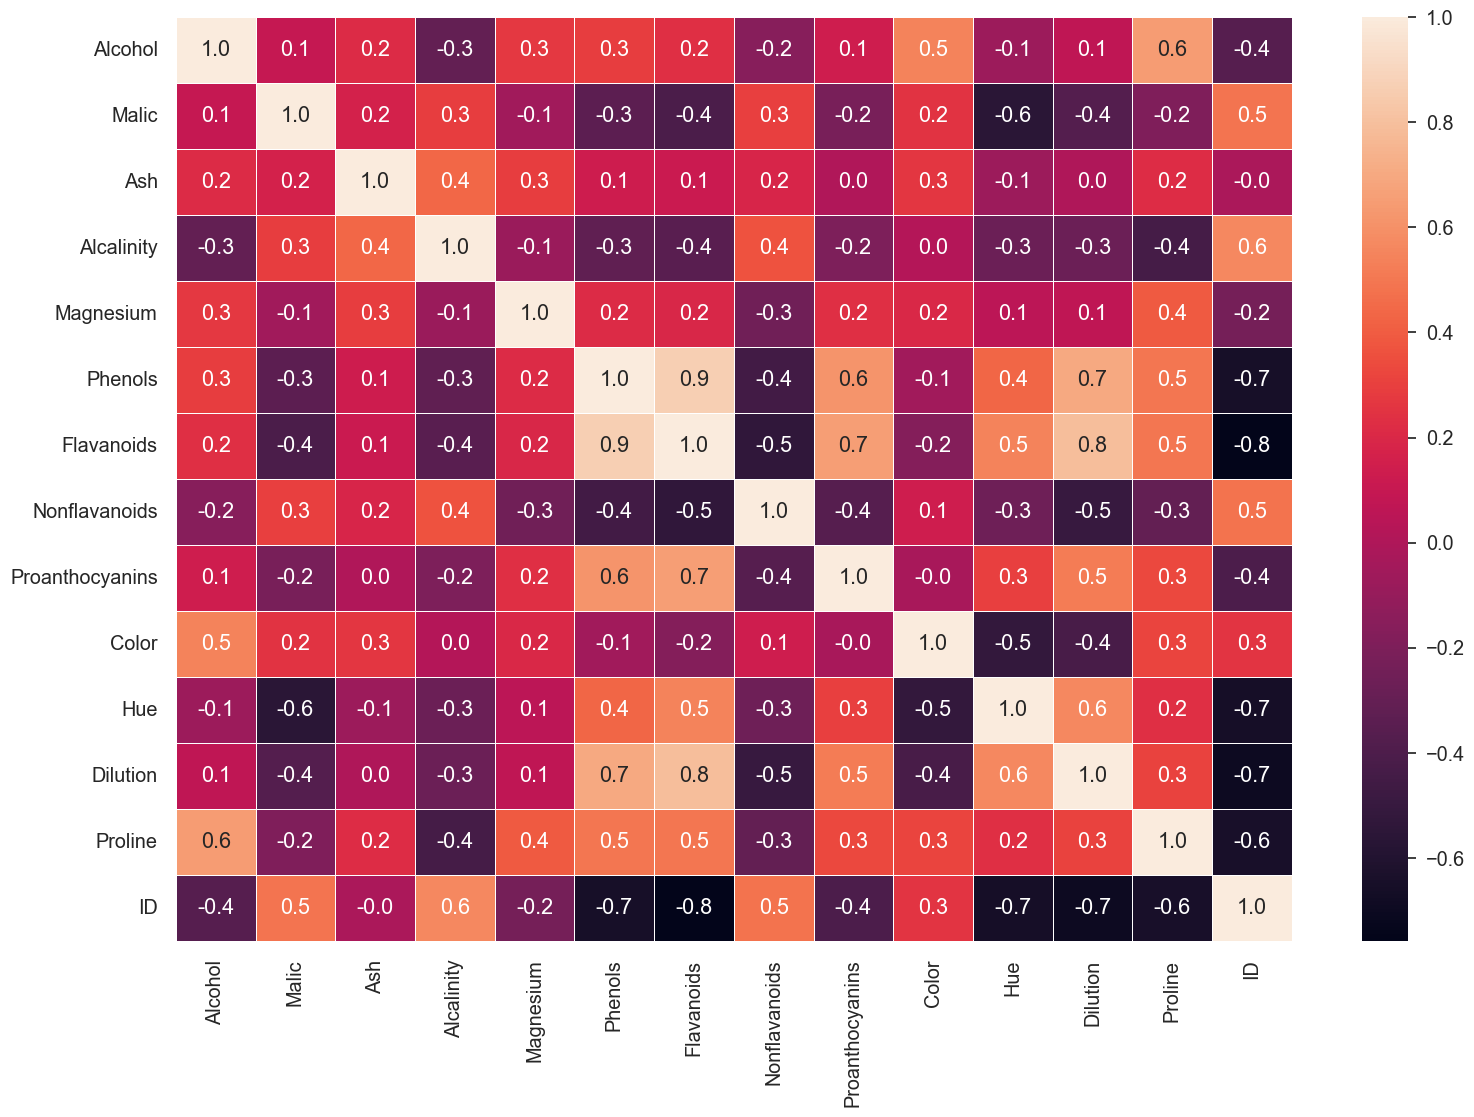

In [19]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins

Flavanoids is positively correlated with Proanthocyanins and Dilution

Dilution is positively correlated with Hue

Alcohol is positively correlated with Proline

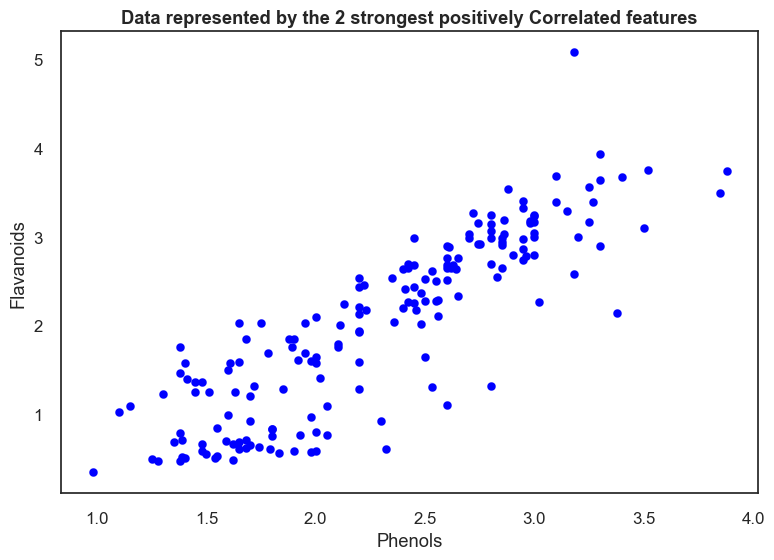

In [20]:
# Plotting frequent flying Phenols vs. Flavanoids  
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=df['Phenols'], y=df['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',fontweight='bold')
plt.show()

## 5. Data Preprocessing

###  Applying Standard Scaler on the Data

In [21]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(178, 14)

###  Applying MinMax Scaler on Dataset

In [22]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(178, 14)

## 6. PCA<a class="anchor" id="6"></a>
<b>Principal Component Analysis (PCA)</b> was the first dimensionality reduction technique discovered (by Karl Pearson - yes, the guy from Pearson's correlation coefficient) and dates back to as early as <b>1901</b>. It is very popular because it is <b>fast, easy to implement and easy to interpret.

PCA works by finding a low dimensional subspace that <b>maximises the variance</b> of the data in that subspace and performing a <b>linear projection.</b> This basically means the data will be as <b>spread out</b> as possible, without changing the relationship between the data points. This allows us to find patterns or indentify clusters if any exist.

###  PCA on Standard Scaled Dataset

##### Explained variance

Explained variance shows how much of the variance/spread of the data is captured in each dimension, i.e. how important each additional principal component is to the original data representation.

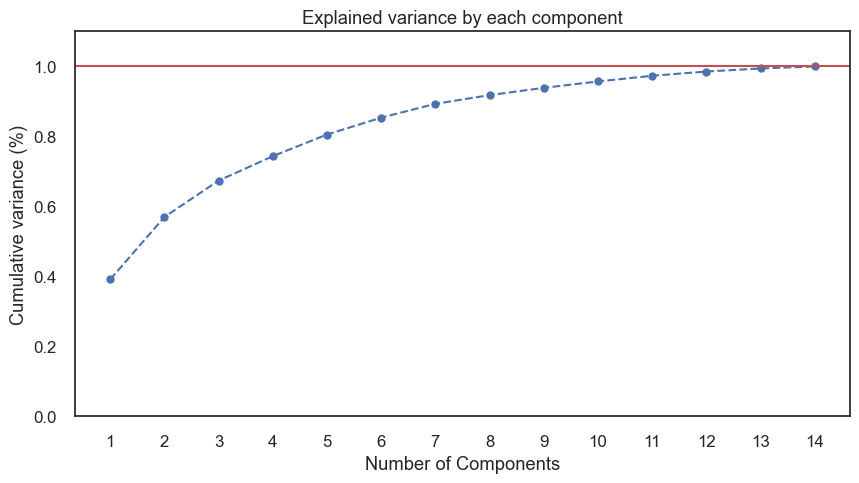

In [23]:
# PCA
pca_var = PCA()
pca_var.fit(std_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [24]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

Text(0.5, 1.0, 'Explained variance by each component')

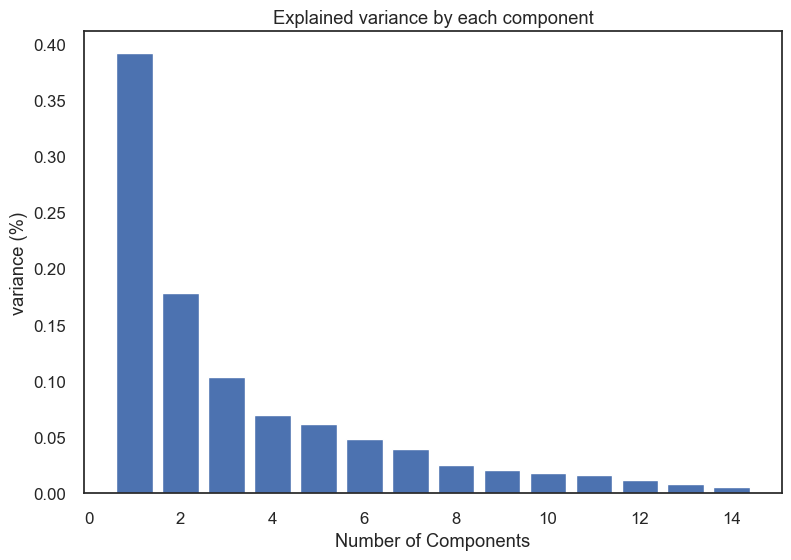

In [25]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [26]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [27]:
# PCA
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


PC1       PC2       PC3
0  3.723816  1.447476 -0.153274
1  2.734987 -0.334166 -2.079717
2  2.944840  1.033583  0.979570
3  4.094144  2.762344 -0.123541
4  1.550429  0.867267  1.915570

### PCA plot

Text(0, 0.5, 'PC2')

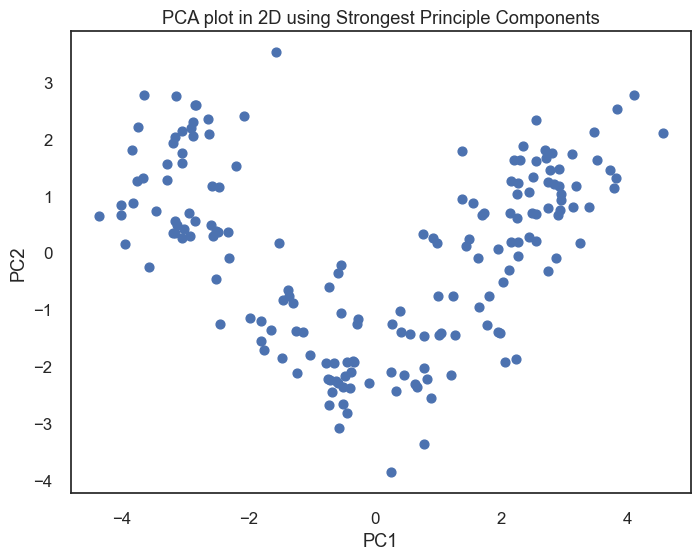

In [28]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

###  PCA on MinMax Scaled Dataset

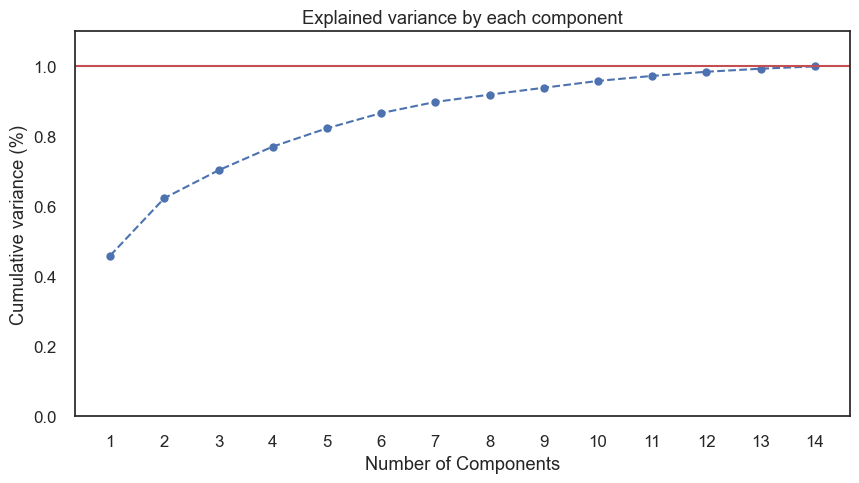

In [29]:
# PCA
pca_var = PCA()
pca_var.fit(minmax_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

It is interesting to see that with just 2 components we capture over 50% of the variance. And by moving up to 3 components, we get 2 thirds of the variance.

For this reason, sometimes PCA is used for feature selection. For very big datasets with hundreds of features, it can take a long time to train models with some features not adding much value. A solution is to reduce the number of columns by using principal components from PCA. The number of components is normally chosen by looking at the explained variance graph (e.g. a minimum of 60% might be required).

In [30]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

Text(0.5, 1.0, 'Explained variance by each component')

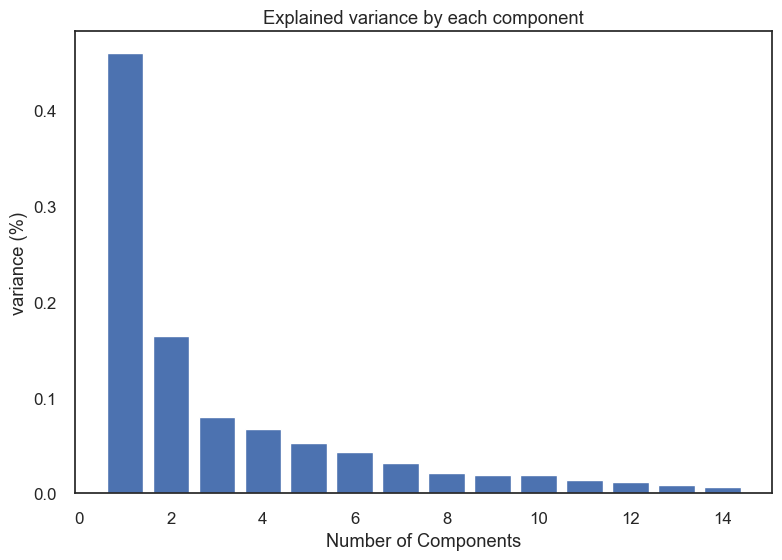

In [31]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [32]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [33]:
# PCA
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)

# Convert to data frame
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


PC1       PC2       PC3
0 -0.864955  0.246505  0.012715
1 -0.676158  0.011751 -0.306279
2 -0.692172  0.186686  0.139093
3 -0.955057  0.568299  0.123337
4 -0.411640  0.067685  0.118278

### PCA Plot 

Text(0, 0.5, 'PC2')

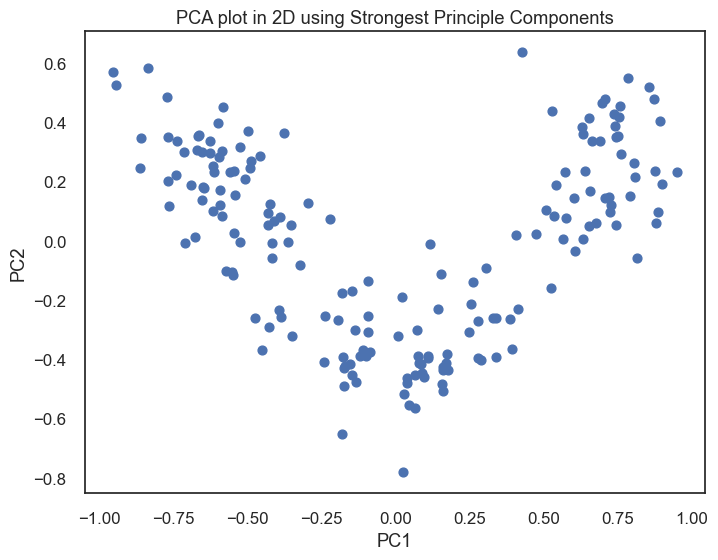

In [34]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

##### Notes:

+ Notice how these points have <b>no colours</b> (yet) because we don't know what their classes are. This is what makes it an <b>unsupervised method.</b>
+ We know our dataset falls naturally into 3 classes (3 types of wine), so we assign colours by <b>clustering</b> the data into 3 groups using techniques such as <b>k-Means</b> and <b>Hierarchical</b>.

7. KMeans Clustering<a class="anchor" id="7"></a>
k-Means is an iterative clustering algorithm that works as follows:

Choose coordinates (e.g. randomly) for the locations of the k centroids. Group datapoints together by finding the nearest centroid. (There will always be k goups). Calculate the new centre of each centroid by taking the mean position of datapoints in each group. Iterative until the centroids stop moving by a significant amount. k-Means is popular because it is a reliable (always converges) and relatively fast algorithm. The main downside is that you have to decide what the value of k should be beforehand. (Although there are techniques to help with this).

After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

1. Centroids of newly formed clusters do not change
2. Points remain in the same cluster
3. Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot.

###  Elbow Method for Determining Cluster Amount on PCA Standard Scaled Dataset

In [35]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 24.04it/s]


In [36]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    silhouette[i] = sil(pca_std_df, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.13it/s]


Internal measures for cluster validation

The goal of partitioning clustering algorithms is to split the data set into clusters of objects, such that:
the objects in the same cluster are similar as much as possible, and the objects in different clusters are highly distinct That is, we want the average distance within cluster to be as small as possible; and the average distance between clusters to be as large as possible.

Internal validation measures reflect often the compactness, the connectedness and the separation of the cluster partitions.

Compactness or cluster cohesion: Measures how close are the objects within the same cluster. A lower within-cluster variation is an indicator of a good compactness (i.e., a good clustering). The different indices for evaluating the compactness of clusters are base on distance measures such as the cluster-wise within average/median distances between observations.
Separation: Measures how well-separated a cluster is from other clusters. The indices used as separation measures include: distances between cluster centers the pairwise minimum distances between objects in different clusters
Connectivity: corresponds to what extent items are placed in the same cluster as their nearest neighbors in the data space. The connectivity has a value between 0 and infinity and should be minimized. Generally most of the indices used for internal clustering validation combine compactness and separation measures as follow:
Index=(α×Separation)(β×Compactness)

Where α and β are weights.

In this section, we’ll describe the two commonly used indices for assessing the goodness of clustering: the silhouette width and the Dunn index. These internal measure can be used also to determine the optimal number of clusters in the data.

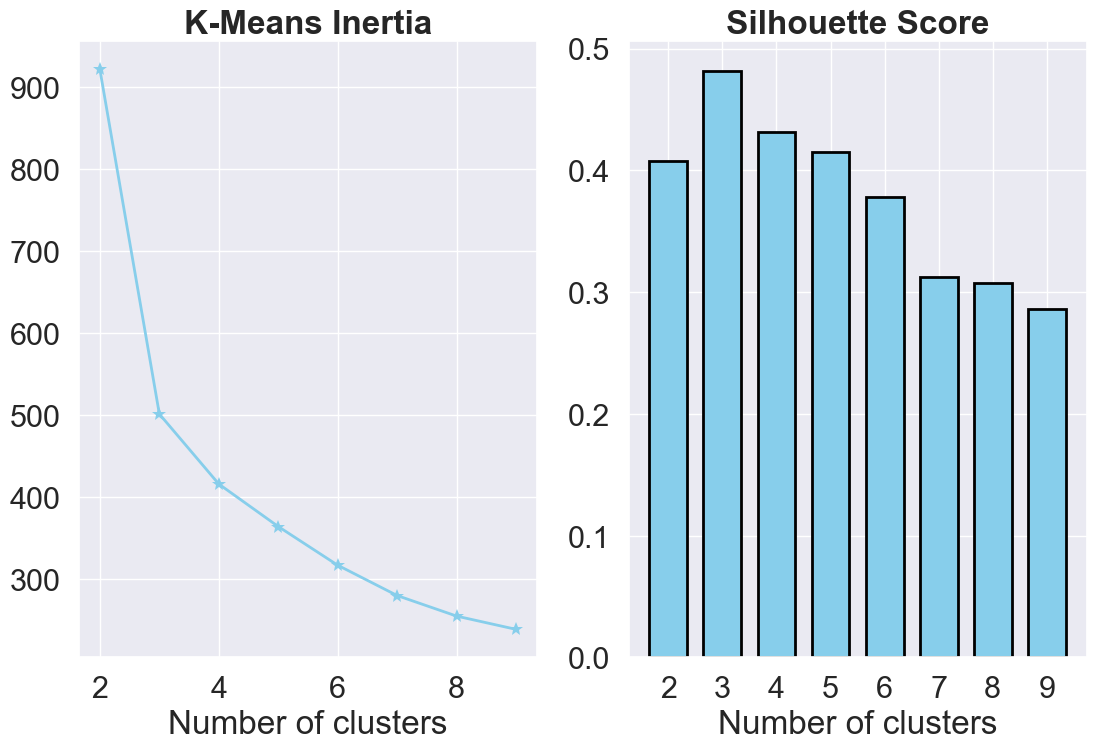

In [37]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

##### There is a clearly visible "elbow" . A choice of 3 clusters seems to be fair the maximum silhouette score also indicates that.

### Silhouette Score

Silhouette coefficient

The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.
For each observation i, the silhouette width si is calculated as follows:

For each observation i, calculate the average dissimilarity ai between i and all other points of the cluster to which i belongs.
For all other clusters C, to which i does not belong, calculate the average dissimilarity d(i,C) of i to all observations of C. The smallest of these d(i,C) is defined as bi=minCd(i,C). The value of bi can be seen as the dissimilarity between i and its “neighbor” cluster, i.e., the nearest one to which it does not belong.

Finally the silhouette width of the observation i is defined by the formula: Si=(bi−ai)/max(ai,bi).
Silhouette width can be interpreted as follow:
Observations with a large Si (almost 1) are very well clustered.
A small Si (around 0) means that the observation lies between two clusters.
Observations with a negative Si are probably placed in the wrong cluster.

In [38]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

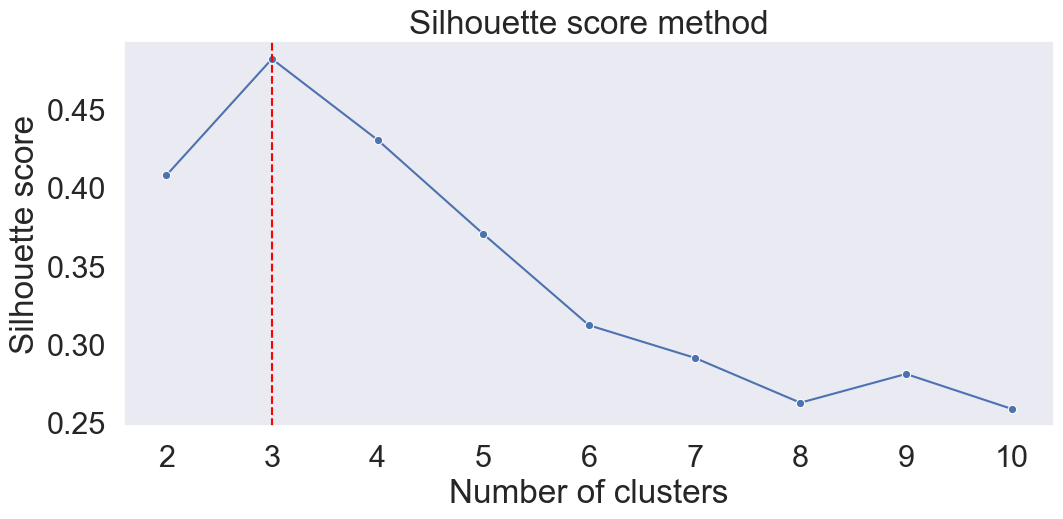

In [39]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

##### Silhouette score method indicates the best options would be respectively 3 clusters.

Elbow Plot for Standard Scaler data


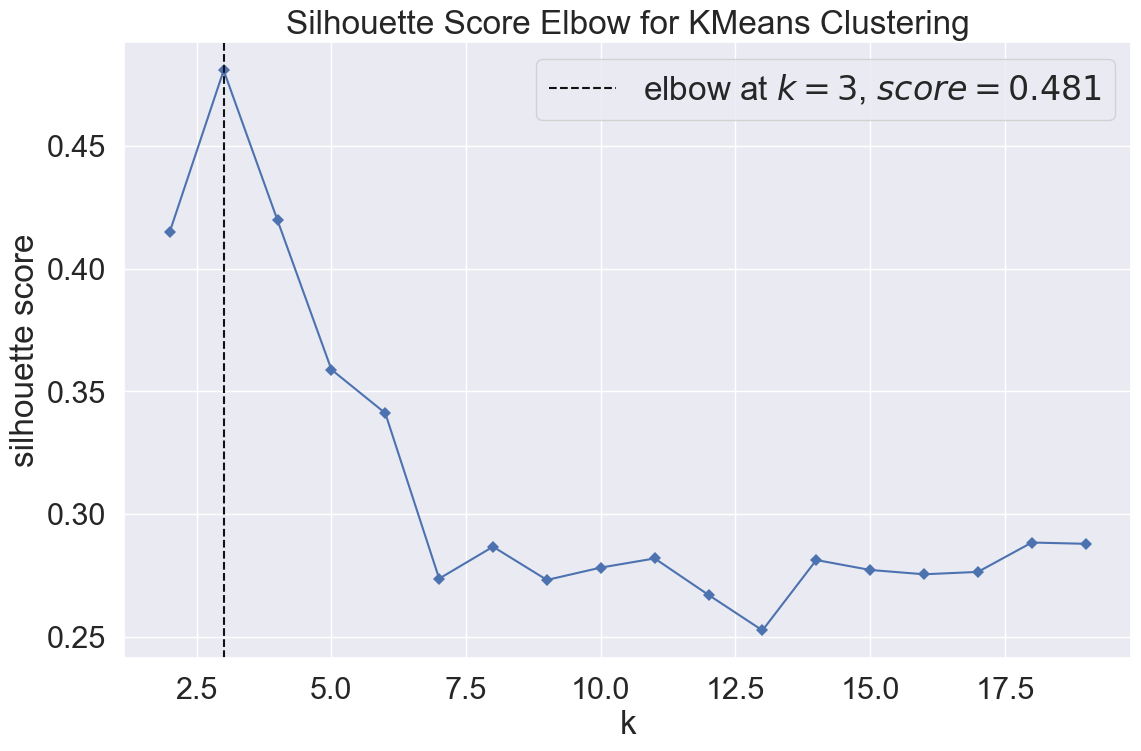

In [40]:

# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(pca_std_df)    
visualizer.show()
plt.show()

In [41]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= sil(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4150413857036868
For n_clusters = 3 The average silhouette_score is : 0.4807831588462119
For n_clusters = 4 The average silhouette_score is : 0.4301163382866533
For n_clusters = 5 The average silhouette_score is : 0.3582609477613928
For n_clusters = 6 The average silhouette_score is : 0.300036043599544
For n_clusters = 7 The average silhouette_score is : 0.2806762069518899
For n_clusters = 8 The average silhouette_score is : 0.3266959605265454
For n_clusters = 9 The average silhouette_score is : 0.286156088706156


For n_clusters = 2 The average silhouette_score is : 0.4150413857036868
For n_clusters = 3 The average silhouette_score is : 0.4807831588462119
For n_clusters = 4 The average silhouette_score is : 0.4301163382866533
For n_clusters = 5 The average silhouette_score is : 0.3582609477613928
For n_clusters = 6 The average silhouette_score is : 0.300036043599544
For n_clusters = 7 The average silhouette_score is : 0.2806762069518899
For n_clusters = 8 The average silhouette_score is : 0.3266959605265454
For n_clusters = 9 The average silhouette_score is : 0.286156088706156


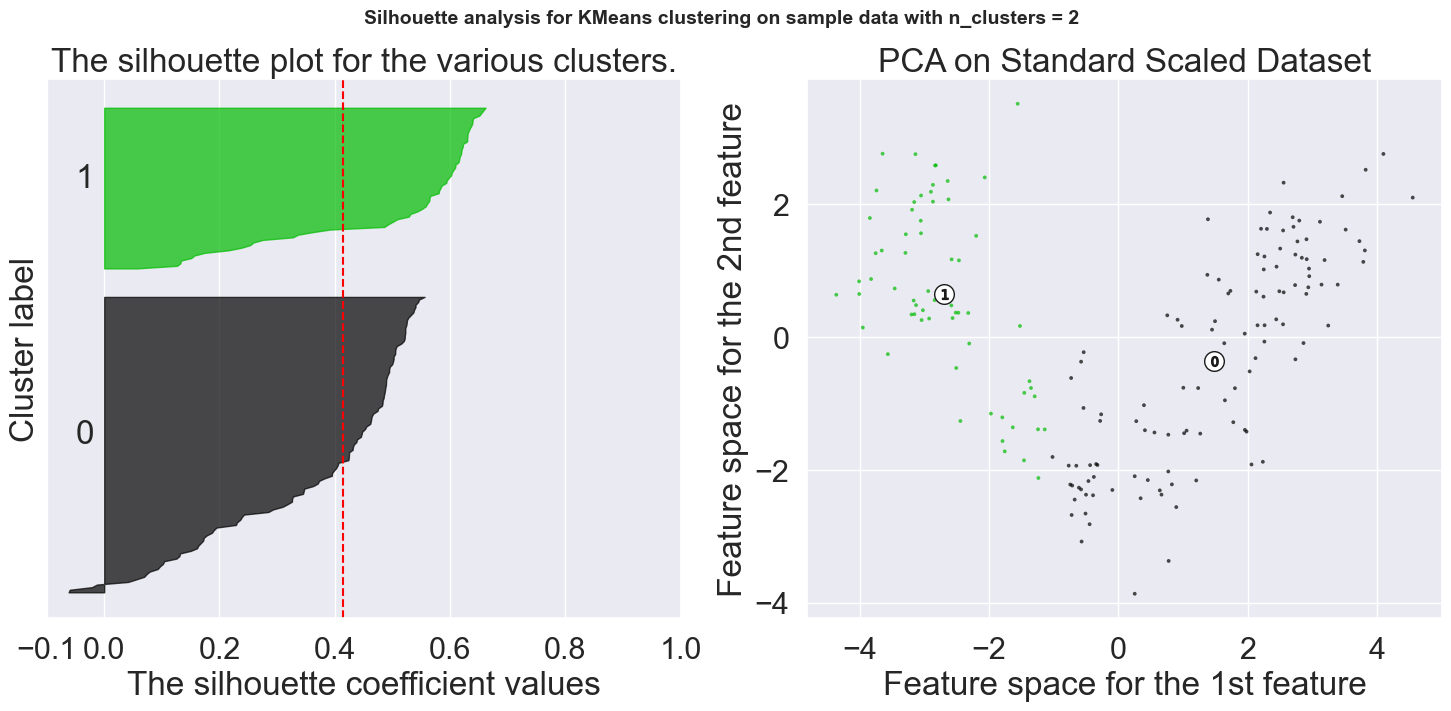

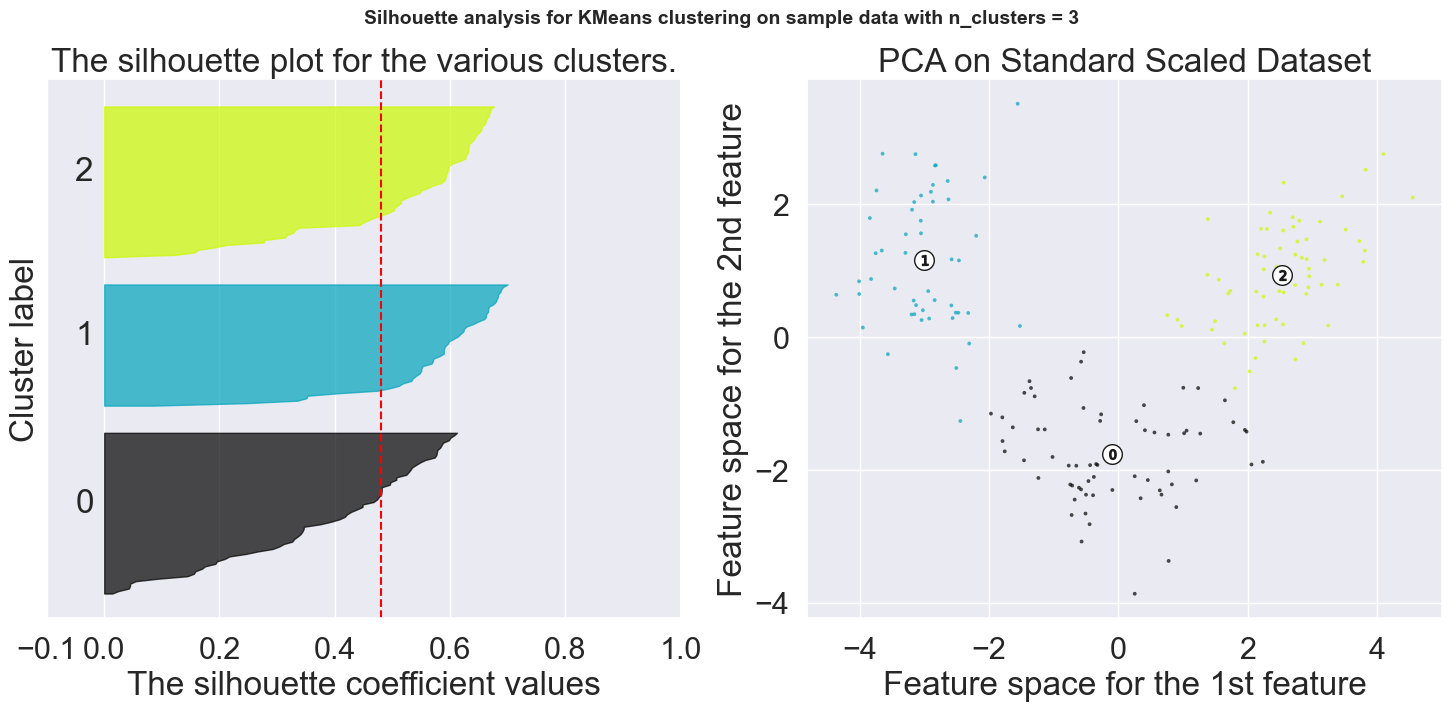

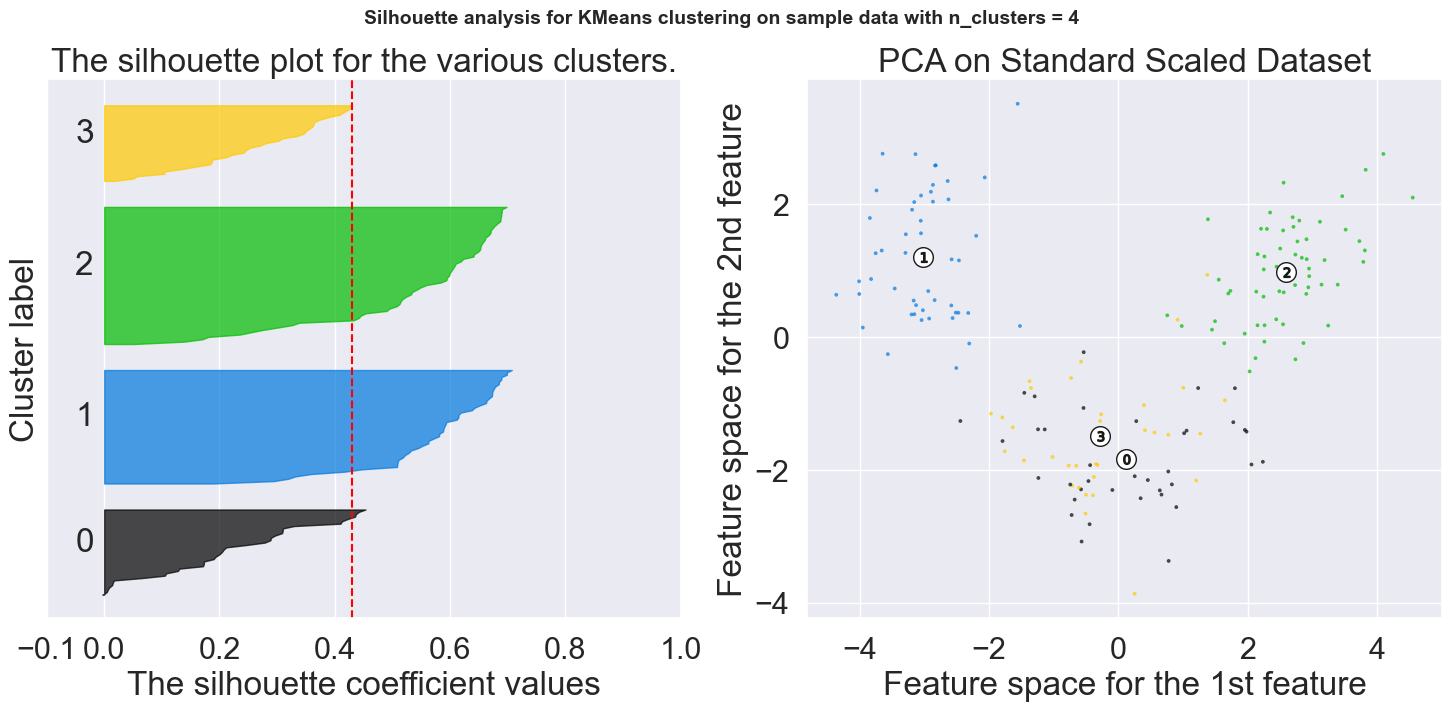

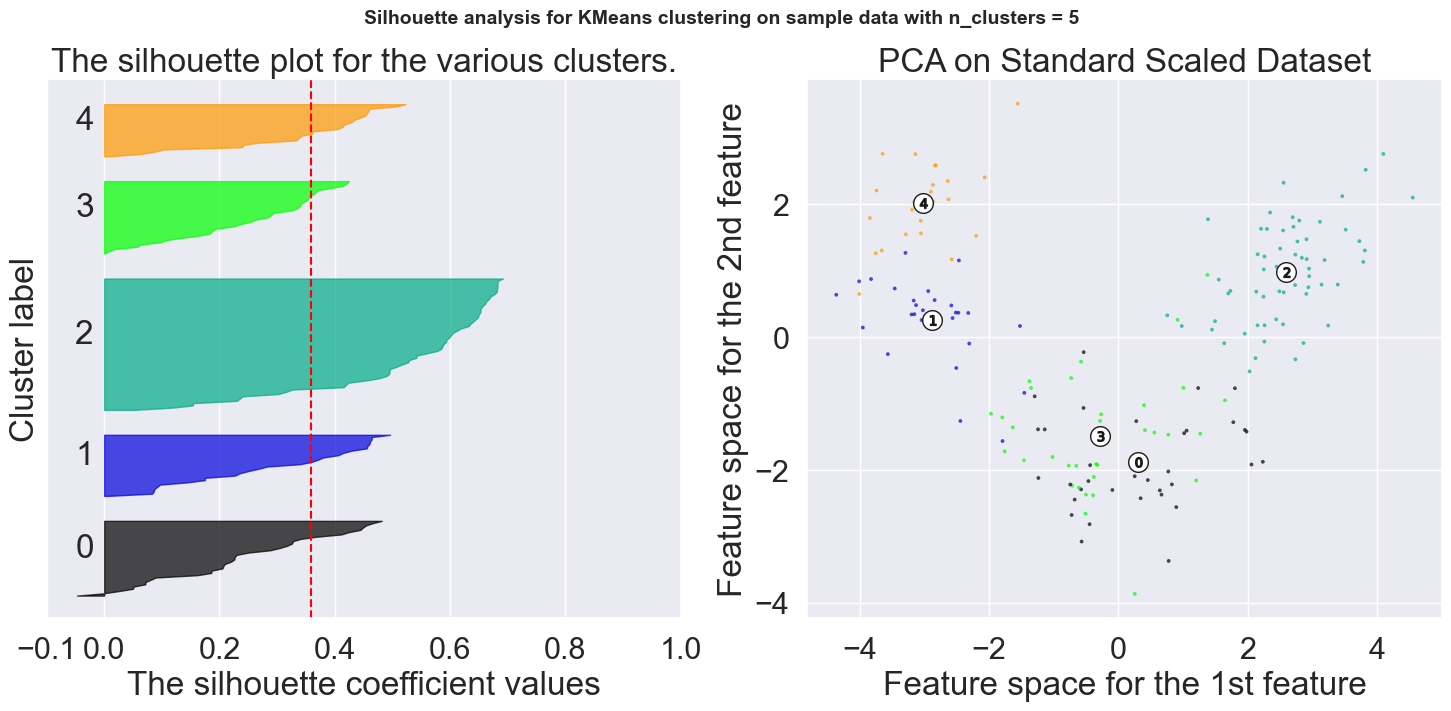

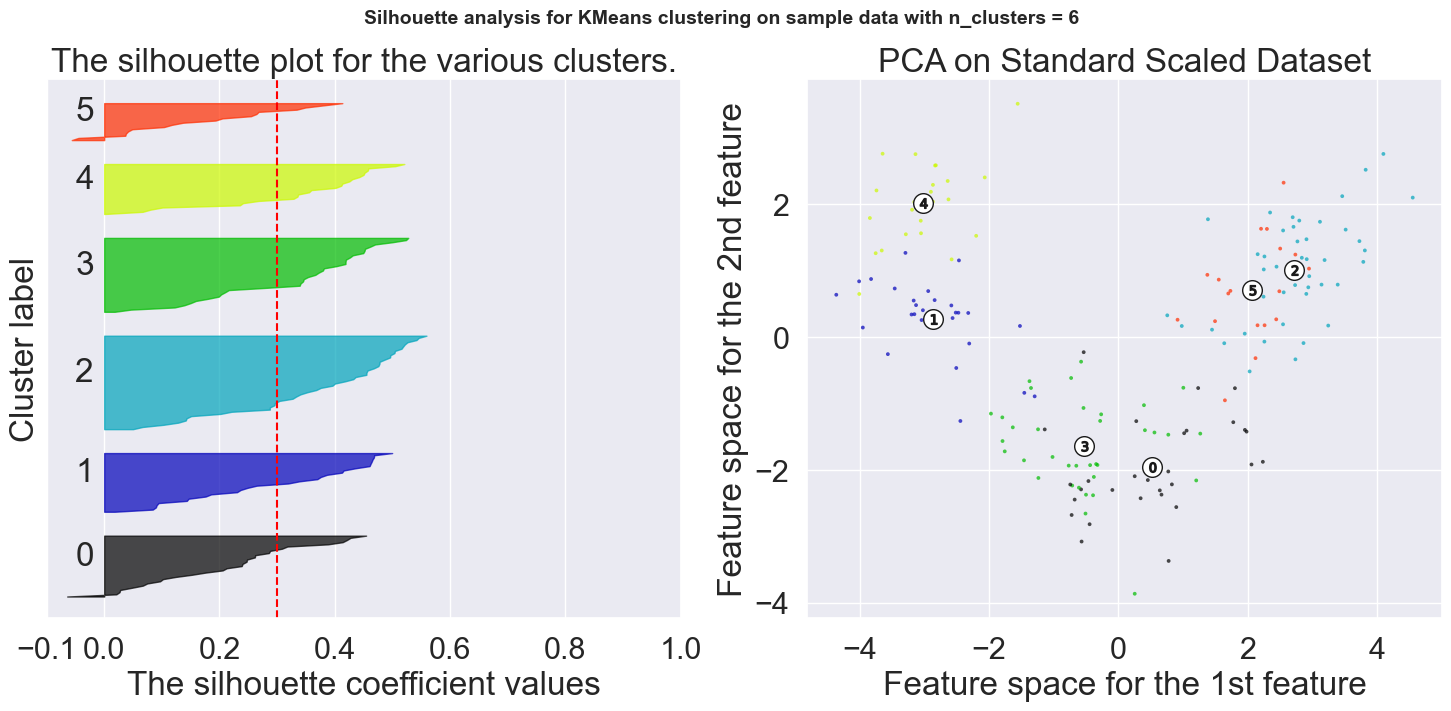

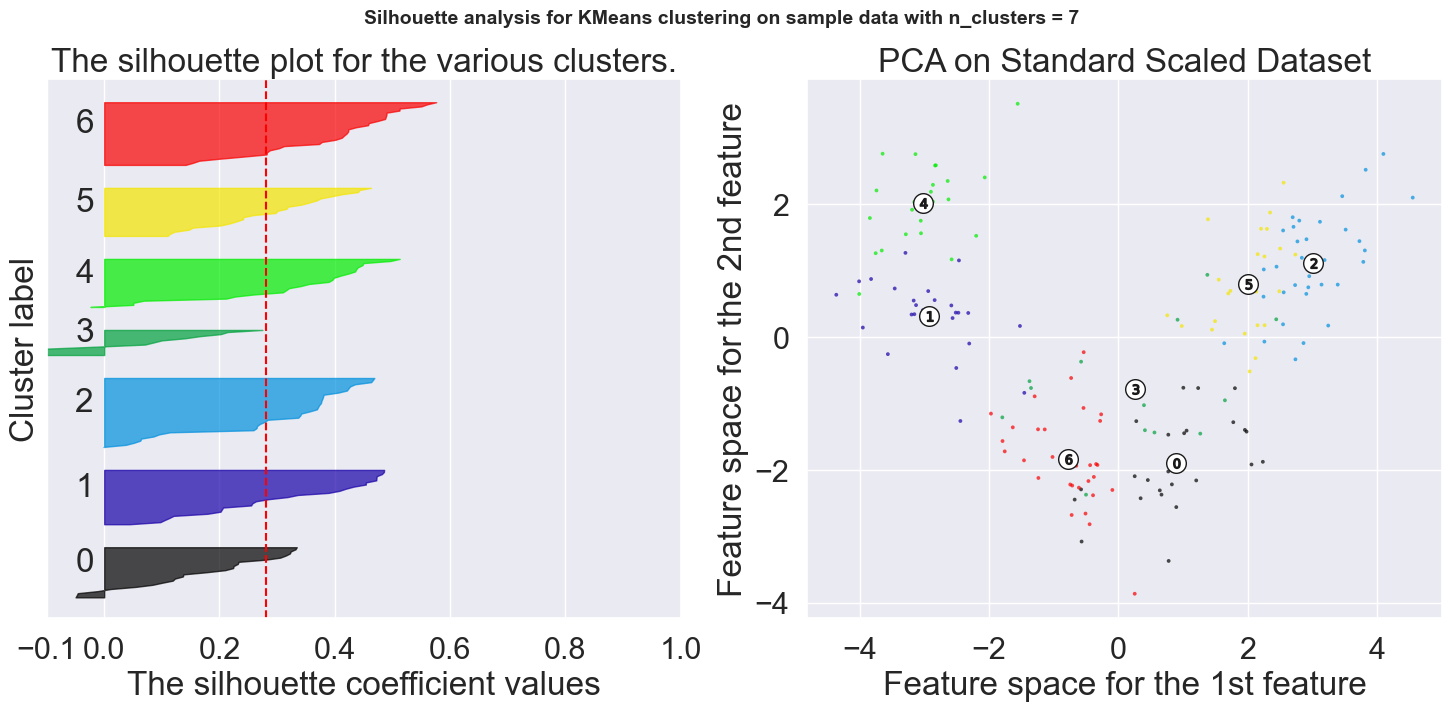

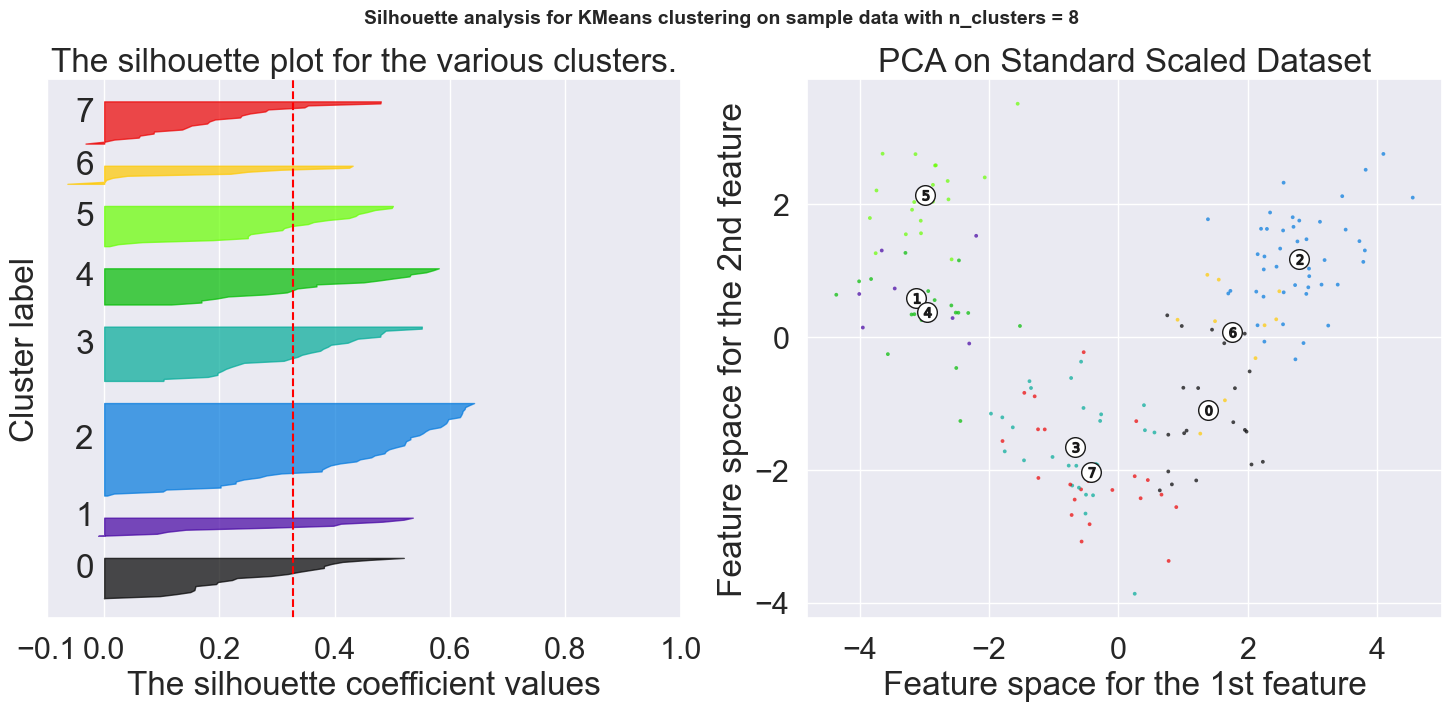

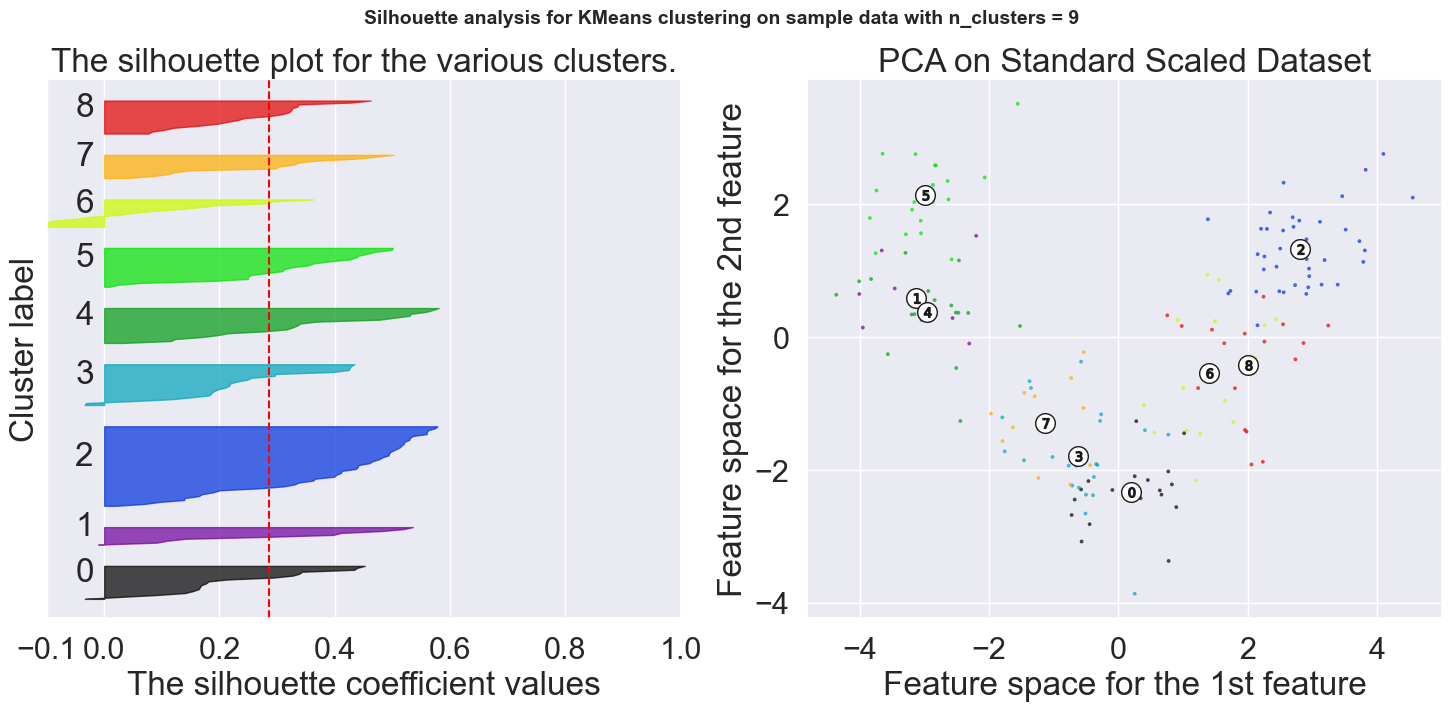

In [42]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pca_std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(pca_std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("PCA on Standard Scaled Dataset")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

####  Conclusion:
According the the silhouette score of:

The standardized data, the ideal <b>number of clusters is 3</b>, with a score higher than other options, of <b>0.48

##  Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset 

In [43]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_df)
y_predict_kmeans.shape

(178,)

In [44]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [45]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [46]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-0.10077296, -1.75759214,  0.17012555],
       [-3.00022931,  1.16059366, -0.23271123],
       [ 2.52681421,  0.93502255,  0.00656895]])

In [47]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

501.90252485003

In [48]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_

In [49]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

Alcohol     Malic      Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean     mean       mean        mean      mean   
Kmeans_label                                                                  
0             12.256818  1.889242  2.22803  20.013636   92.848485  2.244242   
1             13.144000  3.346200  2.42560  21.330000   98.640000  1.677200   
2             13.676774  1.997903  2.46629  17.462903  107.967742  2.847581   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0              2.040303      0.360303        1.608939  3.015152  1.061455   
1              0.807000      0.450400        1.156400  7.264400  0.686200   
2              3.003226      0.292097        1.922097  5.453548  1.065484   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             2.785000   509.257576   94.696970  
1             1.698800   622.440000  152.380000  
2             3.163387  1100.225806   33.258065

###  Elbow Method and Silhouette Score on PCA MinMaxScaler Applied Data

In [50]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 38.47it/s]


In [51]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    silhouette[i] = sil(pca_minmax_df, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 32.30it/s]


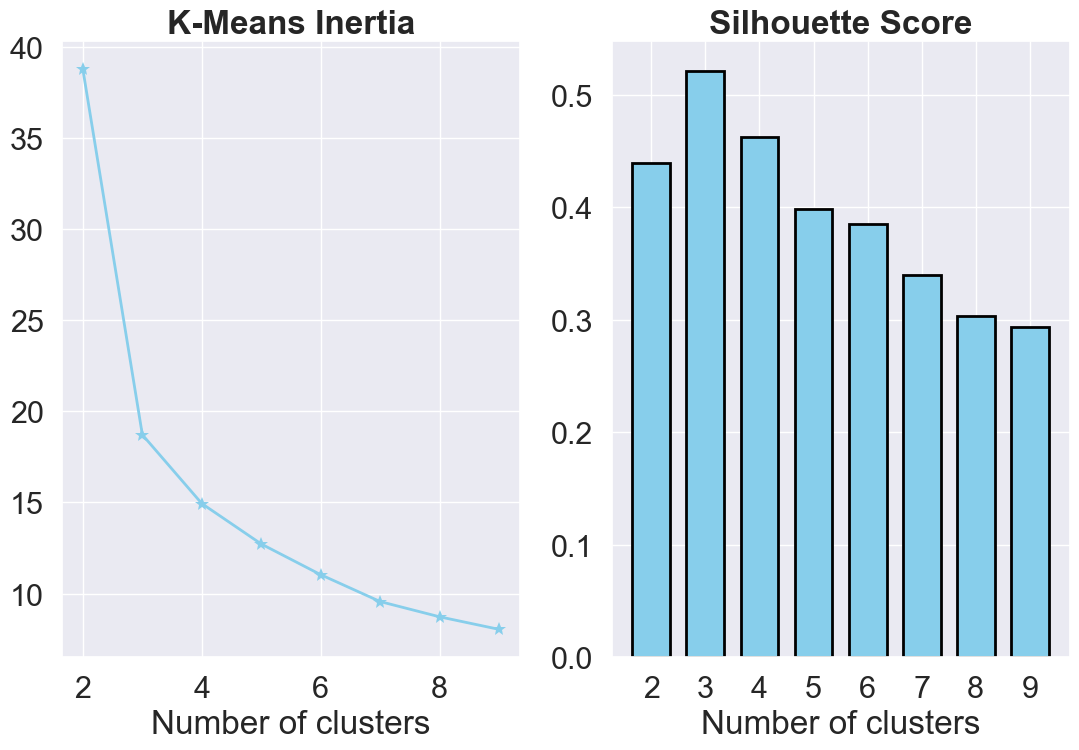

In [52]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

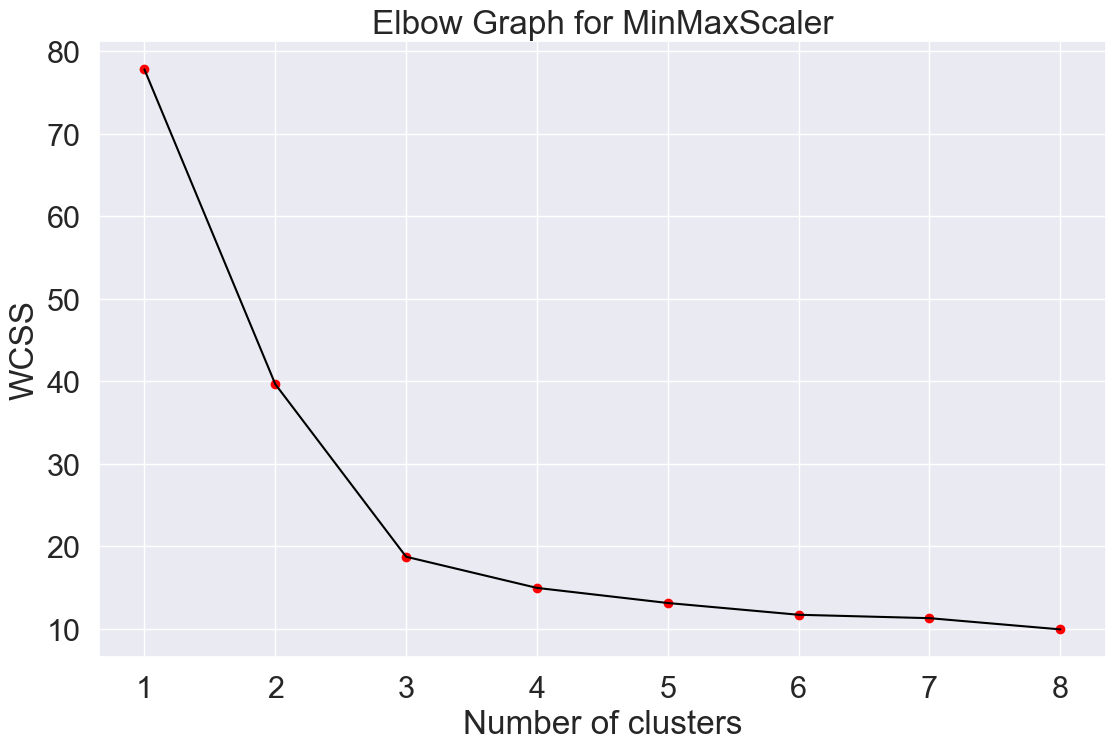

In [53]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

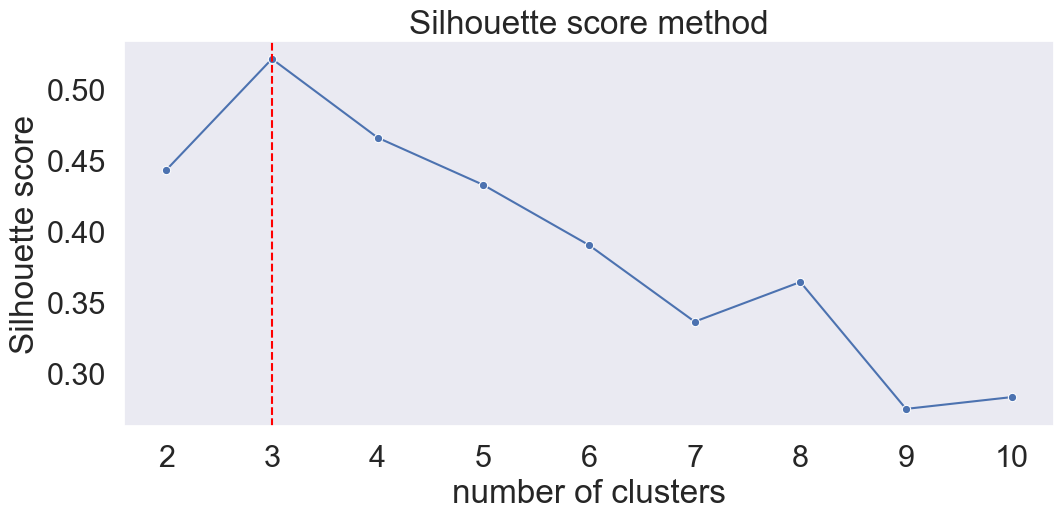

In [54]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(pca_minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(pca_minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


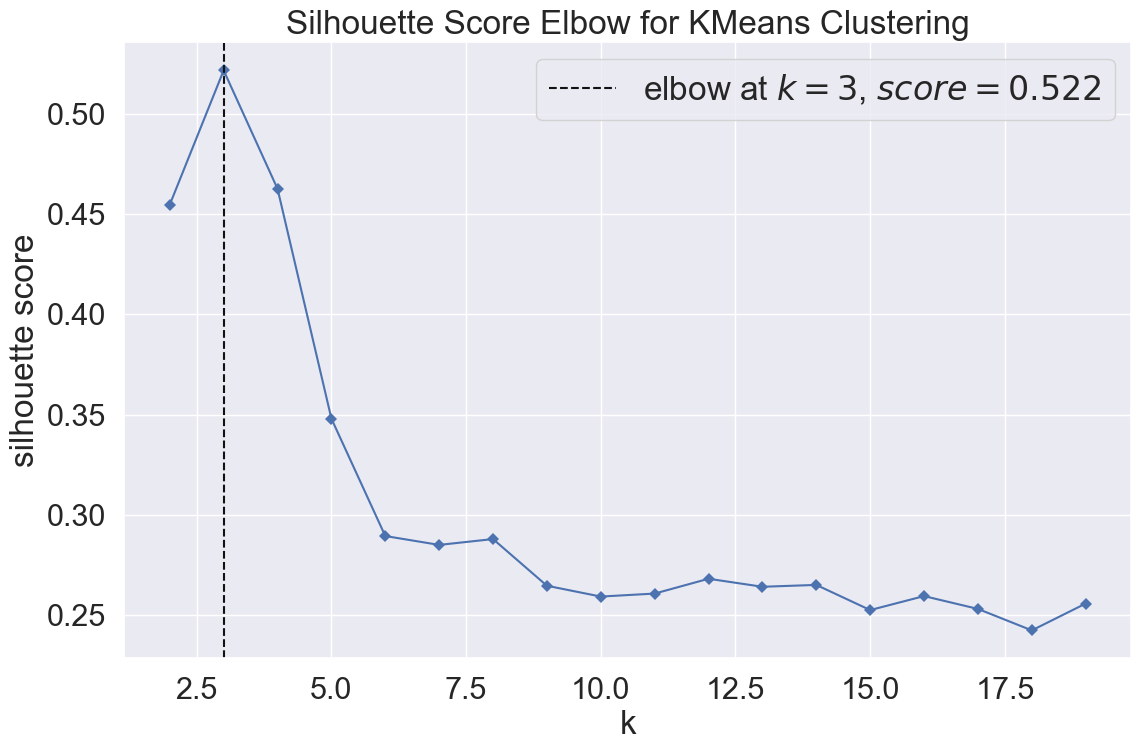

In [55]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(pca_minmax_df)    
visualizer.show()
plt.show()

In [56]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_minmax_df)
    sil_score1= sil(pca_minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4546329291505124
For n_clusters = 3 The average silhouette_score is : 0.5215335527289149
For n_clusters = 4 The average silhouette_score is : 0.45525039740074885
For n_clusters = 5 The average silhouette_score is : 0.4234785748657708
For n_clusters = 6 The average silhouette_score is : 0.3648927720350466
For n_clusters = 7 The average silhouette_score is : 0.37674391900443355
For n_clusters = 8 The average silhouette_score is : 0.35829603341361477
For n_clusters = 9 The average silhouette_score is : 0.31642428416845125


For n_clusters = 2 The average silhouette_score is : 0.4546329291505124
For n_clusters = 3 The average silhouette_score is : 0.5215335527289149
For n_clusters = 4 The average silhouette_score is : 0.46252684258139387
For n_clusters = 5 The average silhouette_score is : 0.34800149529150115
For n_clusters = 6 The average silhouette_score is : 0.2895038681810364
For n_clusters = 7 The average silhouette_score is : 0.2850843230672276
For n_clusters = 8 The average silhouette_score is : 0.28799359523903073
For n_clusters = 9 The average silhouette_score is : 0.2647294037261626


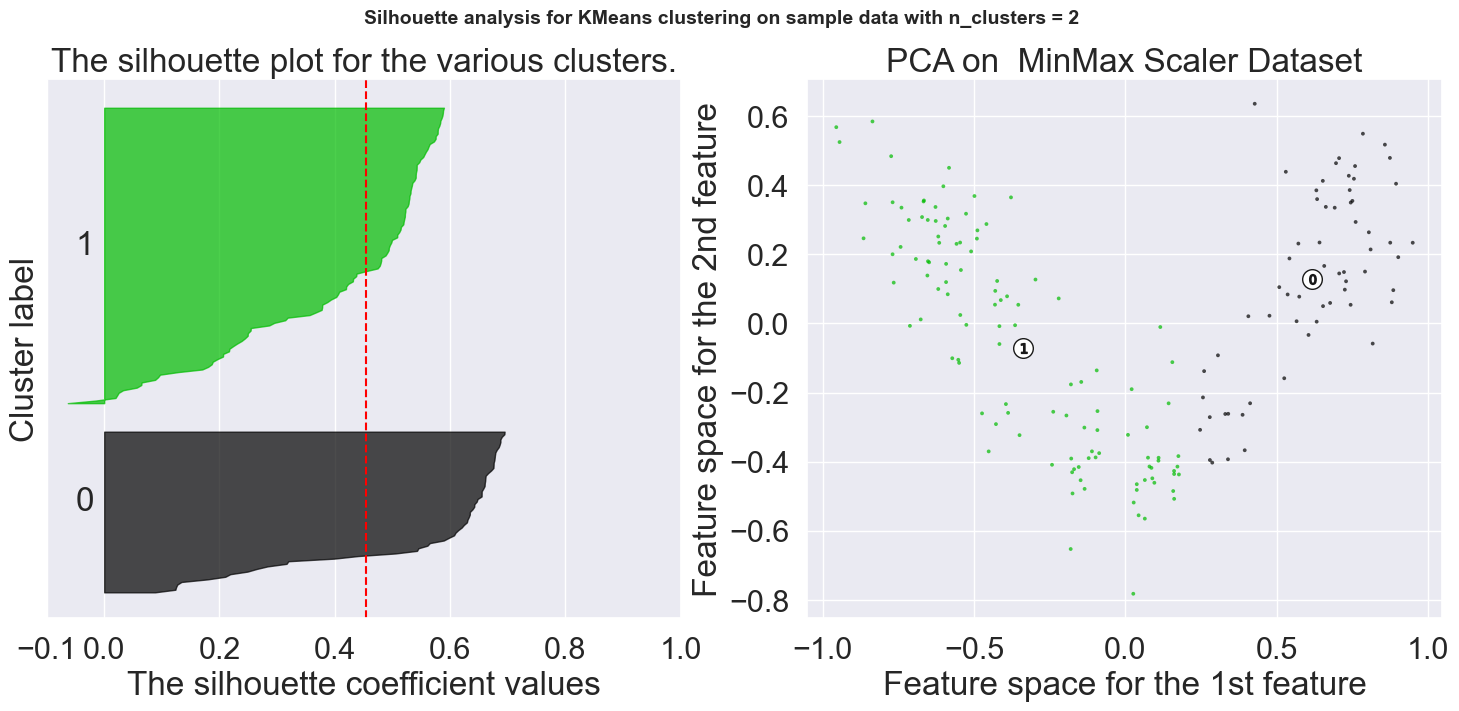

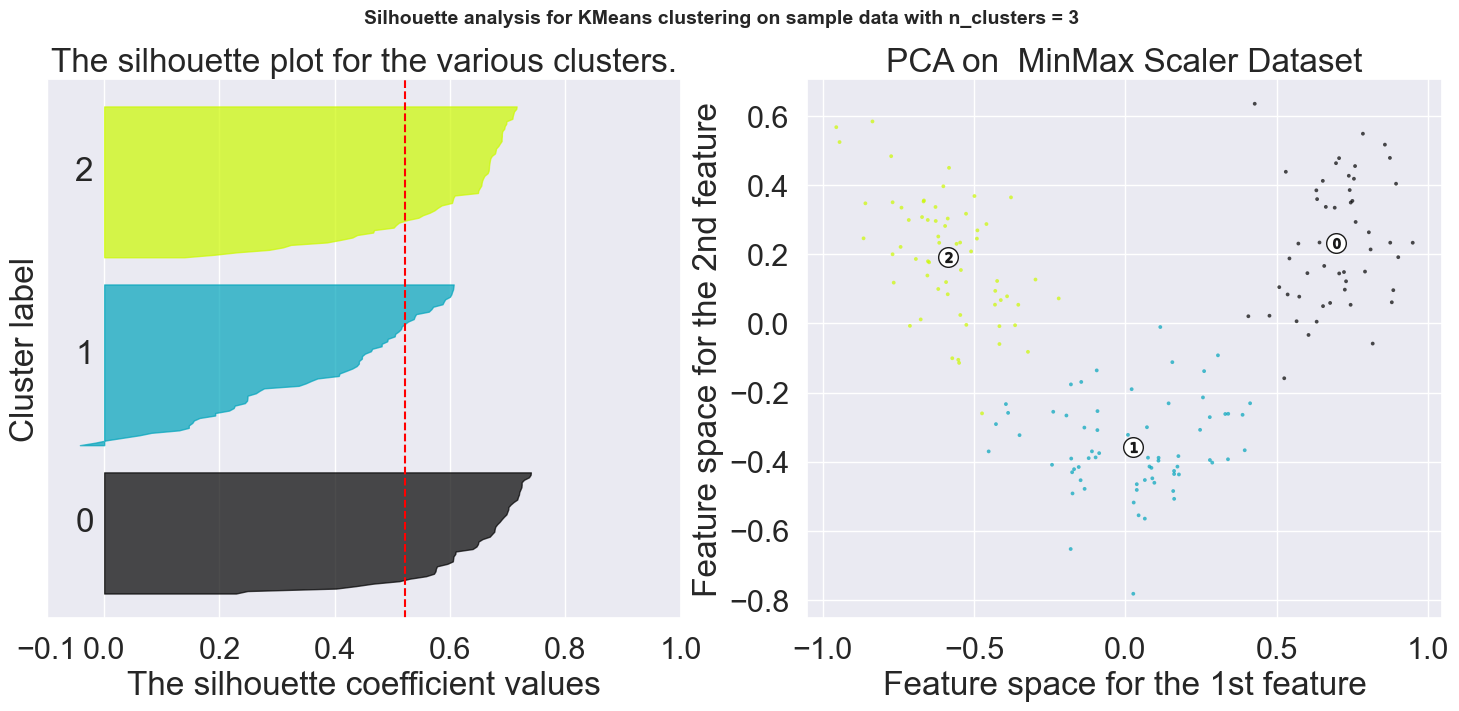

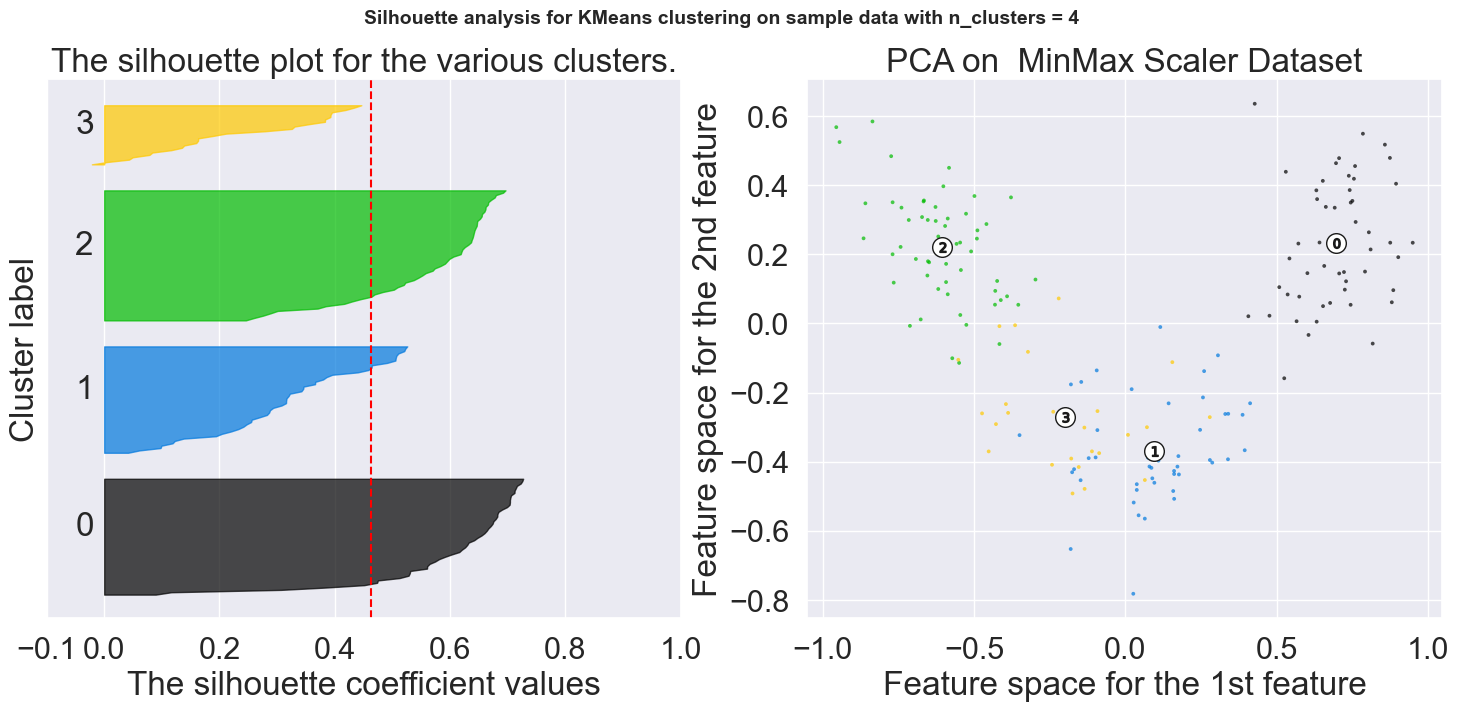

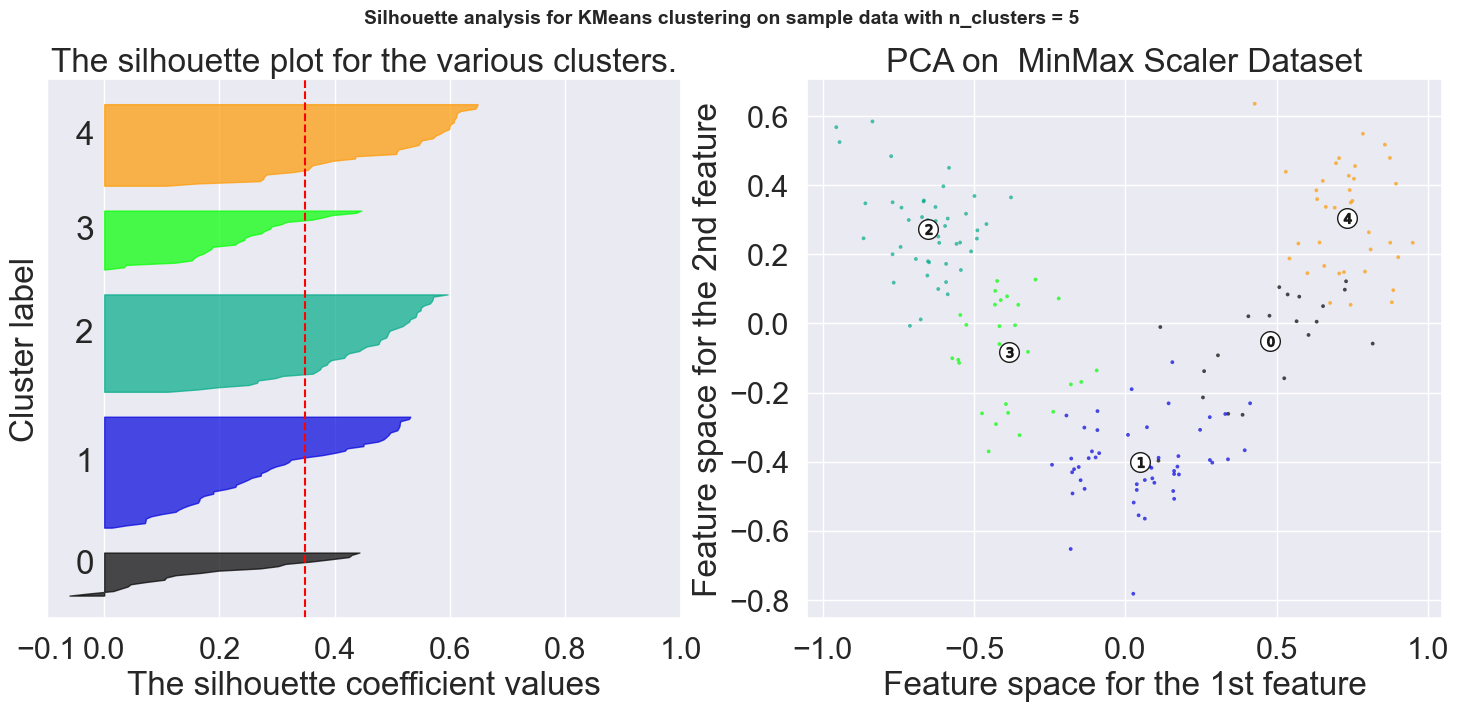

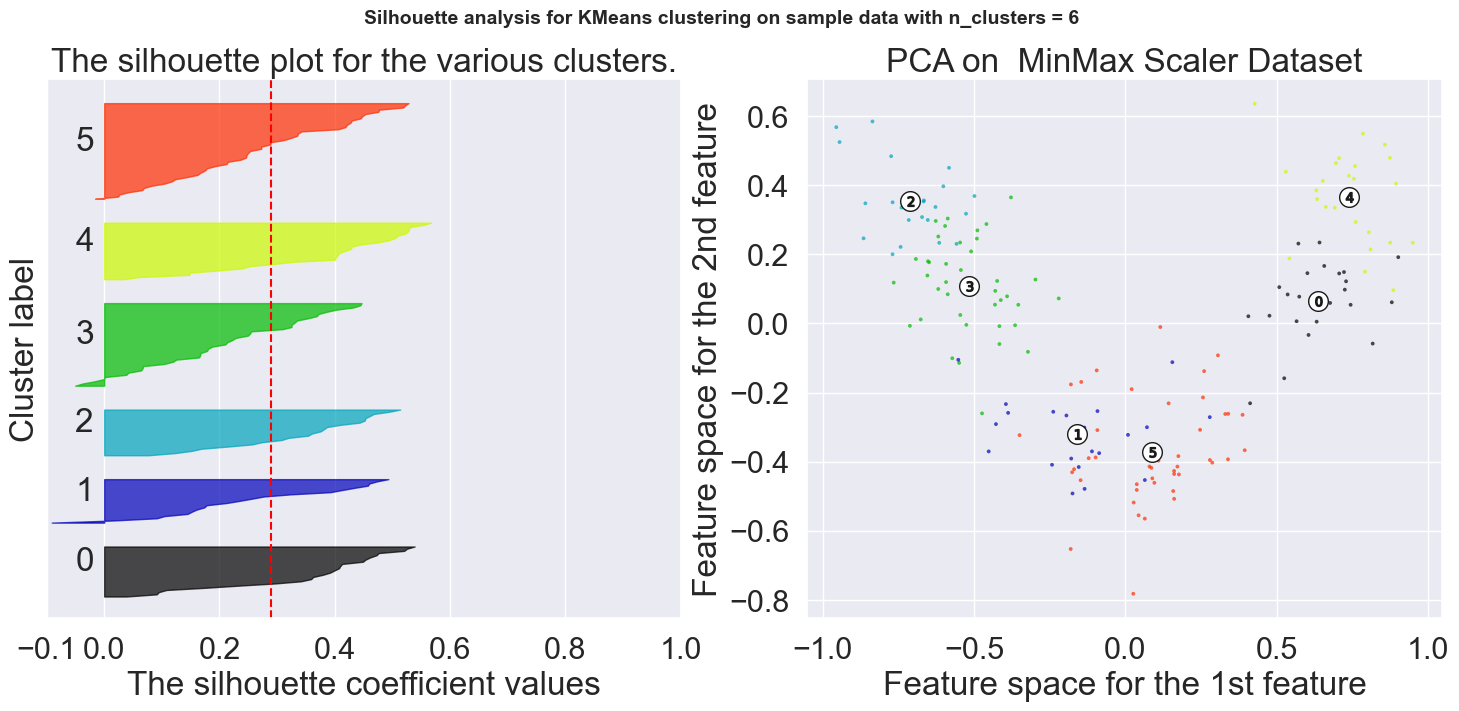

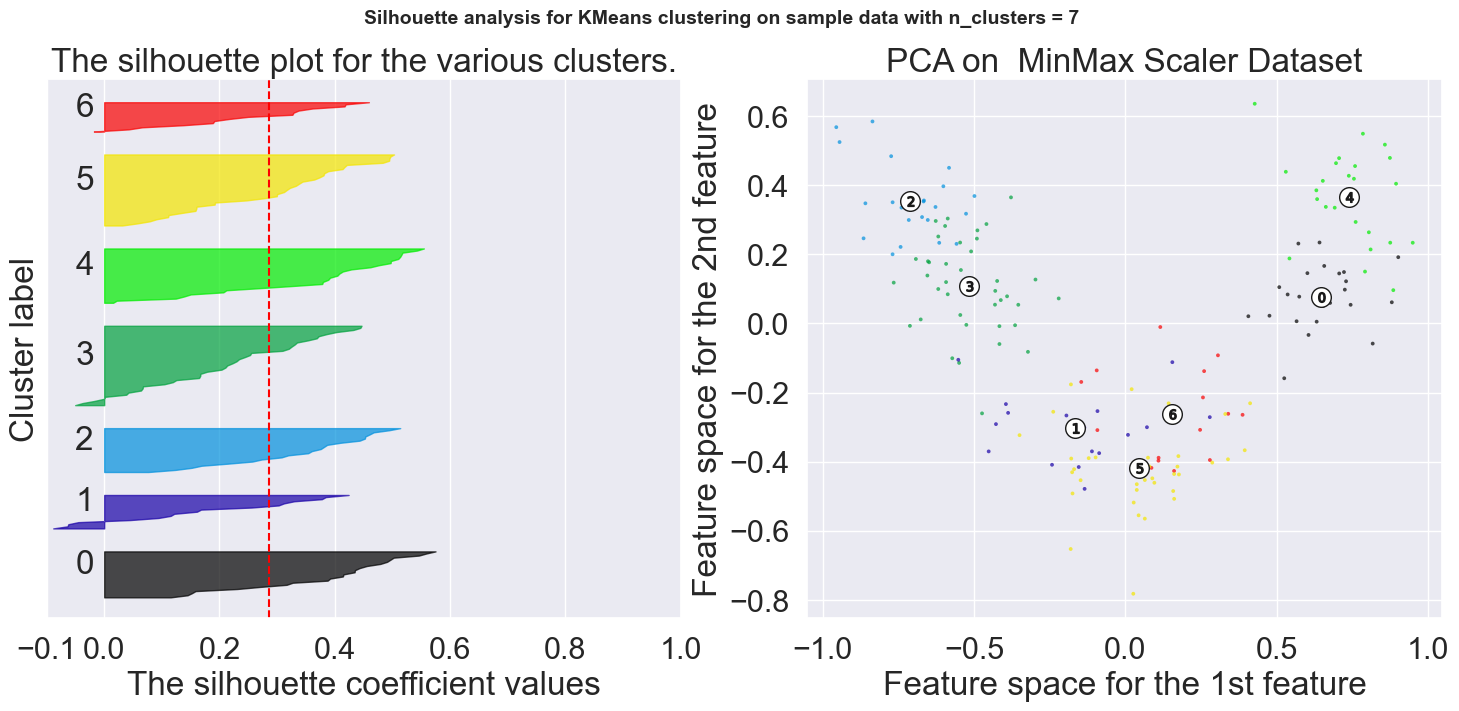

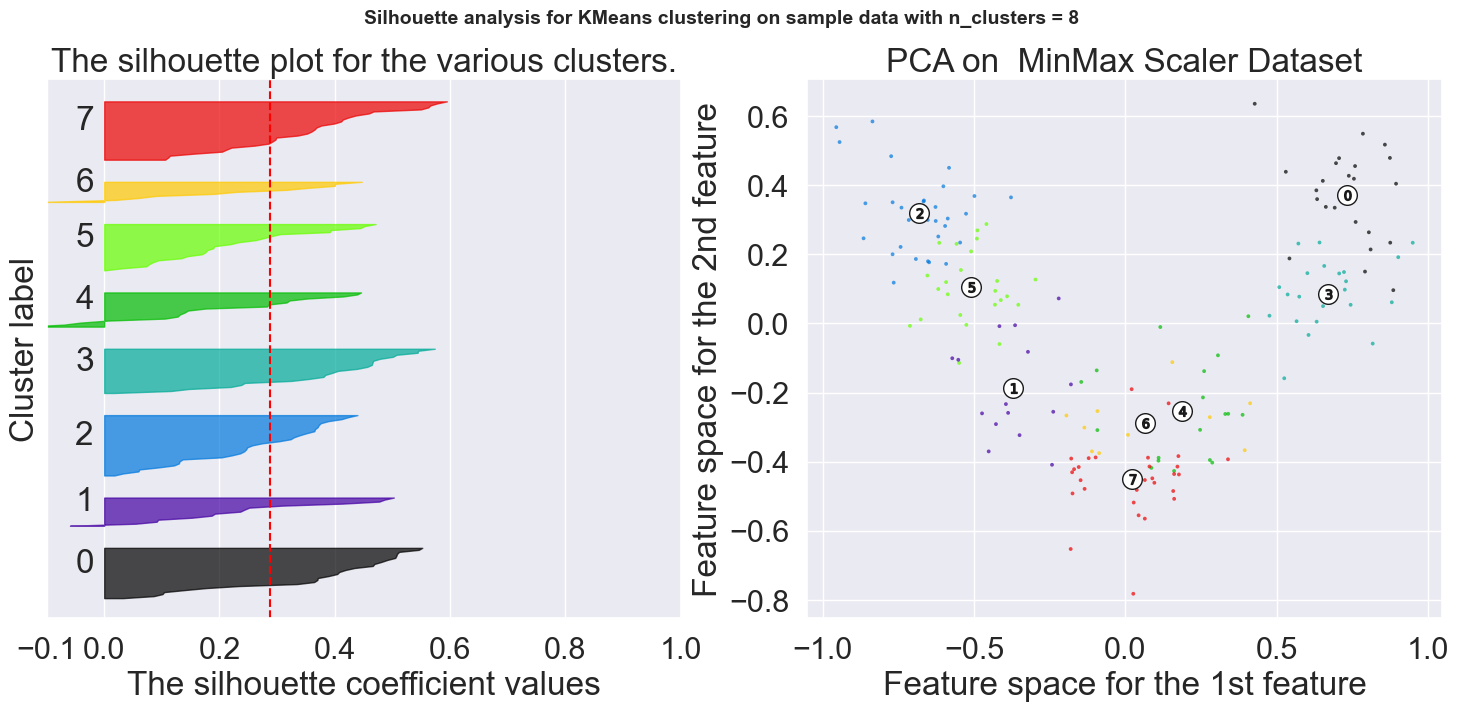

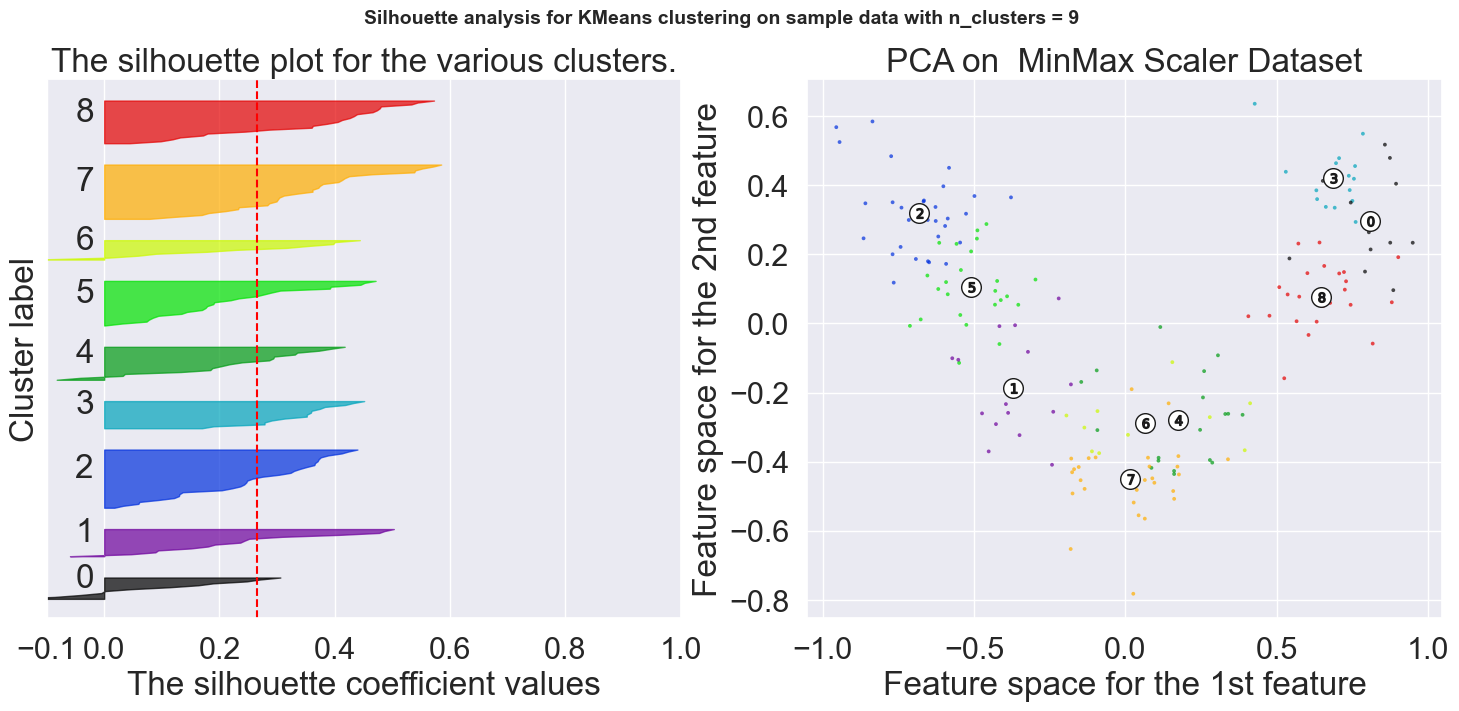

In [57]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(pca_minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("PCA on  MinMax Scaler Dataset")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

####  Conclusion:
According the the silhouette score of:

+ The PCA on MinMax Scaler Applied data, the ideal <b>number of clusters</b> is <b>3</b>, with a score higher than other options, of <b>0.52</b>, but if you notice the number of cluster 4 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no overlapping in cluster segregation than the consecutive rest

+ If we check <b>silhouette score</b> with <b>PCA on Normalize data kmeans model 0.52>0.48</b> than of PCA on Standard Scaler Dataset. 

+ <b>Best score always close to +1.

##  Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset

In [58]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_minmax_df)
y_predict_kmeans.shape

(178,)

In [59]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [60]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [61]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 0.02383121, -0.35770859,  0.01239953],
       [ 0.69579292,  0.23298991,  0.00190367],
       [-0.58649203,  0.19289148, -0.01473472]])

In [62]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

18.71706192569446

In [63]:
#Assign clusters to the data set

df['Kmeans_label'] = model_kmeans.labels_

In [64]:
# Group data by Clusters (K=3)
df.groupby('Kmeans_label').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             12.233333  1.905000  2.251212  20.218182   93.469697  2.247273   
1             13.144000  3.346200  2.425600  21.330000   98.640000  1.677200   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0              2.069091      0.363485        1.602727  3.025758  1.058576   
1              0.807000      0.450400        1.156400  7.264400  0.686200   
2              2.972581      0.288710        1.928710  5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             2.792727   508.696970   95.530303  
1             1.698800   622.440000  152.380000  
2             3.155161  1100.822581   32.370968

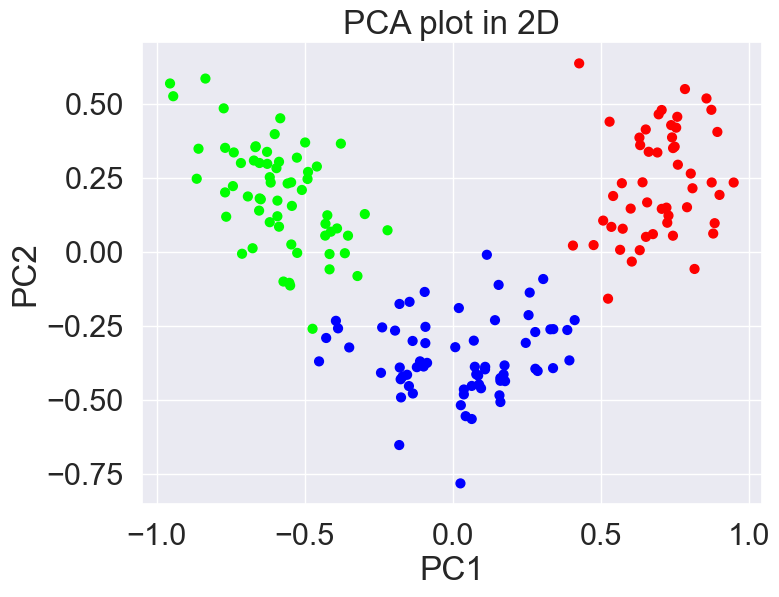

In [65]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### We can now clearly see the 3 number of clusters formed

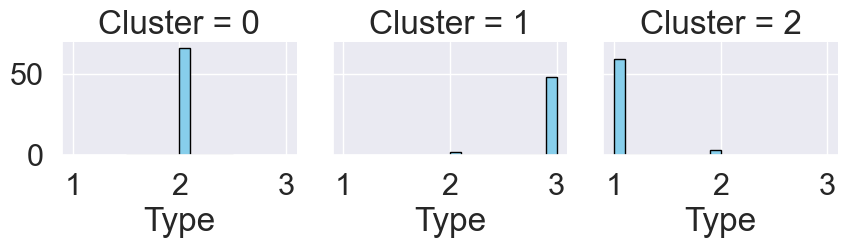

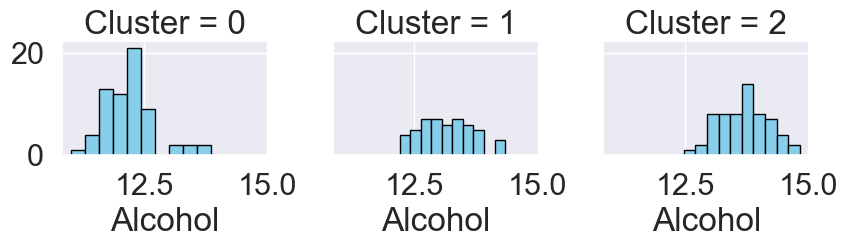

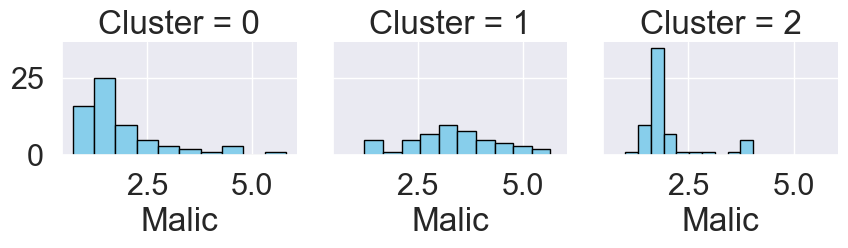

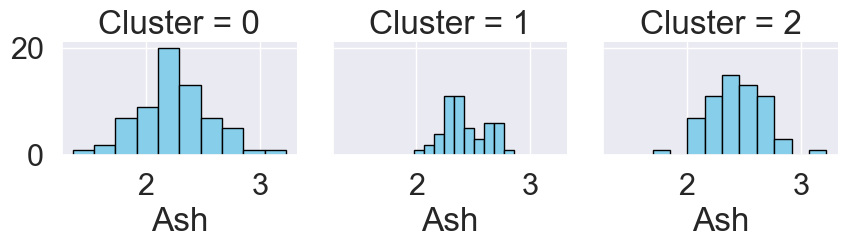

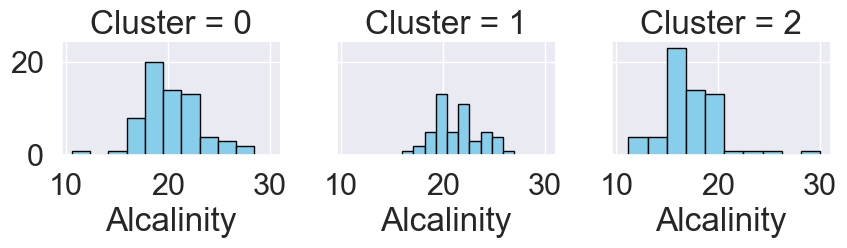

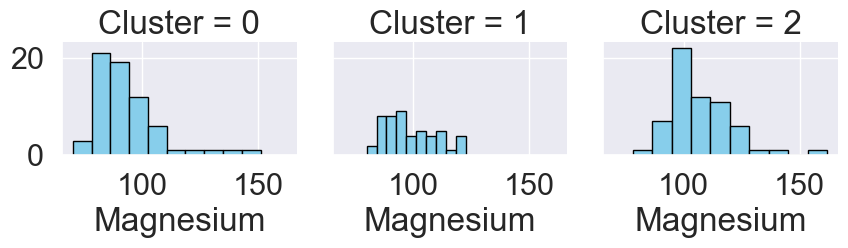

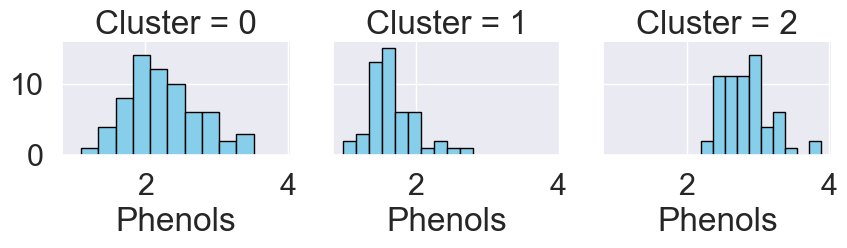

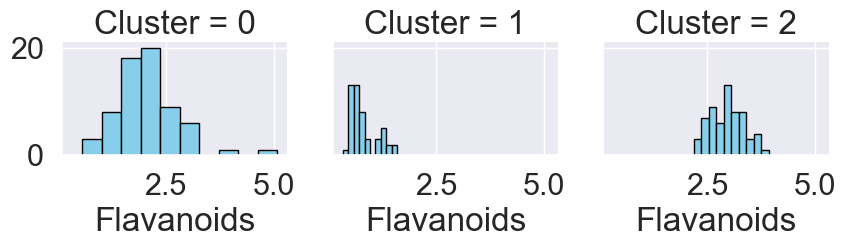

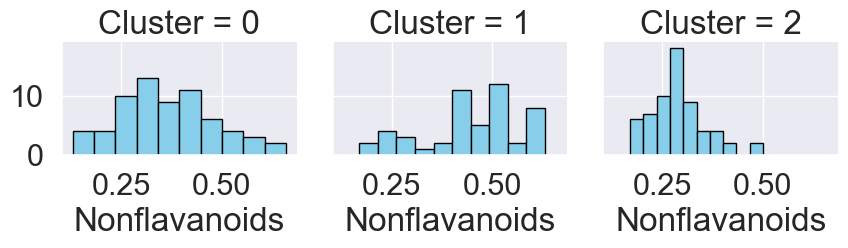

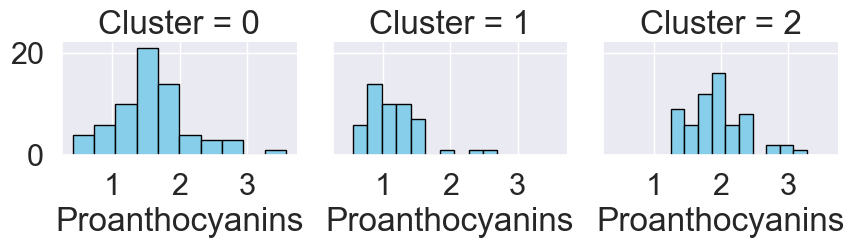

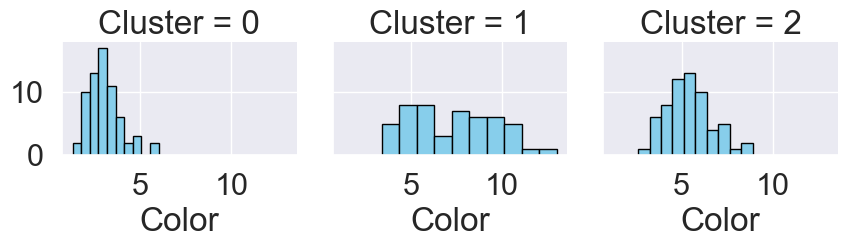

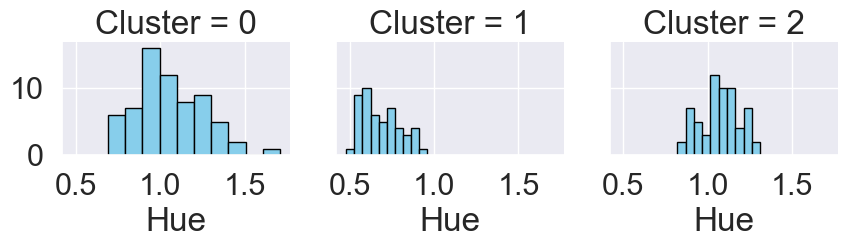

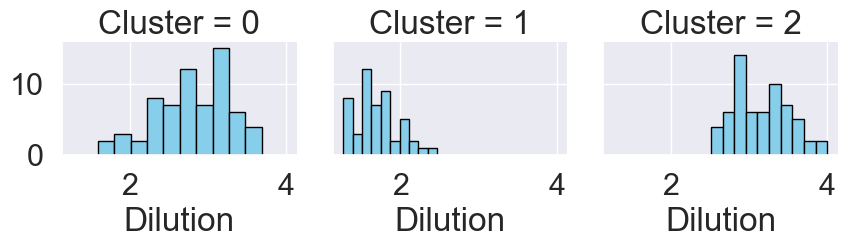

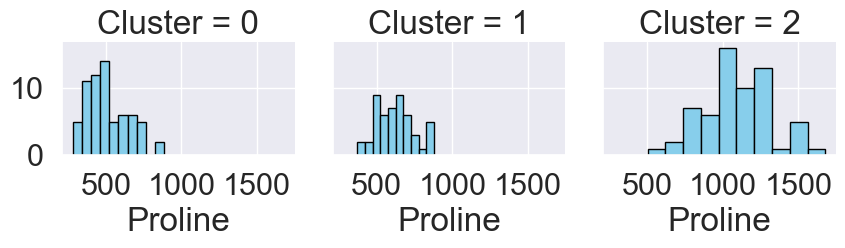

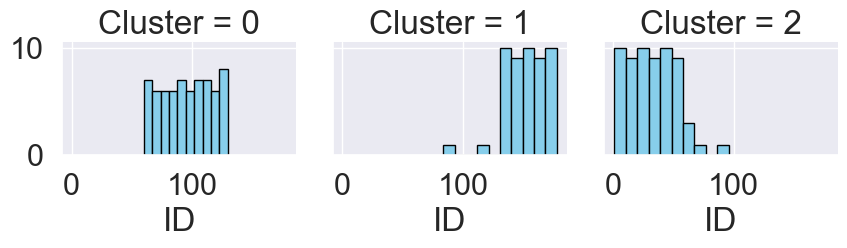

In [66]:
df1 = data.copy()
df1['Cluster'] = model_kmeans.labels_

aux=df1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(df1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [67]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [68]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Type                 2.000000        2.9600      1.048387
Alcohol             12.233333       13.1440     13.701774
Malic                1.905000        3.3462      1.981129
Ash                  2.251212        2.4256      2.441613
Alcalinity          20.218182       21.3300     17.245161
Magnesium           93.469697       98.6400    107.306452
Phenols              2.247273        1.6772      2.844355
Flavanoids           2.069091        0.8070      2.972581
Nonflavanoids        0.363485        0.4504      0.288710
Proanthocyanins      1.602727        1.1564      1.928710
Color                3.025758        7.2644      5.442258
Hue                  1.058576        0.6862      1.068548
Dilution             2.792727        1.6988      3.155161
Proline            508.696970      622.4400   1100.822581
ID                  95.530303      152.3800     32.370968
Cluster              0.000000        1.0000      2.000000

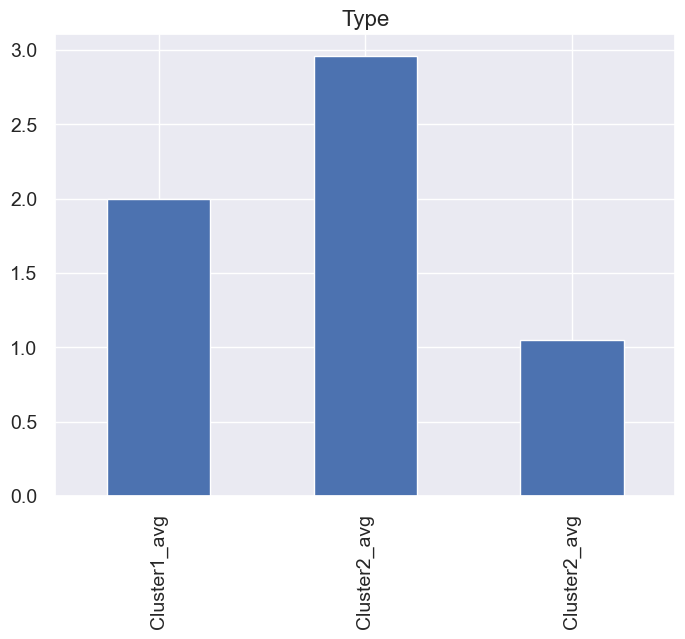

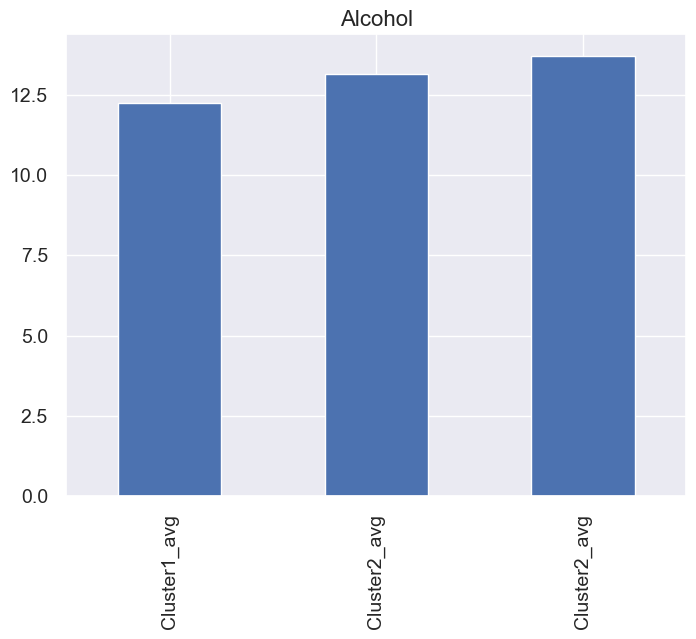

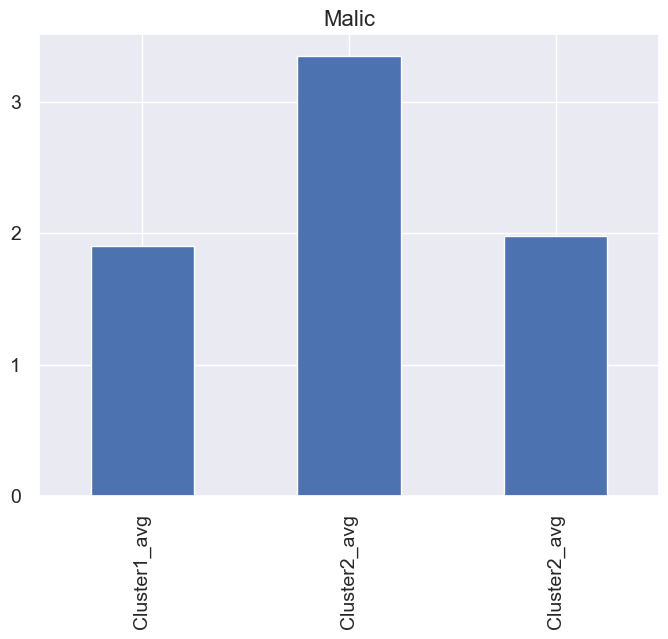

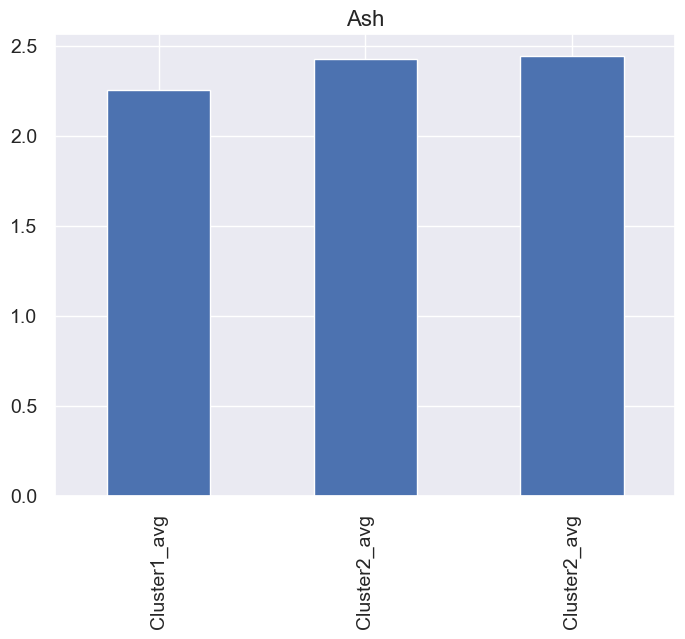

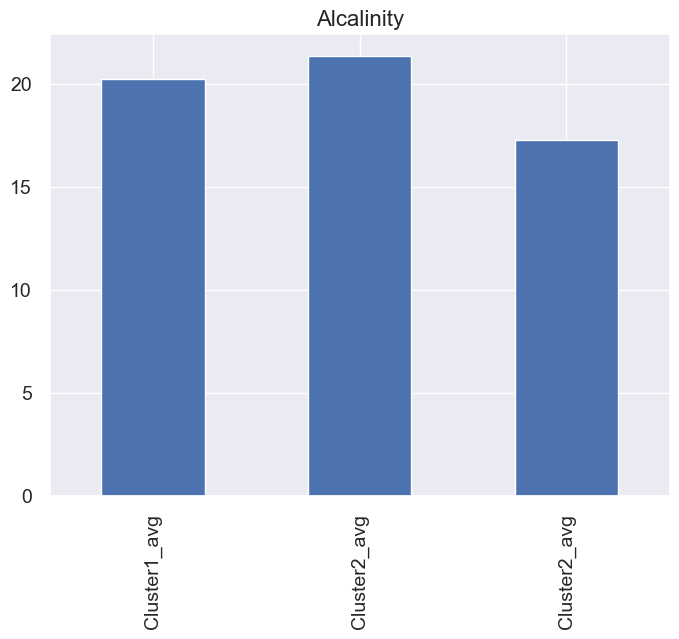

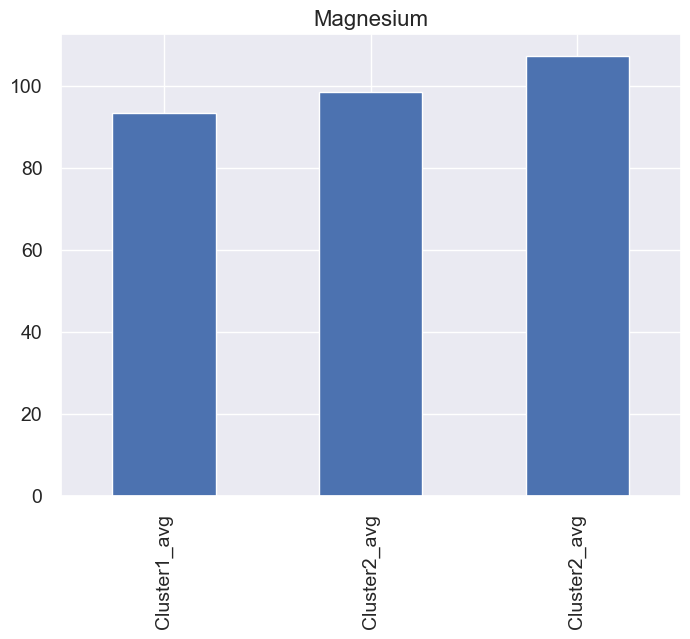

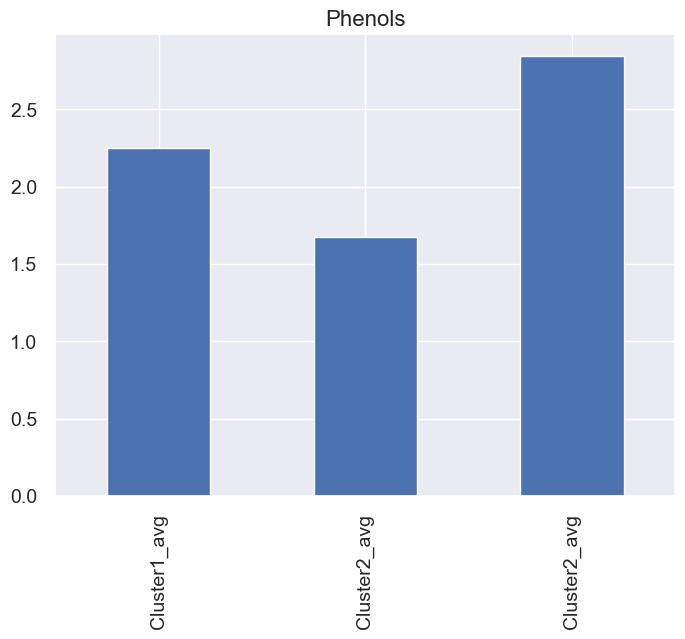

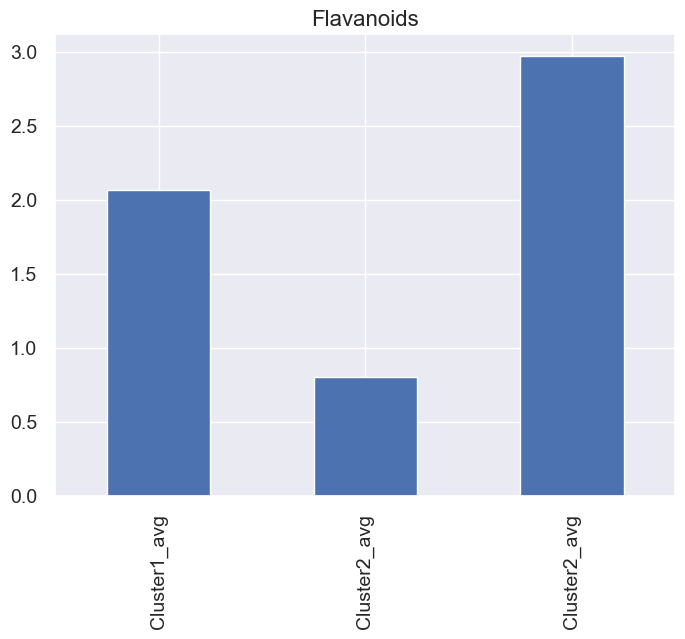

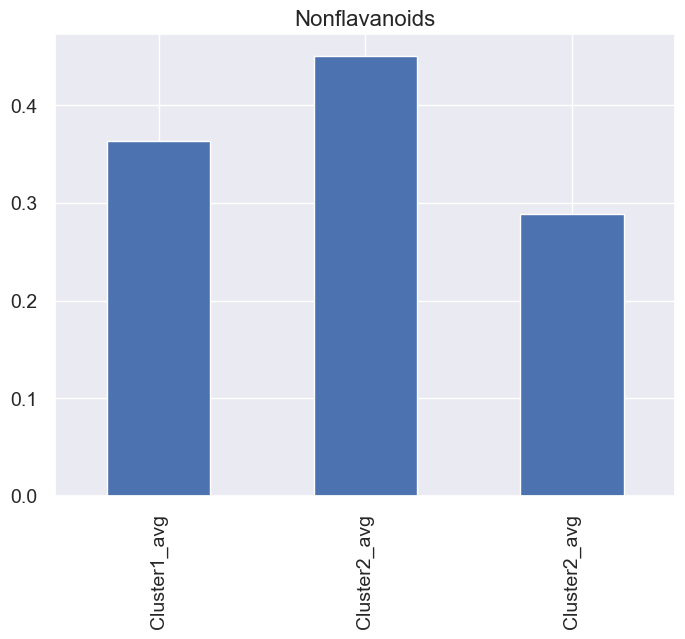

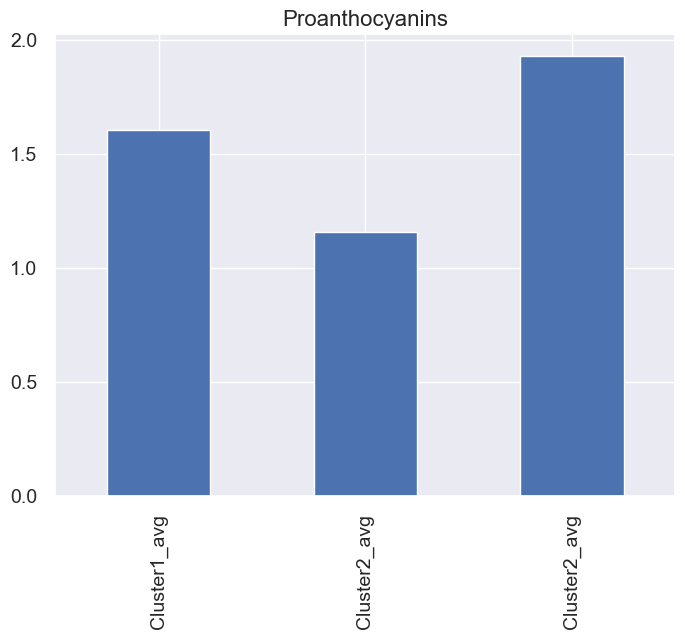

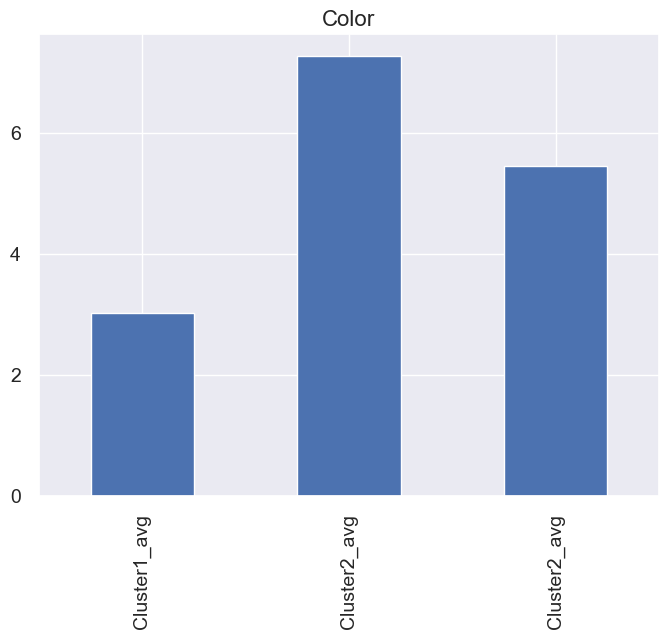

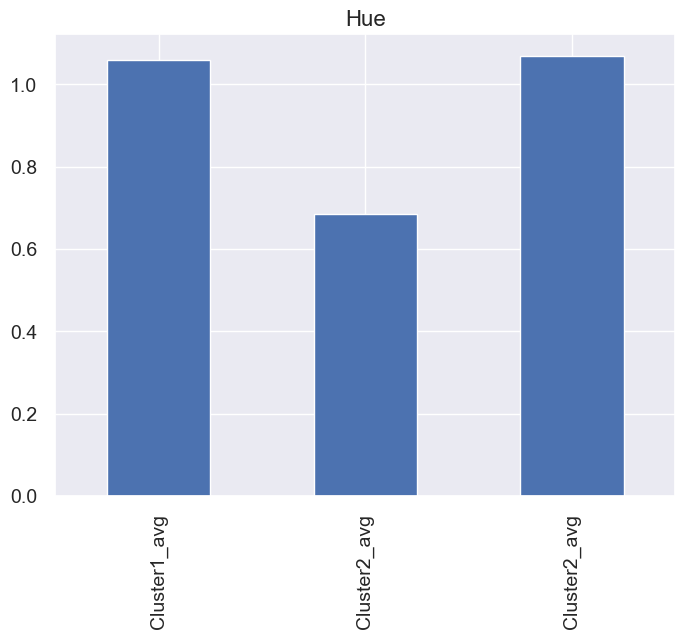

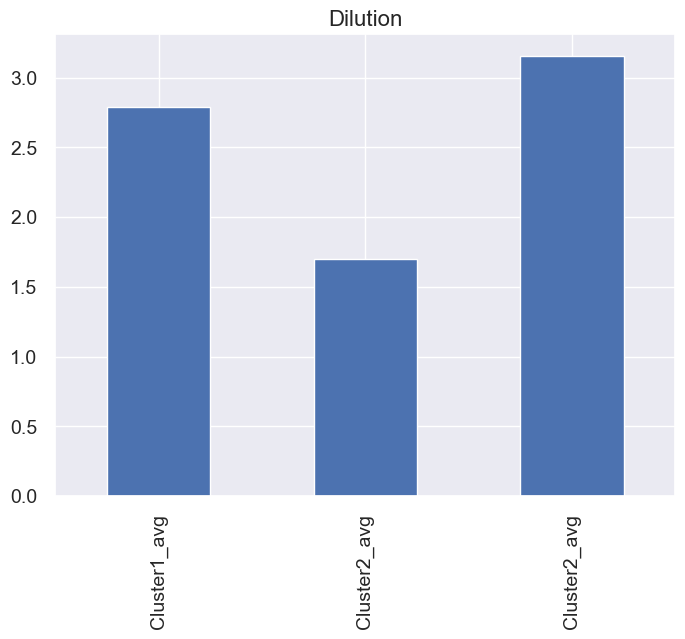

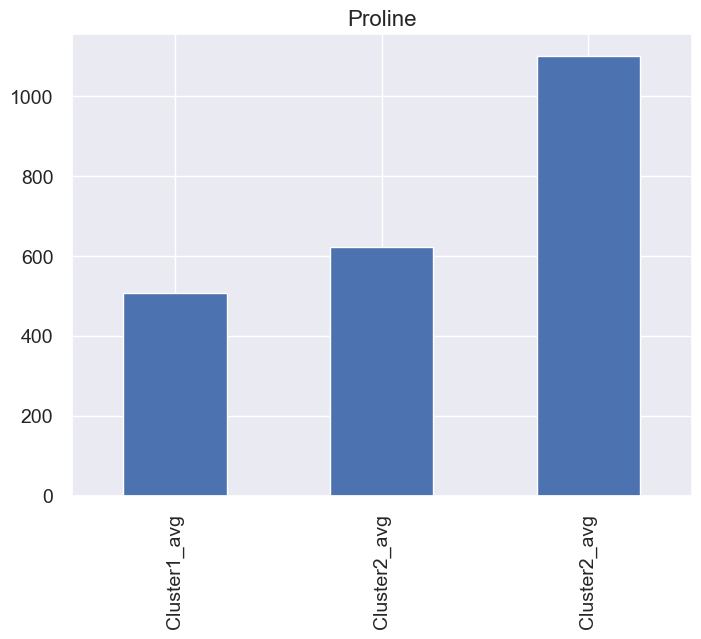

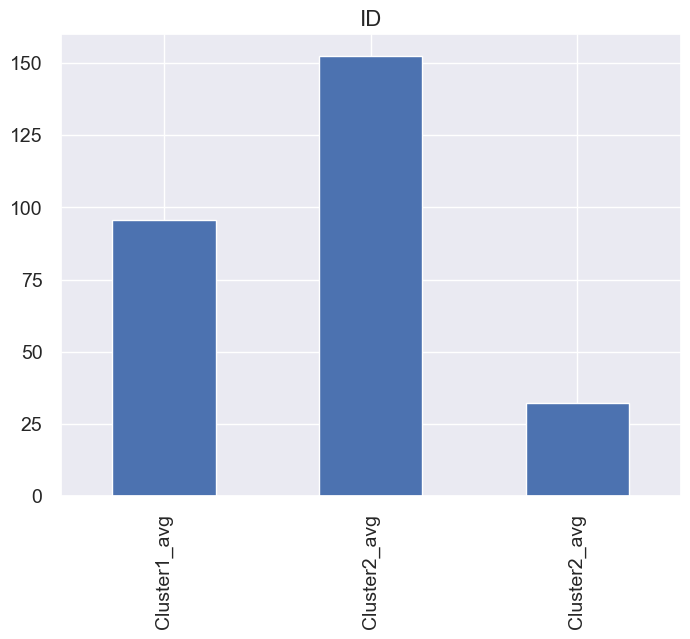

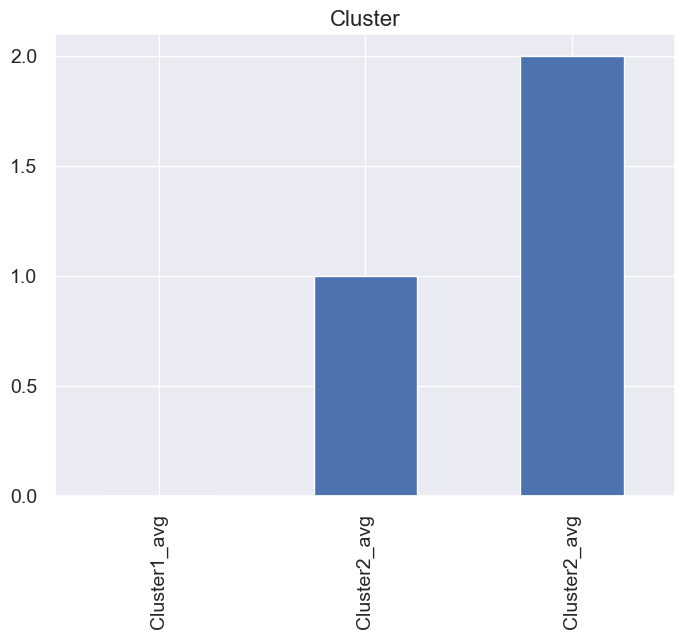

In [69]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

###  Comparing Kmeans Clusters with the Original Classified Dataset using "Type" Feature

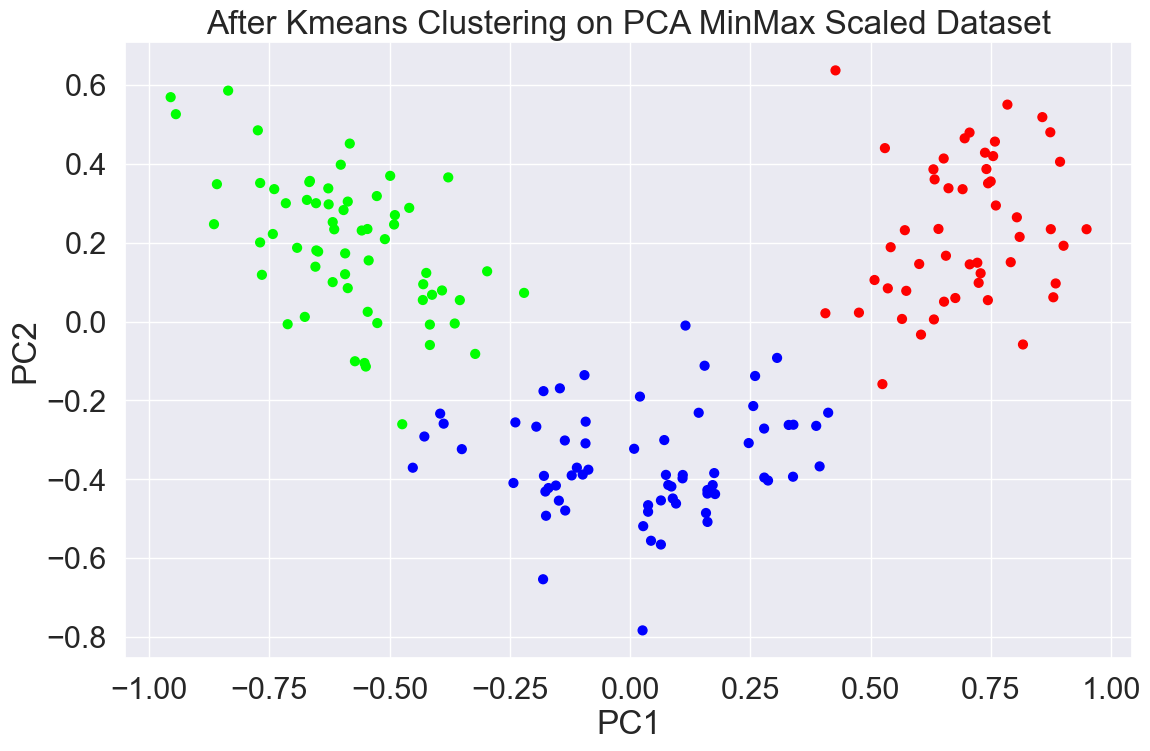

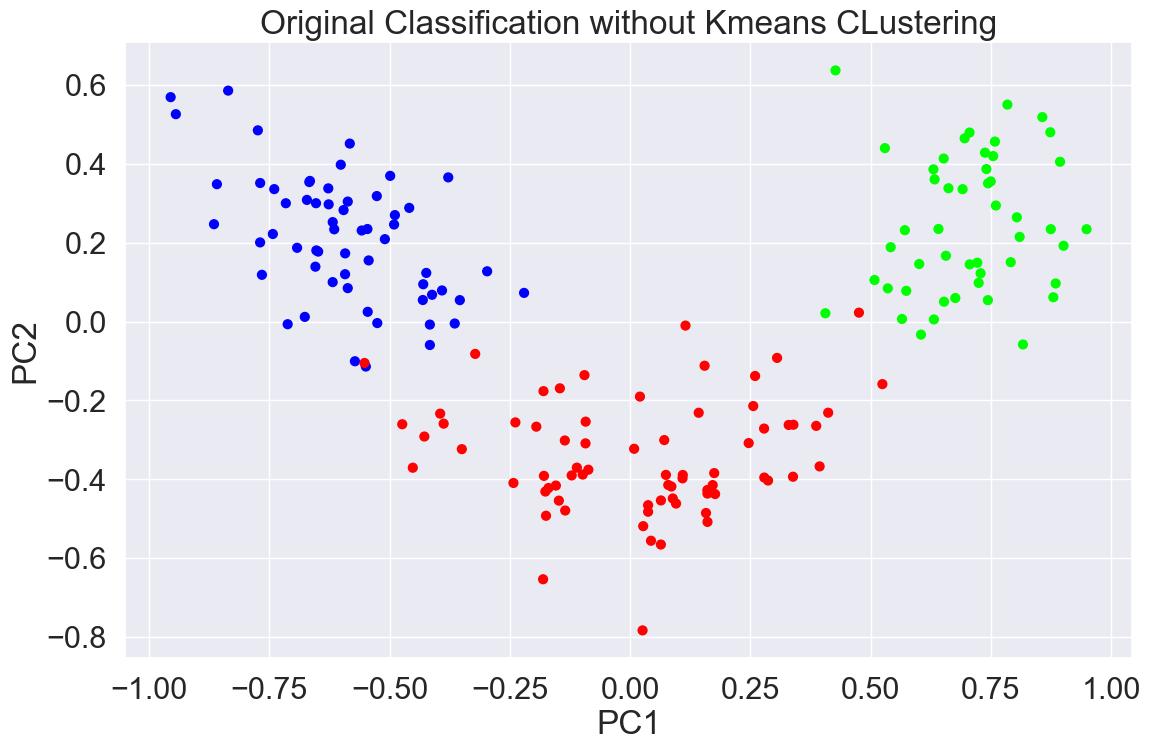

In [70]:
# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Kmeans CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [71]:
# Group data by Clusters (K=3)
display('After Applying PCA and Kmens CLustering on Dataset',df.groupby('Kmeans_label').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying PCA and Kmens CLustering on Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             12.233333  1.905000  2.251212  20.218182   93.469697  2.247273   
1             13.144000  3.346200  2.425600  21.330000   98.640000  1.677200   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0              2.069091      0.363485        1.602727  3.025758  1.058576   
1              0.807000      0.450400        1.156400  7.264400  0.686200   
2              2.972581      0.288710        1.928710  5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             2.792727   508.696970   95.530303  
1             1.698800   622.440000  152.380000  
2             3.155161  1100.822581   32.370968

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline     ID  
             mean   mean  
Type                      
1     1115.711864   30.0  
2      519.507042   95.0  
3      629.895833  154.5

### Observation: 
+ The Type 2 has been perfectly clustered and rest has negliglable amount of difference
+ We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

## Hierarchical Clustering Algorithm

 Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

#### Types Of Hierarchical Clustering:
##### There are two types of hierarchical clustering:

+ <b>Agglomerative</b>: The data points are clustered using a bottom-up approach starting with individual data points.
+ <b>Divisive</b>: The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

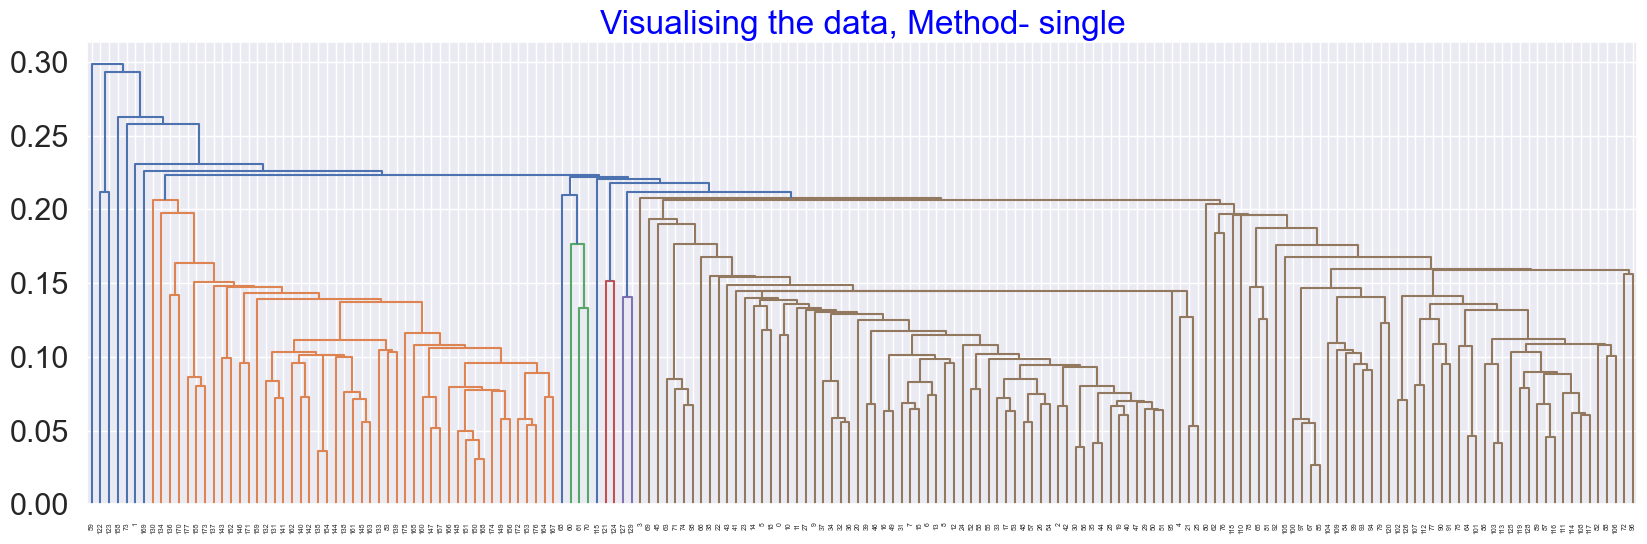

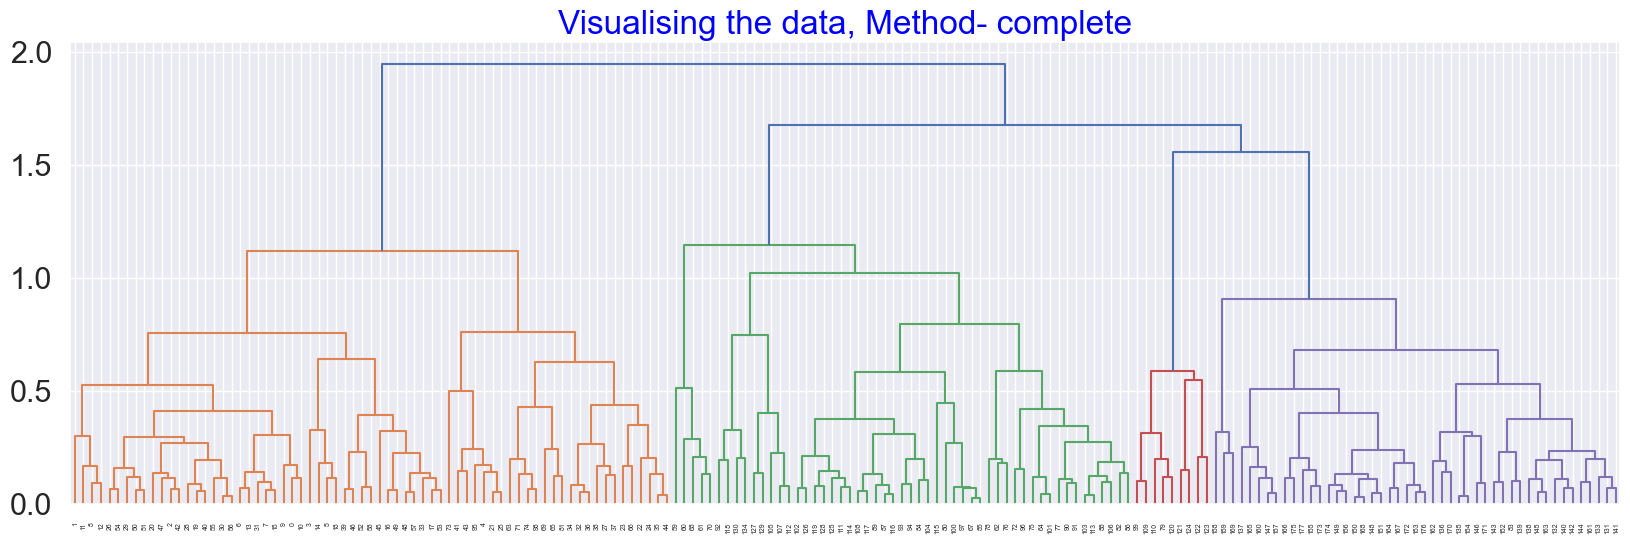

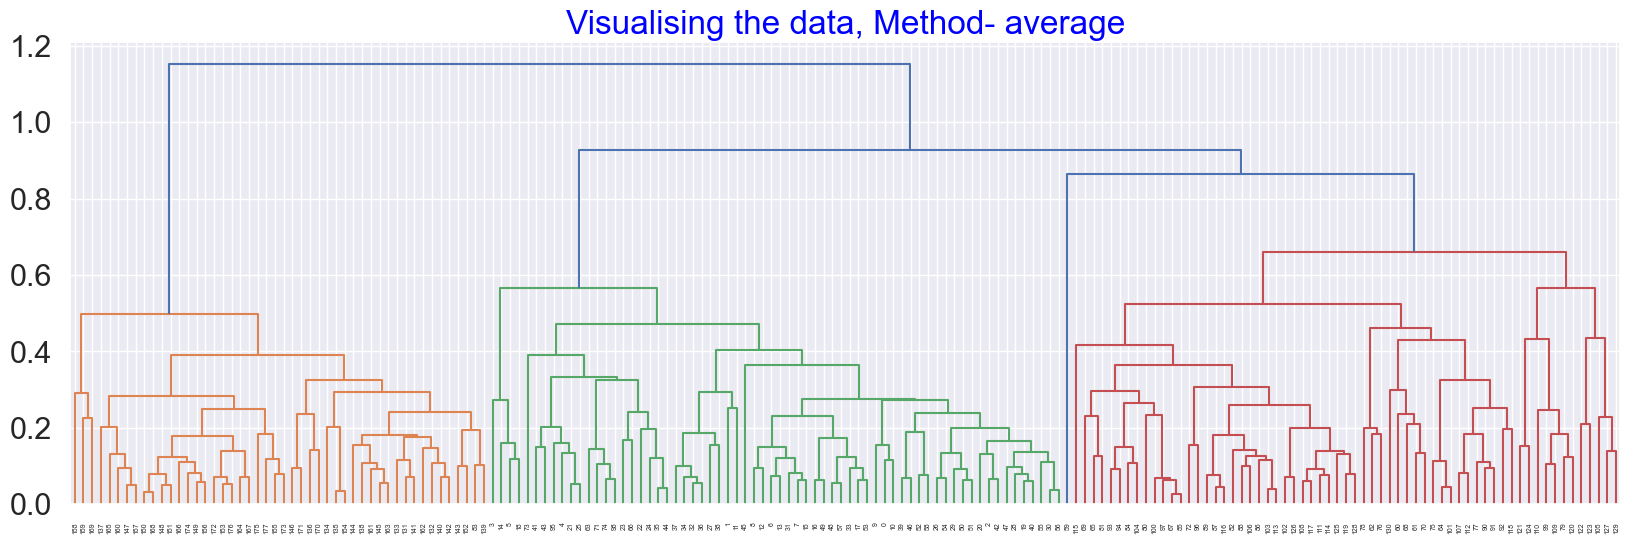

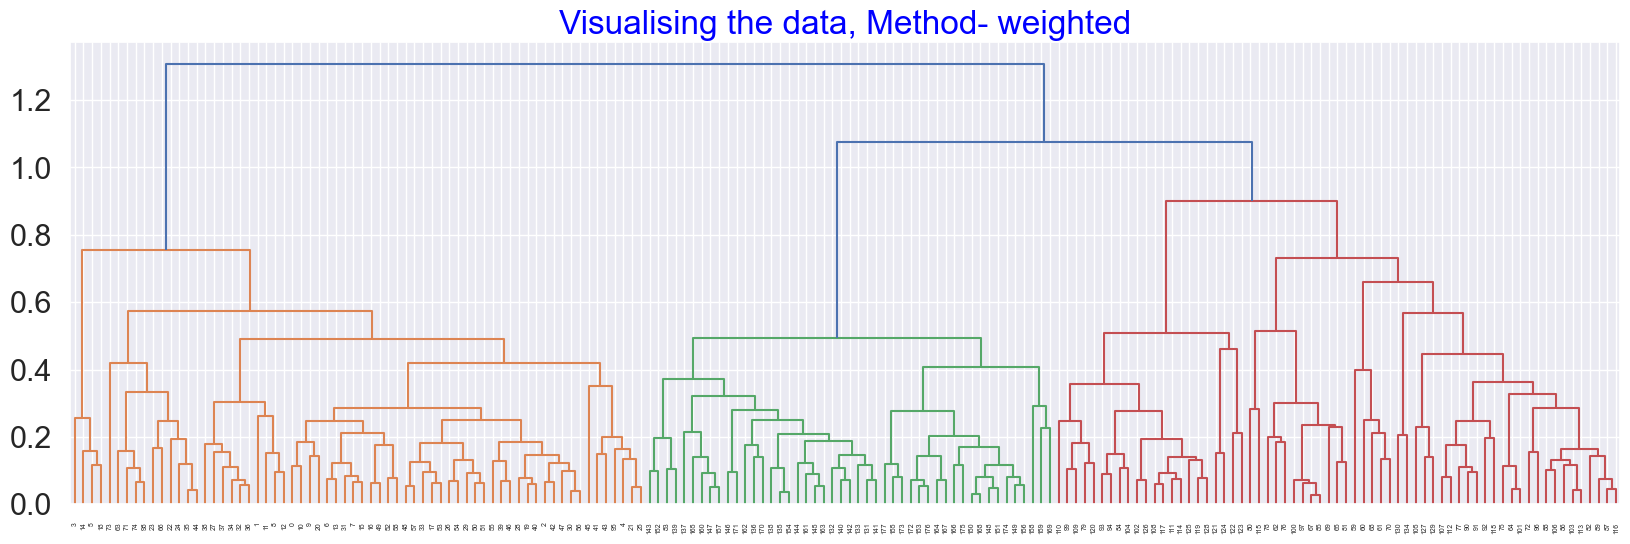

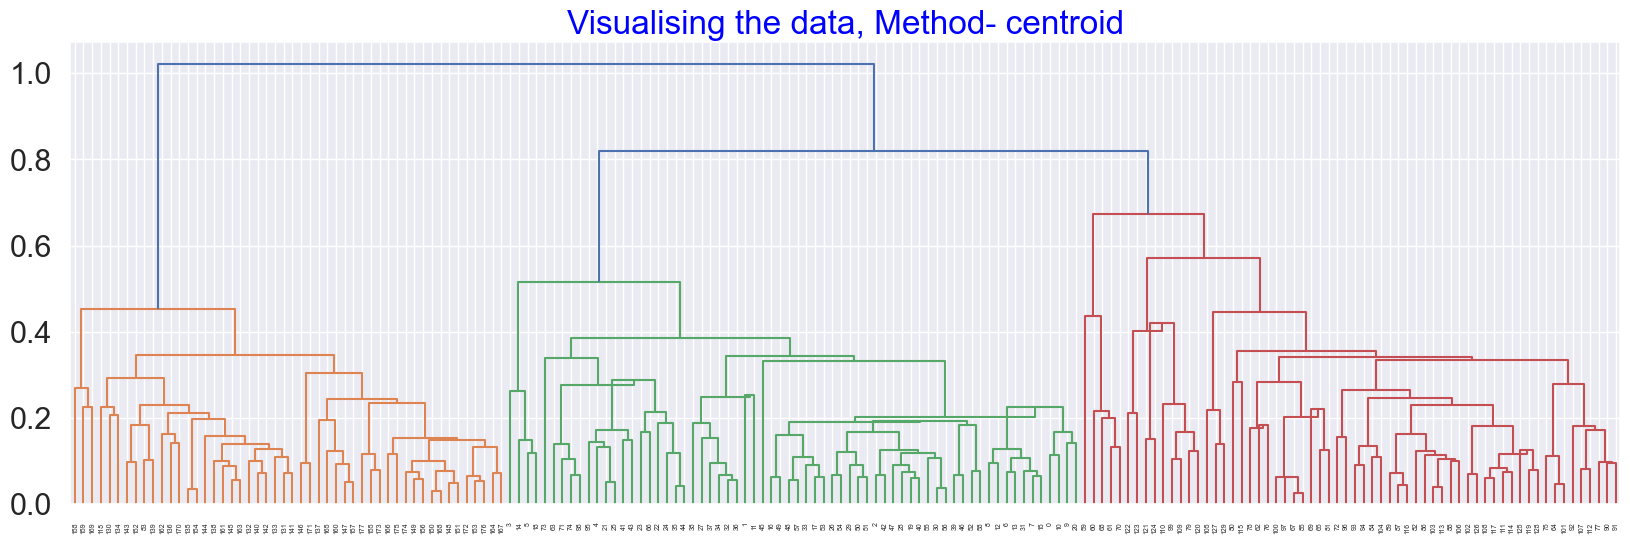

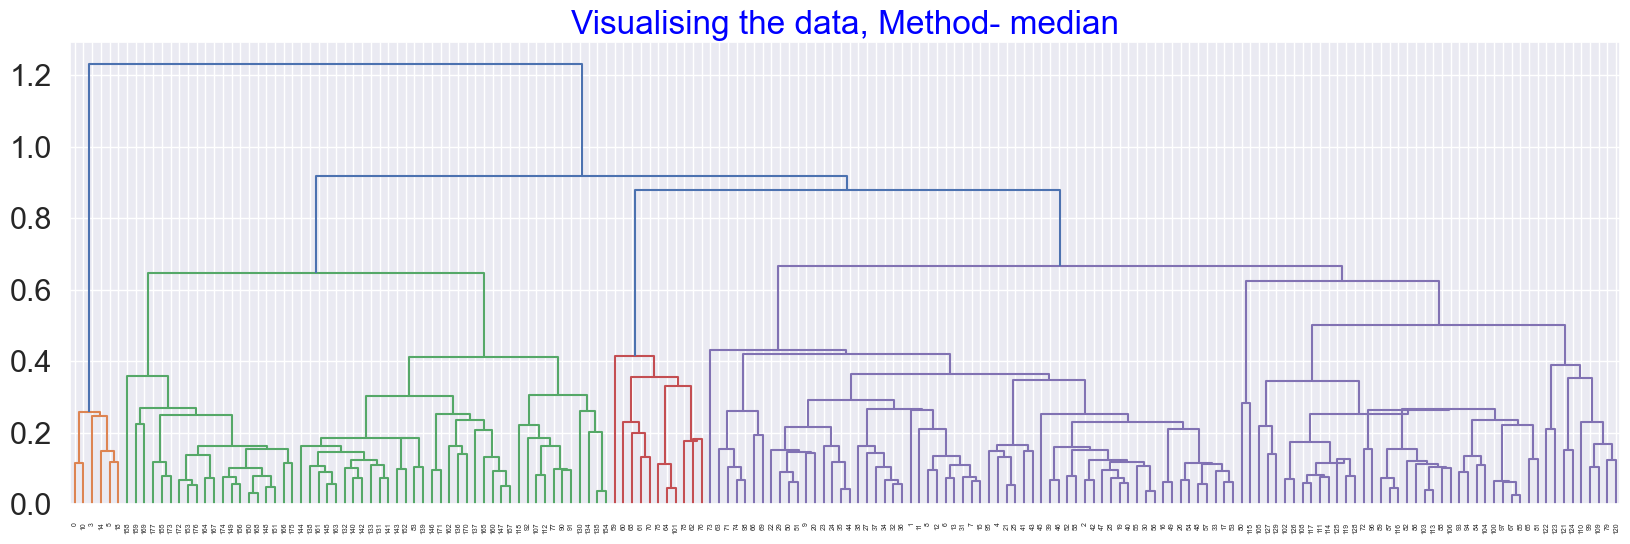

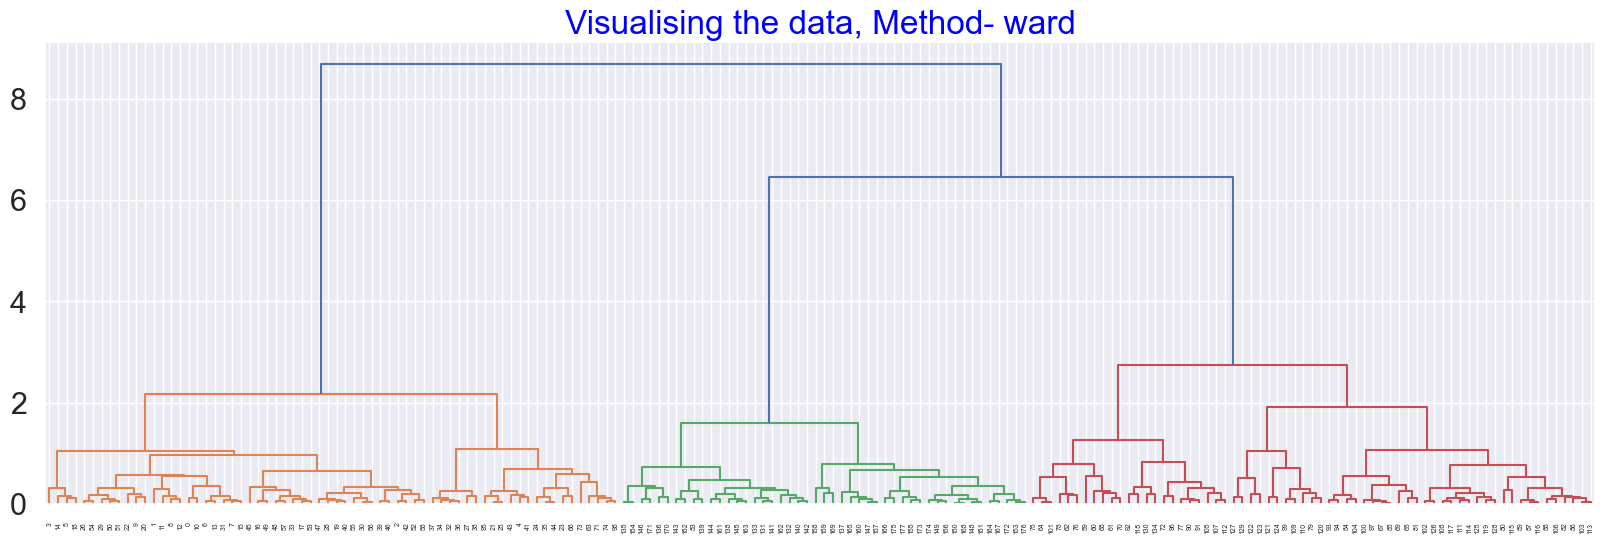

In [72]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_minmax_df, method = methods,optimal_ordering=False))

###  Silhouette Score method for PCA MinMax Scaled Data

####  Applying Different Linkages using Euclidean Method for distance Calculation

In [73]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
        silhouette_score1 = sil(pca_minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.44369351506555055
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4448273929121036
For n_clusters = 2 The average silhouette_score with linkage- average : 0.45988022636848064
For n_clusters = 2 The average silhouette_score with linkage- single : 0.19347387677877795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5124784618933621
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.45525090342803287
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5163908228025498
For n_clusters = 3 The average silhouette_score with linkage- single : -0.004466488818667579

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.45626641761886955
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46813138010224736
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4840694941767

#### The seperation in each Linkages and Distance Methods indicate that 3 is the optimal number for clusters.
+ For n_clusters = 3 The average silhouette_score with linkage- average and Affinity- l2 : 0.5163908228025497
+ For n_clusters = 3 The average silhouette_score with linkage- ward : and Affinity - Euclidean : 0.512478461893362

<b>Ward</b> method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

### Dendrogram on Standard Scaler Applied on Data

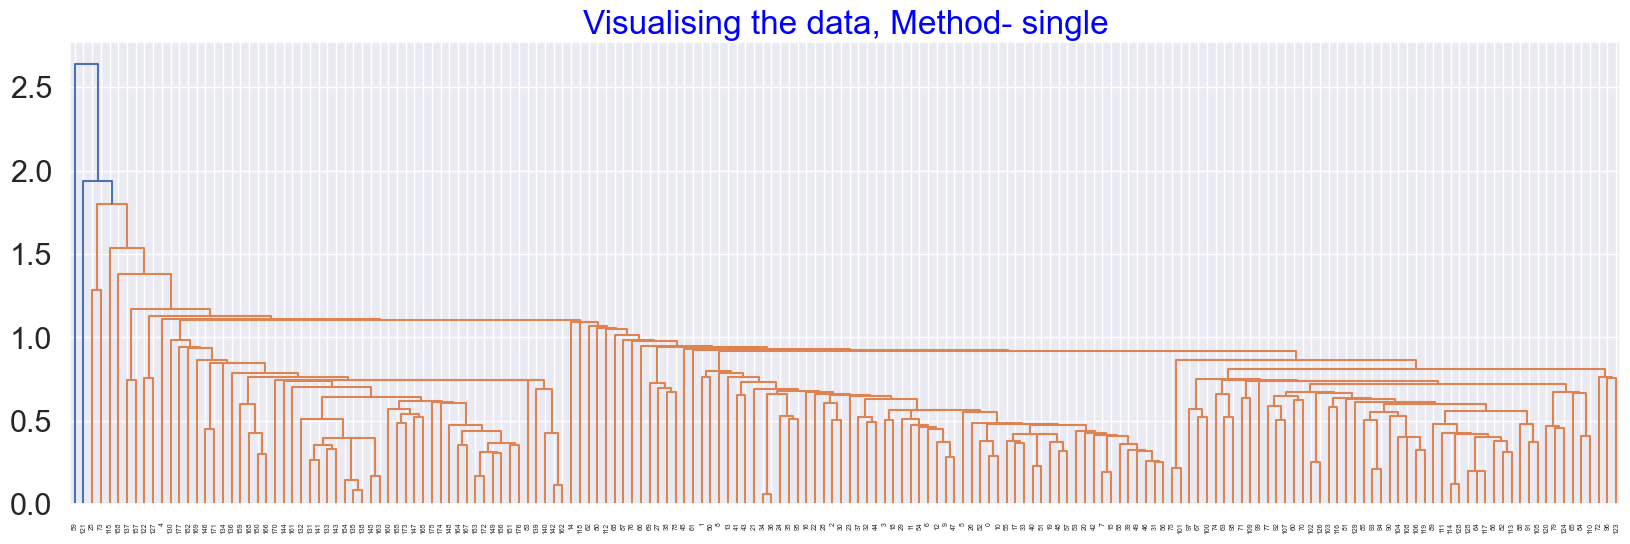

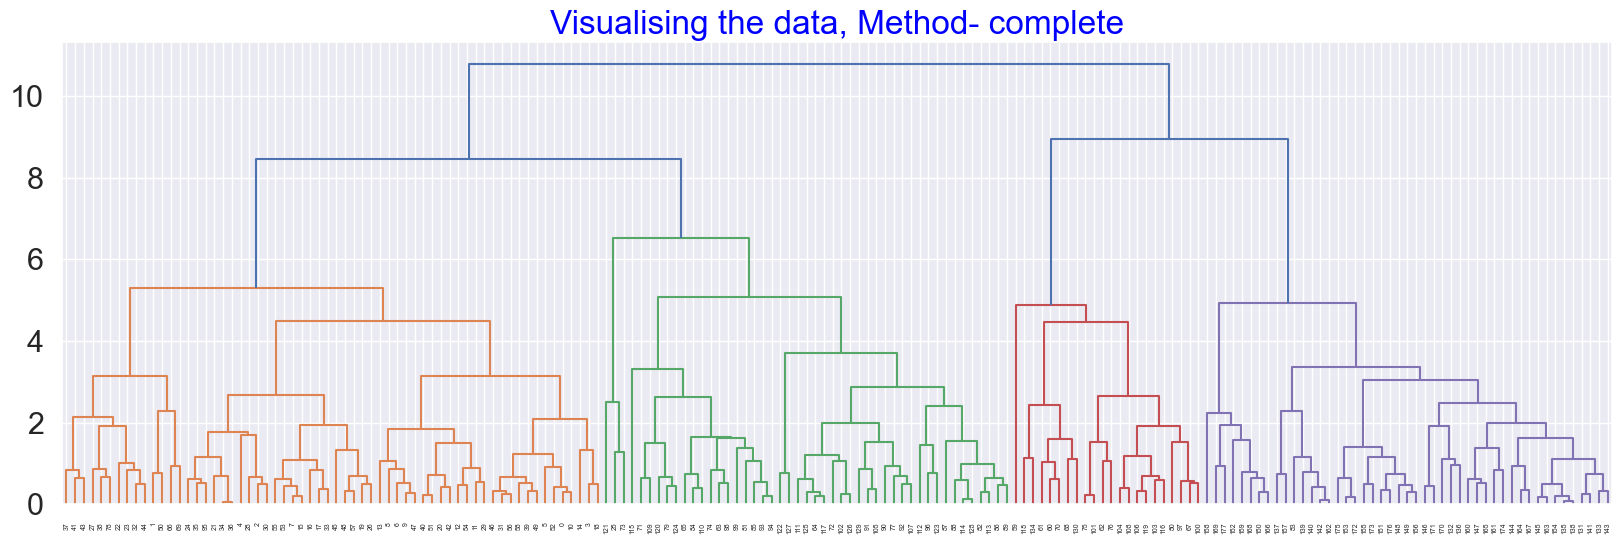

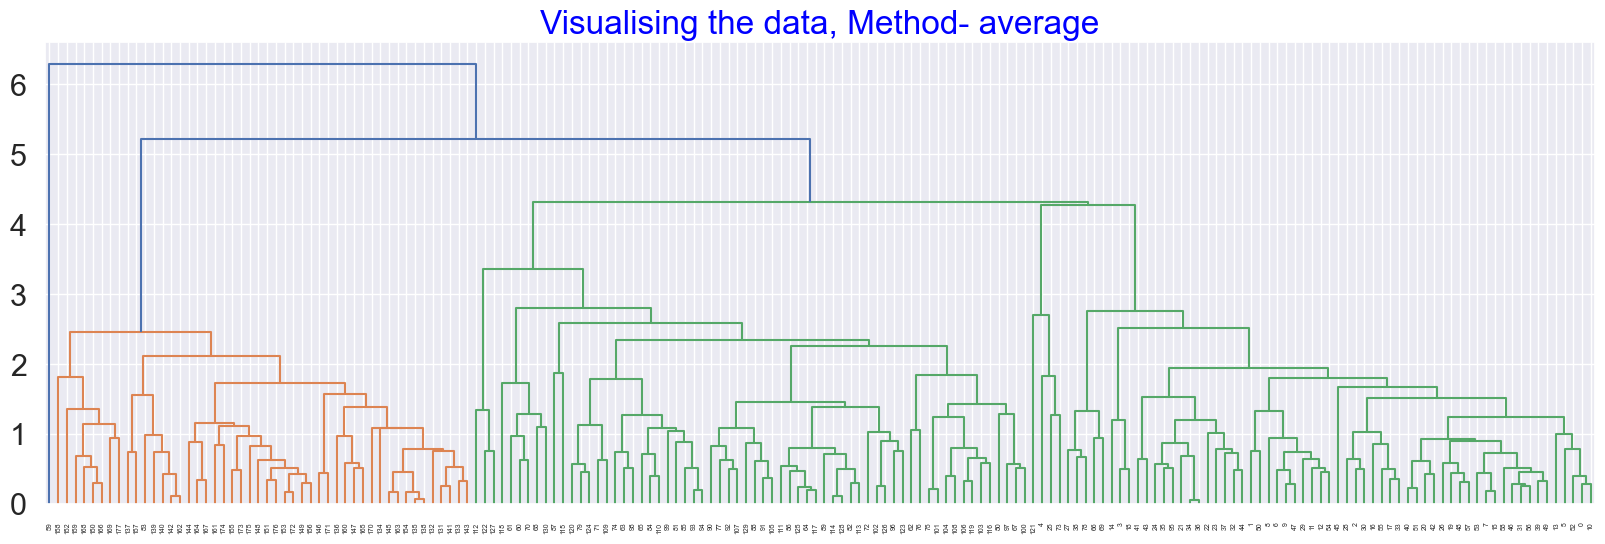

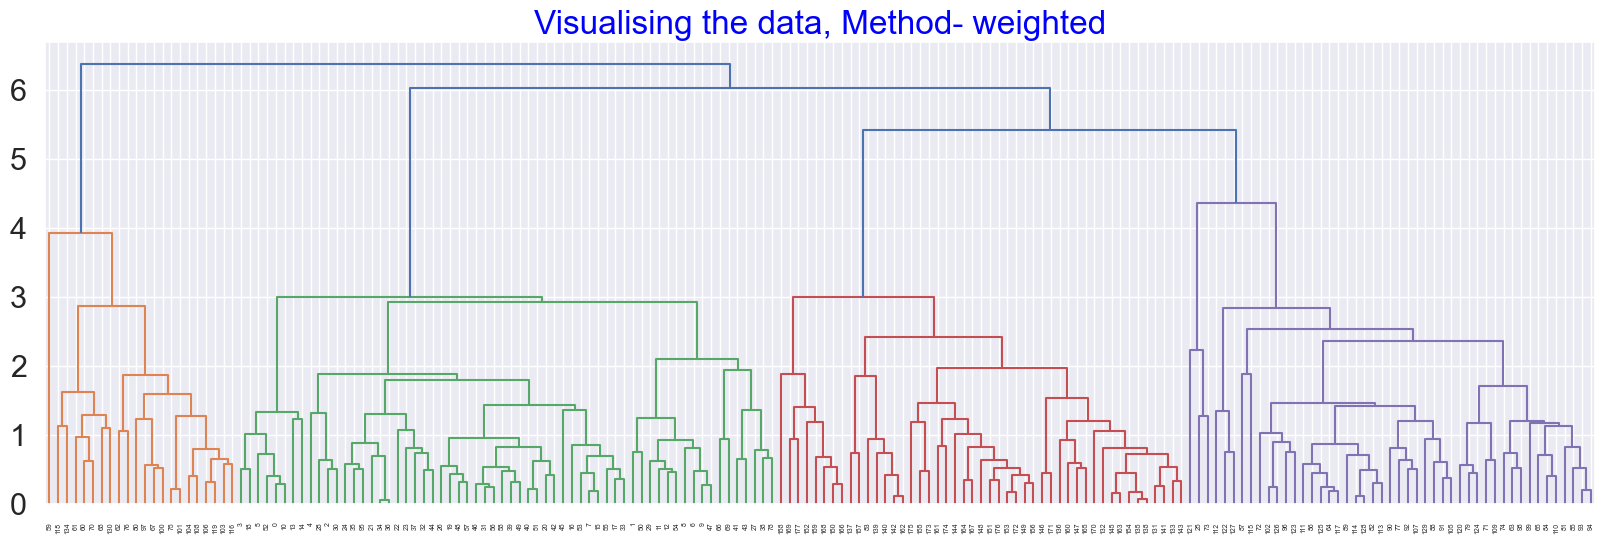

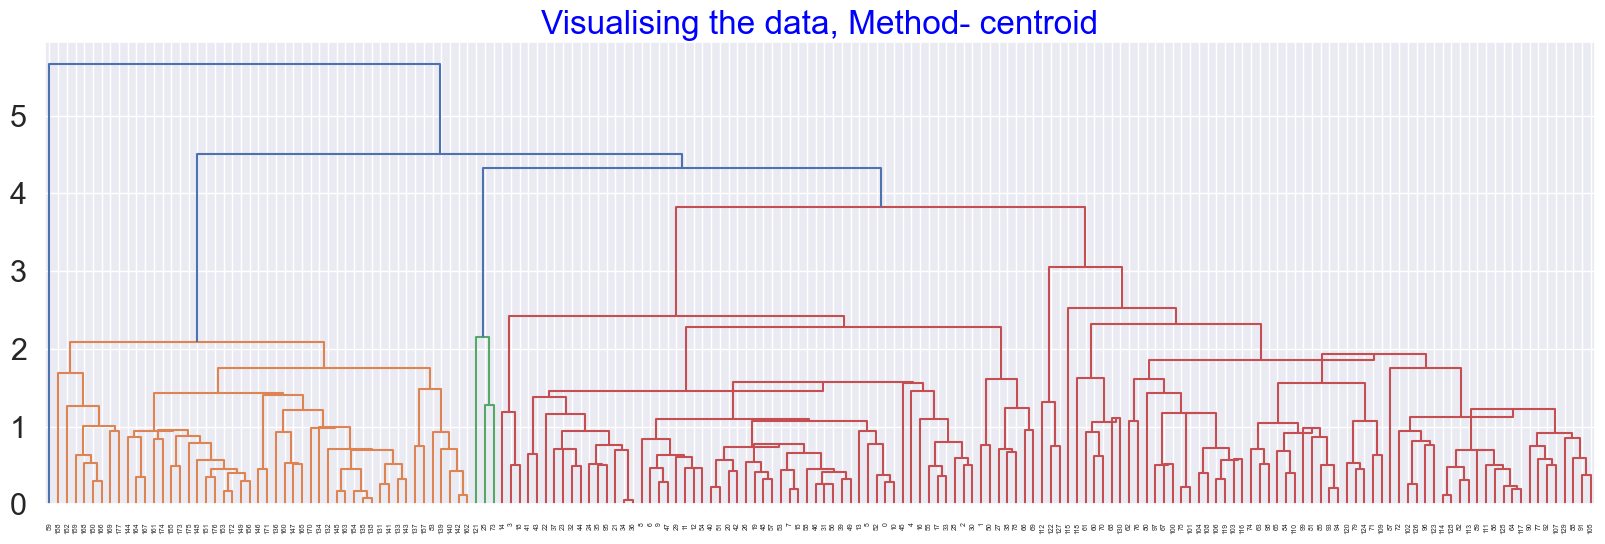

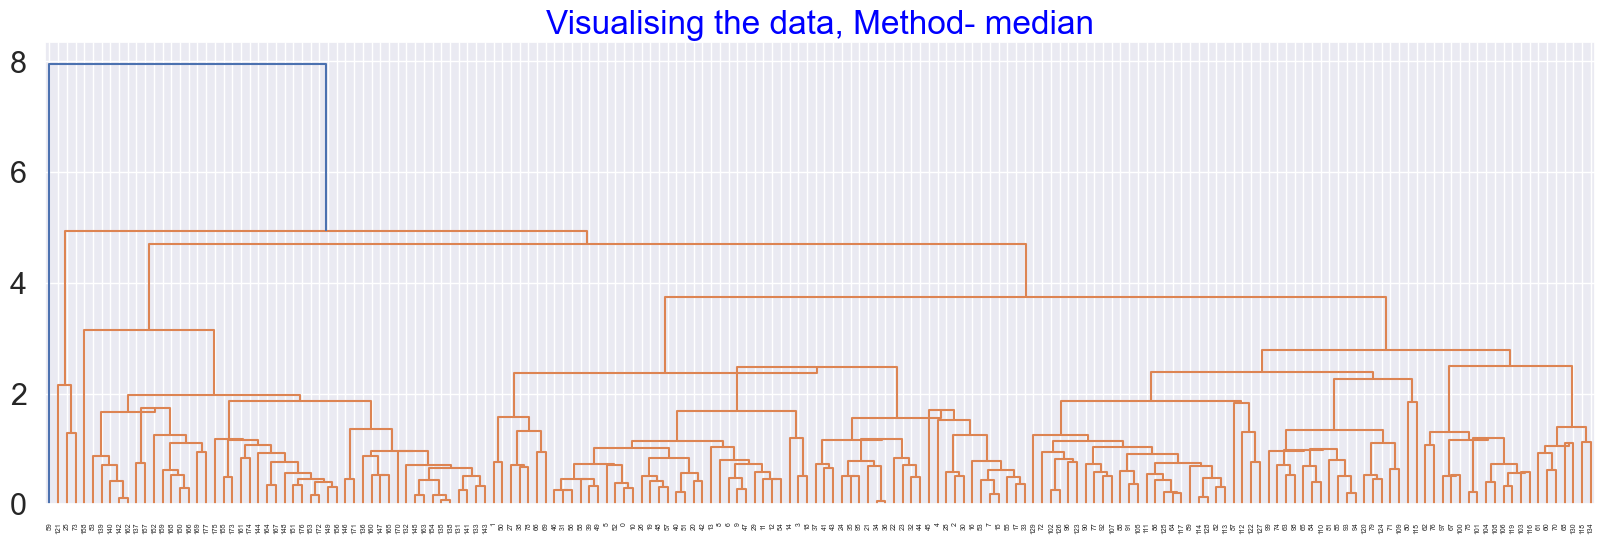

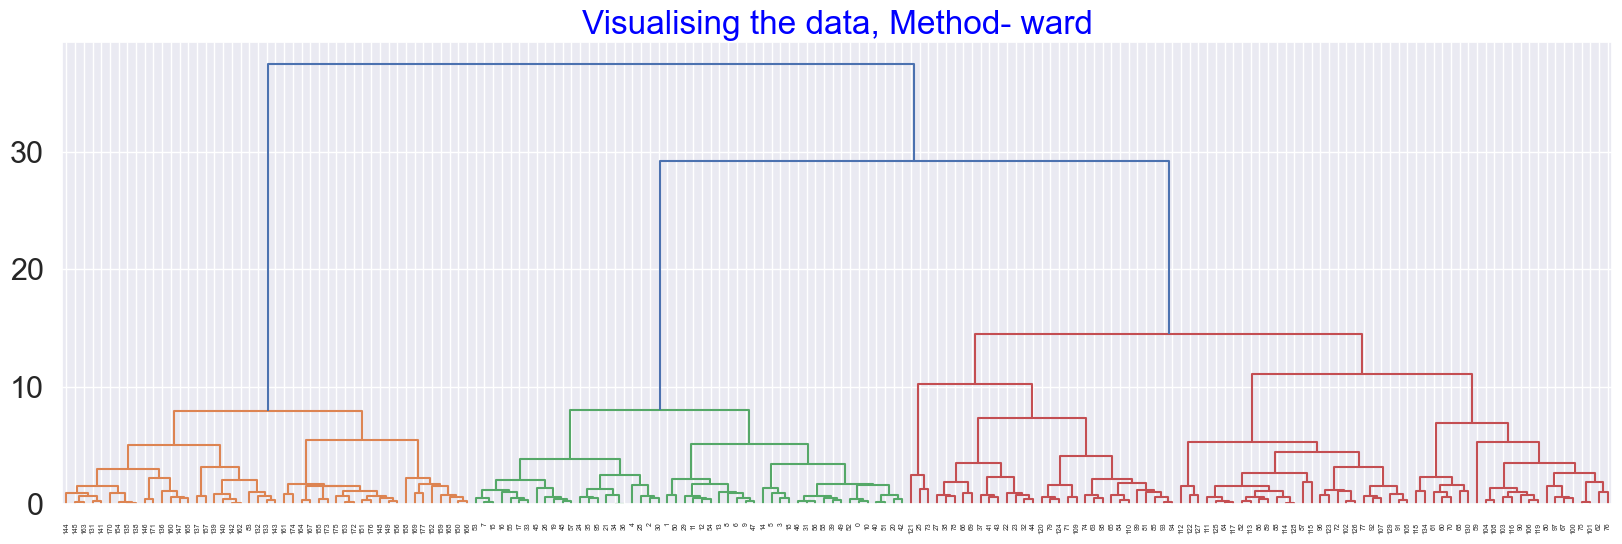

In [74]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [75]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4187797009092465
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.34372787707571895
For n_clusters = 2 The average silhouette_score with linkage- average : 0.34854041549326403
For n_clusters = 2 The average silhouette_score with linkage- single : 0.34854041549326403

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4355352661667812
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.29482654329265306
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4025547835526691
For n_clusters = 3 The average silhouette_score with linkage- single : 0.2578938247338436

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.37397039586911773
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4171188330984905
For n_clusters = 4 The average silhouette_score with linkage- average : 0.46890675907642115

Conclusion: Max score is with cluster numbers 4 in standard scaler transformation transformation.

For n_clusters = 4 The average silhouette_score with linkage- complete and Affinity- l1 : 0.4731230759943259

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.435535266166781

Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

###  Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data <a class="anchor" id="8.5"></a>